In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Visakhapatnam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
3469,3472,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,Black,8.32,0.39,0.71,...,1.33,3.44,1.42,12.44,0.092294,0.064874,0.389956,0.19924,-0.090595,Sugarcane
3470,3473,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,Black,8.27,0.52,0.66,...,1.72,34.78,3.60,3.90,0.092294,0.064874,0.389956,0.19924,-0.090595,Sugarcane
3471,3474,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,8.26,0.14,0.42,...,1.00,4.50,0.49,10.60,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane
3472,3475,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,8.09,0.16,0.27,...,0.83,9.86,1.05,16.68,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane
3473,3476,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,7.90,0.12,0.19,...,0.49,10.44,0.81,14.28,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'NDVI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,6.809927,0.165418,0.642691,10.683745,153.418182,1239.952727,319.054545,10.000509,0.923091,0.924800,38.874036,1.968691,45.837018,0.343914
std,1.037585,0.221806,0.380173,12.766050,149.612454,710.870368,207.867186,19.193245,0.772242,0.698839,45.426617,1.161285,37.485161,0.380630
min,4.850000,0.020000,0.040000,1.620000,36.000000,250.000000,59.000000,0.630000,0.120000,0.160000,2.760000,0.420000,3.900000,0.131670
25%,5.920000,0.060000,0.365000,3.815000,88.000000,630.500000,149.000000,2.975000,0.480000,0.510000,15.260000,1.100000,18.230000,0.177867
50%,6.610000,0.110000,0.610000,6.450000,119.000000,1068.000000,277.000000,4.970000,0.720000,0.730000,25.820000,1.840000,31.380000,0.192558
75%,7.745000,0.180000,0.800000,11.660000,169.500000,1690.500000,441.000000,9.010000,1.030000,1.140000,41.520000,2.410000,65.640000,0.235354
max,9.420000,2.520000,2.640000,101.770000,2037.000000,3617.000000,1156.000000,184.300000,5.580000,7.430000,354.700000,8.340000,256.880000,2.427779


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black ', 'RED', '   Black', 'Red Sandy', 'Red', ' Red', 'Black  ',
       'Black', 'red sandy', 'red sandy\\', 'black sandy', 'blacksandy',
       'black sandy ', 'black', 'Red ', 'Black Sandy'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black', '   Black', 'Black  ', 'Black', 'black', 'Black '], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['RED', 'Red', ' Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Red Sandy', 'red sandy', 'red sandy\\'], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['black sandy', 'blacksandy', 'black sandy', 'Black Sandy', 'black sandy '], 'Black Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Red Sandy Soil', 'Black Sandy Soil'],
      dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 123,
 'Red Soil': 69,
 'Red Sandy Soil': 54,
 'Black Sandy Soil': 29}

<BarContainer object of 4 artists>

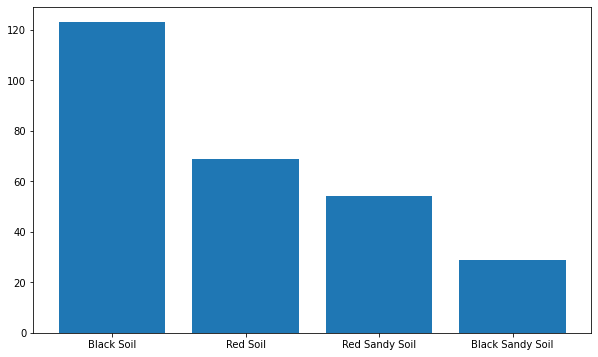

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Sugarcane ', 'Paddy/ Sugarcane', 'Paddy', 'Sugarcane',
       'suger cane ', 'paddy', 'SUGER CANE ', 'Ragi/Niger',
       'Maize/Paddy/Rajma', 'Maize/Rajma', 'Rajma/Maize',
       'Paddy/Maize/G.N', 'Maize', 'Groundnut', 'Turmeric', 'Ragi',
       'Paddy/Maize'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/ Sugarcane     81
Paddy/Maize/G.N      33
Sugarcane            24
Maize/Paddy/Rajma    20
Paddy                20
suger cane           18
Paddy/Maize          16
Ragi/Niger           15
Rajma/Maize          14
Maize/Rajma          10
SUGER CANE            8
paddy                 7
Sugarcane             5
Groundnut             1
Maize                 1
Turmeric              1
Ragi                  1
Name: Crop, dtype: int64

Paddy + SugarCane    163
Paddy + Maize         70
Maize + Rajma         24
Ragi                  16
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

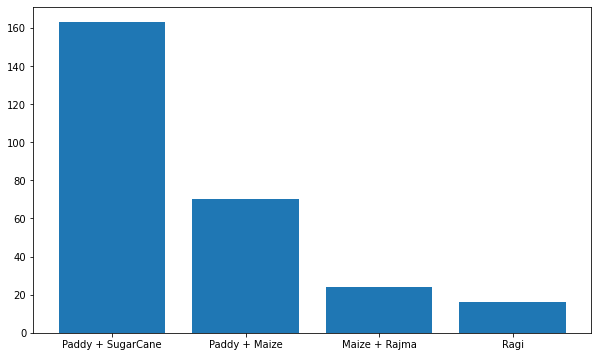

In [15]:
df['Crop'] = df['Crop'].replace(['Sugarcane ', 'Sugarcane', 'suger cane ', 'SUGER CANE '], 'SugarCane')
df['Crop'] = df['Crop'].replace(['Paddy/ Sugarcane'], 'Paddy + SugarCane')
df['Crop'] = df['Crop'].replace(['Paddy', 'paddy'], 'Paddy')
df['Crop'] = df['Crop'].replace(['Maize/Rajma', 'Rajma/Maize'], 'Maize + Rajma')
df['Crop'] = df['Crop'].replace(['Maize/Paddy/Rajma', 'Paddy/Maize/G.N', 'Maize', 'Paddy/Maize'], 'Paddy + Maize')
df['Crop'] = df['Crop'].replace(['Paddy + SugarCane', 'Paddy', 'SugarCane'], 'Paddy + SugarCane')
df['Crop'] = df['Crop'].replace('Ragi/Niger', 'Ragi')
df = df[(df['Crop'] != 'Groundnut') & (df['Crop'] != 'Turmeric')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
pH,1.000000,0.480688,-0.333383,0.212552,0.120609,0.635819,0.665875,0.375249,-0.112625,0.564074,-0.461003,-0.302912,-0.632308,-0.191358
EC,0.480688,1.000000,-0.113811,0.189278,0.579347,0.304698,0.353923,0.905148,0.032202,0.542661,-0.160148,-0.055957,-0.275806,-0.122364
OC,-0.333383,-0.113811,1.000000,-0.003450,0.216241,0.027773,-0.158163,-0.107069,0.541595,-0.030128,0.351817,0.446556,0.573010,0.111672
P,0.212552,0.189278,-0.003450,1.000000,0.172696,0.205397,0.283987,0.143692,0.492402,0.210786,0.100140,0.104467,-0.227438,0.257522
K,0.120609,0.579347,0.216241,0.172696,1.000000,0.062876,0.058264,0.468951,0.245236,0.173017,-0.063486,0.017689,0.071308,-0.057920
Ca,0.635819,0.304698,0.027773,0.205397,0.062876,1.000000,0.806148,0.252167,0.005950,0.509460,-0.149374,0.107125,-0.313804,0.005555
Mg,0.665875,0.353923,-0.158163,0.283987,0.058264,0.806148,1.000000,0.270701,-0.056657,0.590767,-0.130534,0.116103,-0.424087,0.016729
S,0.375249,0.905148,-0.107069,0.143692,0.468951,0.252167,0.270701,1.000000,-0.007399,0.531710,-0.096959,0.005405,-0.218240,-0.076268
Zn,-0.112625,0.032202,0.541595,0.492402,0.245236,0.005950,-0.056657,-0.007399,1.000000,-0.009086,0.416219,0.408112,0.287436,0.251410
B,0.564074,0.542661,-0.030128,0.210786,0.173017,0.509460,0.590767,0.531710,-0.009086,1.000000,-0.149671,0.054915,-0.319448,-0.168517


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu', 'Mn']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'GCI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Fe      GCI  Black Sandy Soil  Black Soil  \
3469  8.32  0.39  0.71  8.15  3.44  0.19924                 0           1   

      Red Sandy Soil  Red Soil  
3469               0         0  
3469    Paddy + SugarCane
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:6] = sc1.fit_transform(X[:, 0:6])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8840579710144928


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.29 %
Standard Deviation: 7.33 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8260869565217391


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.50 %
Standard Deviation: 6.17 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.9130434782608695


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.81 %
Standard Deviation: 5.82 %


In [36]:
pickle.dump(clf3, open('Visakhapatnam_model.pkl', 'wb'))
pickle.dump(sc1, open('Visakhapatnam_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8840579710144928


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 83.93 %
Standard Deviation: 7.39 %


In [42]:
# pickle.dump(clf4, open('Visakhapatnam_model.pkl', 'wb'))
# pickle.dump(sc1, open('Visakhapatnam_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [43]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [44]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [45]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8921568627450981
Testing Accuracy:  0.8985507246376812


In [46]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.40 %
Standard Deviation: 8.87 %


# Catboost

In [47]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.8371259	total: 149ms	remaining: 14.7s
1:	learn: 0.5320673	total: 149ms	remaining: 7.31s
2:	learn: 0.4963049	total: 150ms	remaining: 4.84s
3:	learn: 0.4646238	total: 150ms	remaining: 3.6s
4:	learn: 0.4041340	total: 151ms	remaining: 2.86s
5:	learn: 0.3750855	total: 151ms	remaining: 2.37s
6:	learn: 0.3617175	total: 152ms	remaining: 2.01s
7:	learn: 0.3446310	total: 152ms	remaining: 1.75s
8:	learn: 0.3215189	total: 153ms	remaining: 1.54s
9:	learn: 0.2904631	total: 153ms	remaining: 1.38s
10:	learn: 0.2585681	total: 154ms	remaining: 1.24s
11:	learn: 0.2487959	total: 154ms	remaining: 1.13s
12:	learn: 0.2400744	total: 155ms	remaining: 1.03s
13:	learn: 0.2369903	total: 155ms	remaining: 953ms
14:	learn: 0.2254538	total: 156ms	remaining: 882ms
15:	learn: 0.2175072	total: 156ms	remaining: 820ms
16:	learn: 0.2125967	total: 157ms	remaining: 765ms
17:	learn: 0.2064335	total: 157ms	remaining: 716ms
18:	learn: 0.1945450	total: 158ms	remaining: 672ms
19:	learn: 0.1916652	total: 158ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.6166103075
bestIteration = 99

Training on fold [1/5]

bestTest = 0.636887876
bestIteration = 99

Training on fold [2/5]

bestTest = 0.6013645127
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5301130789
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5563047058
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3555613	test: 1.3595440	best: 1.3595440 (0)	total: 1.03ms	remaining: 1.03s
1:	learn: 1.3137195	test: 1.3233611	best: 1.3233611 (1)	total: 1.97ms	remaining: 983ms
2:	learn: 1.2792425	test: 1.2964396	best: 1.2964396 (2)	total: 2.78ms	remaining: 924ms
3:	learn: 1.2516177	test: 1.2767908	best: 1.2767908 (3)	total: 3.61ms	remaining: 899ms
4:	learn: 1.2253567	test: 1.2572478	best: 1.2572478 (4)	total: 4.5ms	remaining: 896ms
5:	learn: 1.1982239	test: 1.2407691	best: 1.2407691 (5)	total: 5.41ms	remaining: 896ms
6:	learn: 1.1691403	test: 1.2162031	best: 1.2162031 (6)	total: 6.5ms	remaining: 922ms
7:	learn: 1.1435805	test: 1.1968647	best: 1.1968647 (7)	total: 7.71ms	remaining: 956ms
8:	learn: 1.1192704	test: 1.1749937	best: 1.1749937 (8)	total: 8.6ms	remaining: 947ms
9:	learn: 1.0971283	test: 1.1578007	best: 1.1578007 (9)	total: 9.45ms	remaining: 936ms
10:	learn: 1.0760256	test: 1.1417556	best: 1.1417556 (10)	total: 10.3ms	remaining: 928ms
11:	learn: 1.0539633	test: 1.1256324	best: 1

162:	learn: 0.2744093	test: 0.6781634	best: 0.6781634 (162)	total: 161ms	remaining: 827ms
163:	learn: 0.2735467	test: 0.6771364	best: 0.6771364 (163)	total: 162ms	remaining: 828ms
164:	learn: 0.2721906	test: 0.6753333	best: 0.6753333 (164)	total: 163ms	remaining: 827ms
165:	learn: 0.2711758	test: 0.6744401	best: 0.6744401 (165)	total: 165ms	remaining: 827ms
166:	learn: 0.2693897	test: 0.6743310	best: 0.6743310 (166)	total: 166ms	remaining: 826ms
167:	learn: 0.2688038	test: 0.6741801	best: 0.6741801 (167)	total: 167ms	remaining: 825ms
168:	learn: 0.2674670	test: 0.6742848	best: 0.6741801 (167)	total: 168ms	remaining: 824ms
169:	learn: 0.2660263	test: 0.6732897	best: 0.6732897 (169)	total: 169ms	remaining: 823ms
170:	learn: 0.2651866	test: 0.6728268	best: 0.6728268 (170)	total: 170ms	remaining: 822ms
171:	learn: 0.2641212	test: 0.6720508	best: 0.6720508 (171)	total: 171ms	remaining: 821ms
172:	learn: 0.2626837	test: 0.6721458	best: 0.6720508 (171)	total: 172ms	remaining: 820ms
173:	learn

328:	learn: 0.1477372	test: 0.6435871	best: 0.6427550 (327)	total: 325ms	remaining: 663ms
329:	learn: 0.1473272	test: 0.6441874	best: 0.6427550 (327)	total: 326ms	remaining: 662ms
330:	learn: 0.1466875	test: 0.6440555	best: 0.6427550 (327)	total: 327ms	remaining: 661ms
331:	learn: 0.1462678	test: 0.6436712	best: 0.6427550 (327)	total: 328ms	remaining: 660ms
332:	learn: 0.1459812	test: 0.6431024	best: 0.6427550 (327)	total: 329ms	remaining: 659ms
333:	learn: 0.1456283	test: 0.6425469	best: 0.6425469 (333)	total: 330ms	remaining: 658ms
334:	learn: 0.1452091	test: 0.6421088	best: 0.6421088 (334)	total: 331ms	remaining: 658ms
335:	learn: 0.1448020	test: 0.6415481	best: 0.6415481 (335)	total: 332ms	remaining: 656ms
336:	learn: 0.1444206	test: 0.6422002	best: 0.6415481 (335)	total: 333ms	remaining: 655ms
337:	learn: 0.1439399	test: 0.6418996	best: 0.6415481 (335)	total: 334ms	remaining: 654ms
338:	learn: 0.1431473	test: 0.6414096	best: 0.6414096 (338)	total: 335ms	remaining: 653ms
339:	learn

500:	learn: 0.0931206	test: 0.6395038	best: 0.6352541 (426)	total: 496ms	remaining: 494ms
501:	learn: 0.0929206	test: 0.6398406	best: 0.6352541 (426)	total: 497ms	remaining: 493ms
502:	learn: 0.0927193	test: 0.6403580	best: 0.6352541 (426)	total: 498ms	remaining: 492ms
503:	learn: 0.0925121	test: 0.6405245	best: 0.6352541 (426)	total: 499ms	remaining: 492ms
504:	learn: 0.0921920	test: 0.6404603	best: 0.6352541 (426)	total: 501ms	remaining: 491ms
505:	learn: 0.0920552	test: 0.6403757	best: 0.6352541 (426)	total: 502ms	remaining: 490ms
506:	learn: 0.0919293	test: 0.6403322	best: 0.6352541 (426)	total: 503ms	remaining: 489ms
507:	learn: 0.0916448	test: 0.6401356	best: 0.6352541 (426)	total: 504ms	remaining: 488ms
508:	learn: 0.0914270	test: 0.6404016	best: 0.6352541 (426)	total: 505ms	remaining: 487ms
509:	learn: 0.0912895	test: 0.6406140	best: 0.6352541 (426)	total: 506ms	remaining: 486ms
510:	learn: 0.0909738	test: 0.6401800	best: 0.6352541 (426)	total: 507ms	remaining: 485ms
511:	learn

661:	learn: 0.0666129	test: 0.6545366	best: 0.6352541 (426)	total: 666ms	remaining: 340ms
662:	learn: 0.0664470	test: 0.6544605	best: 0.6352541 (426)	total: 667ms	remaining: 339ms
663:	learn: 0.0663360	test: 0.6545566	best: 0.6352541 (426)	total: 668ms	remaining: 338ms
664:	learn: 0.0661981	test: 0.6547129	best: 0.6352541 (426)	total: 669ms	remaining: 337ms
665:	learn: 0.0660989	test: 0.6546855	best: 0.6352541 (426)	total: 670ms	remaining: 336ms
666:	learn: 0.0659516	test: 0.6548552	best: 0.6352541 (426)	total: 671ms	remaining: 335ms
667:	learn: 0.0659145	test: 0.6549310	best: 0.6352541 (426)	total: 672ms	remaining: 334ms
668:	learn: 0.0657852	test: 0.6545645	best: 0.6352541 (426)	total: 673ms	remaining: 333ms
669:	learn: 0.0656857	test: 0.6549536	best: 0.6352541 (426)	total: 674ms	remaining: 332ms
670:	learn: 0.0655153	test: 0.6550823	best: 0.6352541 (426)	total: 675ms	remaining: 331ms
671:	learn: 0.0654000	test: 0.6553214	best: 0.6352541 (426)	total: 676ms	remaining: 330ms
672:	learn

824:	learn: 0.0513202	test: 0.6663111	best: 0.6352541 (426)	total: 835ms	remaining: 177ms
825:	learn: 0.0512046	test: 0.6664730	best: 0.6352541 (426)	total: 836ms	remaining: 176ms
826:	learn: 0.0511456	test: 0.6668327	best: 0.6352541 (426)	total: 837ms	remaining: 175ms
827:	learn: 0.0510923	test: 0.6667625	best: 0.6352541 (426)	total: 839ms	remaining: 174ms
828:	learn: 0.0510510	test: 0.6665299	best: 0.6352541 (426)	total: 840ms	remaining: 173ms
829:	learn: 0.0509910	test: 0.6664622	best: 0.6352541 (426)	total: 841ms	remaining: 172ms
830:	learn: 0.0509081	test: 0.6663712	best: 0.6352541 (426)	total: 842ms	remaining: 171ms
831:	learn: 0.0508549	test: 0.6664442	best: 0.6352541 (426)	total: 843ms	remaining: 170ms
832:	learn: 0.0507883	test: 0.6665601	best: 0.6352541 (426)	total: 844ms	remaining: 169ms
833:	learn: 0.0507275	test: 0.6667633	best: 0.6352541 (426)	total: 845ms	remaining: 168ms
834:	learn: 0.0506481	test: 0.6670976	best: 0.6352541 (426)	total: 846ms	remaining: 167ms
835:	learn

973:	learn: 0.0418685	test: 0.6799146	best: 0.6352541 (426)	total: 1s	remaining: 26.9ms
974:	learn: 0.0417911	test: 0.6799298	best: 0.6352541 (426)	total: 1.01s	remaining: 25.8ms
975:	learn: 0.0416776	test: 0.6798128	best: 0.6352541 (426)	total: 1.01s	remaining: 24.8ms
976:	learn: 0.0416101	test: 0.6796483	best: 0.6352541 (426)	total: 1.01s	remaining: 23.8ms
977:	learn: 0.0415690	test: 0.6800676	best: 0.6352541 (426)	total: 1.01s	remaining: 22.7ms
978:	learn: 0.0414834	test: 0.6801067	best: 0.6352541 (426)	total: 1.01s	remaining: 21.7ms
979:	learn: 0.0414091	test: 0.6803172	best: 0.6352541 (426)	total: 1.01s	remaining: 20.7ms
980:	learn: 0.0413472	test: 0.6800915	best: 0.6352541 (426)	total: 1.01s	remaining: 19.6ms
981:	learn: 0.0412577	test: 0.6799058	best: 0.6352541 (426)	total: 1.01s	remaining: 18.6ms
982:	learn: 0.0412077	test: 0.6798960	best: 0.6352541 (426)	total: 1.02s	remaining: 17.6ms
983:	learn: 0.0411474	test: 0.6801202	best: 0.6352541 (426)	total: 1.02s	remaining: 16.5ms
98

131:	learn: 0.1103570	test: 0.6530901	best: 0.6493996 (102)	total: 135ms	remaining: 886ms
132:	learn: 0.1095238	test: 0.6514706	best: 0.6493996 (102)	total: 136ms	remaining: 886ms
133:	learn: 0.1086422	test: 0.6518642	best: 0.6493996 (102)	total: 137ms	remaining: 886ms
134:	learn: 0.1081249	test: 0.6520970	best: 0.6493996 (102)	total: 138ms	remaining: 886ms
135:	learn: 0.1069414	test: 0.6520024	best: 0.6493996 (102)	total: 139ms	remaining: 886ms
136:	learn: 0.1060850	test: 0.6519490	best: 0.6493996 (102)	total: 141ms	remaining: 885ms
137:	learn: 0.1054134	test: 0.6527242	best: 0.6493996 (102)	total: 142ms	remaining: 884ms
138:	learn: 0.1046318	test: 0.6535770	best: 0.6493996 (102)	total: 143ms	remaining: 884ms
139:	learn: 0.1038748	test: 0.6535064	best: 0.6493996 (102)	total: 144ms	remaining: 883ms
140:	learn: 0.1030597	test: 0.6526454	best: 0.6493996 (102)	total: 145ms	remaining: 882ms
141:	learn: 0.1020637	test: 0.6532244	best: 0.6493996 (102)	total: 146ms	remaining: 881ms
142:	learn

300:	learn: 0.0423247	test: 0.7114227	best: 0.6493996 (102)	total: 305ms	remaining: 709ms
301:	learn: 0.0422367	test: 0.7119160	best: 0.6493996 (102)	total: 306ms	remaining: 708ms
302:	learn: 0.0421199	test: 0.7117461	best: 0.6493996 (102)	total: 307ms	remaining: 707ms
303:	learn: 0.0420009	test: 0.7116835	best: 0.6493996 (102)	total: 309ms	remaining: 706ms
304:	learn: 0.0418503	test: 0.7118303	best: 0.6493996 (102)	total: 309ms	remaining: 705ms
305:	learn: 0.0415573	test: 0.7119551	best: 0.6493996 (102)	total: 310ms	remaining: 704ms
306:	learn: 0.0414280	test: 0.7131056	best: 0.6493996 (102)	total: 311ms	remaining: 703ms
307:	learn: 0.0411501	test: 0.7133806	best: 0.6493996 (102)	total: 312ms	remaining: 702ms
308:	learn: 0.0409828	test: 0.7146955	best: 0.6493996 (102)	total: 313ms	remaining: 701ms
309:	learn: 0.0408384	test: 0.7159229	best: 0.6493996 (102)	total: 314ms	remaining: 700ms
310:	learn: 0.0407348	test: 0.7156129	best: 0.6493996 (102)	total: 315ms	remaining: 699ms
311:	learn

466:	learn: 0.0239063	test: 0.7464464	best: 0.6493996 (102)	total: 477ms	remaining: 544ms
467:	learn: 0.0238611	test: 0.7465139	best: 0.6493996 (102)	total: 478ms	remaining: 543ms
468:	learn: 0.0237492	test: 0.7464395	best: 0.6493996 (102)	total: 479ms	remaining: 542ms
469:	learn: 0.0236705	test: 0.7464300	best: 0.6493996 (102)	total: 480ms	remaining: 541ms
470:	learn: 0.0236365	test: 0.7462392	best: 0.6493996 (102)	total: 481ms	remaining: 540ms
471:	learn: 0.0235938	test: 0.7464324	best: 0.6493996 (102)	total: 482ms	remaining: 539ms
472:	learn: 0.0234654	test: 0.7465575	best: 0.6493996 (102)	total: 483ms	remaining: 538ms
473:	learn: 0.0233626	test: 0.7469057	best: 0.6493996 (102)	total: 484ms	remaining: 537ms
474:	learn: 0.0232885	test: 0.7468519	best: 0.6493996 (102)	total: 485ms	remaining: 536ms
475:	learn: 0.0232071	test: 0.7475852	best: 0.6493996 (102)	total: 486ms	remaining: 535ms
476:	learn: 0.0230981	test: 0.7475653	best: 0.6493996 (102)	total: 487ms	remaining: 533ms
477:	learn

625:	learn: 0.0163435	test: 0.7691830	best: 0.6493996 (102)	total: 648ms	remaining: 387ms
626:	learn: 0.0163207	test: 0.7689472	best: 0.6493996 (102)	total: 649ms	remaining: 386ms
627:	learn: 0.0162835	test: 0.7689363	best: 0.6493996 (102)	total: 650ms	remaining: 385ms
628:	learn: 0.0162501	test: 0.7689305	best: 0.6493996 (102)	total: 652ms	remaining: 384ms
629:	learn: 0.0162291	test: 0.7693466	best: 0.6493996 (102)	total: 652ms	remaining: 383ms
630:	learn: 0.0162046	test: 0.7696566	best: 0.6493996 (102)	total: 653ms	remaining: 382ms
631:	learn: 0.0161860	test: 0.7695975	best: 0.6493996 (102)	total: 654ms	remaining: 381ms
632:	learn: 0.0161712	test: 0.7698705	best: 0.6493996 (102)	total: 655ms	remaining: 380ms
633:	learn: 0.0161368	test: 0.7702219	best: 0.6493996 (102)	total: 656ms	remaining: 379ms
634:	learn: 0.0161243	test: 0.7702302	best: 0.6493996 (102)	total: 657ms	remaining: 378ms
635:	learn: 0.0160774	test: 0.7708599	best: 0.6493996 (102)	total: 658ms	remaining: 377ms
636:	learn

795:	learn: 0.0122496	test: 0.7903780	best: 0.6493996 (102)	total: 820ms	remaining: 210ms
796:	learn: 0.0122213	test: 0.7902917	best: 0.6493996 (102)	total: 821ms	remaining: 209ms
797:	learn: 0.0122093	test: 0.7906816	best: 0.6493996 (102)	total: 822ms	remaining: 208ms
798:	learn: 0.0121967	test: 0.7909750	best: 0.6493996 (102)	total: 823ms	remaining: 207ms
799:	learn: 0.0121808	test: 0.7907070	best: 0.6493996 (102)	total: 824ms	remaining: 206ms
800:	learn: 0.0121531	test: 0.7907578	best: 0.6493996 (102)	total: 825ms	remaining: 205ms
801:	learn: 0.0121282	test: 0.7910251	best: 0.6493996 (102)	total: 826ms	remaining: 204ms
802:	learn: 0.0120890	test: 0.7913486	best: 0.6493996 (102)	total: 827ms	remaining: 203ms
803:	learn: 0.0120809	test: 0.7915138	best: 0.6493996 (102)	total: 828ms	remaining: 202ms
804:	learn: 0.0120596	test: 0.7919938	best: 0.6493996 (102)	total: 829ms	remaining: 201ms
805:	learn: 0.0120335	test: 0.7922452	best: 0.6493996 (102)	total: 830ms	remaining: 200ms
806:	learn

970:	learn: 0.0096355	test: 0.8095050	best: 0.6493996 (102)	total: 991ms	remaining: 29.6ms
971:	learn: 0.0096228	test: 0.8096068	best: 0.6493996 (102)	total: 992ms	remaining: 28.6ms
972:	learn: 0.0096031	test: 0.8099013	best: 0.6493996 (102)	total: 993ms	remaining: 27.5ms
973:	learn: 0.0095908	test: 0.8099435	best: 0.6493996 (102)	total: 994ms	remaining: 26.5ms
974:	learn: 0.0095724	test: 0.8101068	best: 0.6493996 (102)	total: 995ms	remaining: 25.5ms
975:	learn: 0.0095483	test: 0.8105699	best: 0.6493996 (102)	total: 995ms	remaining: 24.5ms
976:	learn: 0.0095426	test: 0.8105650	best: 0.6493996 (102)	total: 996ms	remaining: 23.5ms
977:	learn: 0.0095305	test: 0.8108109	best: 0.6493996 (102)	total: 997ms	remaining: 22.4ms
978:	learn: 0.0095158	test: 0.8111360	best: 0.6493996 (102)	total: 998ms	remaining: 21.4ms
979:	learn: 0.0095003	test: 0.8113430	best: 0.6493996 (102)	total: 999ms	remaining: 20.4ms
980:	learn: 0.0094843	test: 0.8113036	best: 0.6493996 (102)	total: 1000ms	remaining: 19.4m

63:	learn: 0.5210694	test: 0.7825265	best: 0.7825265 (63)	total: 156ms	remaining: 2.28s
64:	learn: 0.5156643	test: 0.7799444	best: 0.7799444 (64)	total: 159ms	remaining: 2.28s
65:	learn: 0.5097539	test: 0.7772347	best: 0.7772347 (65)	total: 161ms	remaining: 2.28s
66:	learn: 0.5042407	test: 0.7749315	best: 0.7749315 (66)	total: 164ms	remaining: 2.28s
67:	learn: 0.4990803	test: 0.7720258	best: 0.7720258 (67)	total: 166ms	remaining: 2.28s
68:	learn: 0.4946878	test: 0.7694714	best: 0.7694714 (68)	total: 169ms	remaining: 2.27s
69:	learn: 0.4902866	test: 0.7667046	best: 0.7667046 (69)	total: 171ms	remaining: 2.27s
70:	learn: 0.4858305	test: 0.7645688	best: 0.7645688 (70)	total: 174ms	remaining: 2.28s
71:	learn: 0.4819060	test: 0.7630070	best: 0.7630070 (71)	total: 177ms	remaining: 2.28s
72:	learn: 0.4767363	test: 0.7605531	best: 0.7605531 (72)	total: 179ms	remaining: 2.27s
73:	learn: 0.4715738	test: 0.7585122	best: 0.7585122 (73)	total: 181ms	remaining: 2.27s
74:	learn: 0.4669625	test: 0.756

207:	learn: 0.1958549	test: 0.6355392	best: 0.6355392 (207)	total: 502ms	remaining: 1.91s
208:	learn: 0.1947379	test: 0.6350734	best: 0.6350734 (208)	total: 505ms	remaining: 1.91s
209:	learn: 0.1936370	test: 0.6348091	best: 0.6348091 (209)	total: 507ms	remaining: 1.91s
210:	learn: 0.1925434	test: 0.6340427	best: 0.6340427 (210)	total: 509ms	remaining: 1.9s
211:	learn: 0.1916698	test: 0.6344978	best: 0.6340427 (210)	total: 511ms	remaining: 1.9s
212:	learn: 0.1908039	test: 0.6345442	best: 0.6340427 (210)	total: 514ms	remaining: 1.9s
213:	learn: 0.1897303	test: 0.6348794	best: 0.6340427 (210)	total: 516ms	remaining: 1.9s
214:	learn: 0.1889761	test: 0.6353587	best: 0.6340427 (210)	total: 519ms	remaining: 1.89s
215:	learn: 0.1878717	test: 0.6356752	best: 0.6340427 (210)	total: 522ms	remaining: 1.89s
216:	learn: 0.1869486	test: 0.6362053	best: 0.6340427 (210)	total: 524ms	remaining: 1.89s
217:	learn: 0.1857889	test: 0.6359383	best: 0.6340427 (210)	total: 526ms	remaining: 1.89s
218:	learn: 0.

357:	learn: 0.1025535	test: 0.6352839	best: 0.6295449 (260)	total: 870ms	remaining: 1.56s
358:	learn: 0.1021785	test: 0.6353890	best: 0.6295449 (260)	total: 873ms	remaining: 1.56s
359:	learn: 0.1018204	test: 0.6357350	best: 0.6295449 (260)	total: 875ms	remaining: 1.55s
360:	learn: 0.1014790	test: 0.6360436	best: 0.6295449 (260)	total: 877ms	remaining: 1.55s
361:	learn: 0.1011678	test: 0.6354991	best: 0.6295449 (260)	total: 880ms	remaining: 1.55s
362:	learn: 0.1008149	test: 0.6354236	best: 0.6295449 (260)	total: 883ms	remaining: 1.55s
363:	learn: 0.1004291	test: 0.6353455	best: 0.6295449 (260)	total: 885ms	remaining: 1.55s
364:	learn: 0.1001144	test: 0.6357806	best: 0.6295449 (260)	total: 888ms	remaining: 1.54s
365:	learn: 0.0997085	test: 0.6352993	best: 0.6295449 (260)	total: 891ms	remaining: 1.54s
366:	learn: 0.0993330	test: 0.6350255	best: 0.6295449 (260)	total: 893ms	remaining: 1.54s
367:	learn: 0.0988345	test: 0.6350866	best: 0.6295449 (260)	total: 895ms	remaining: 1.54s
368:	learn

500:	learn: 0.0670819	test: 0.6441426	best: 0.6295449 (260)	total: 1.22s	remaining: 1.21s
501:	learn: 0.0668987	test: 0.6444042	best: 0.6295449 (260)	total: 1.22s	remaining: 1.21s
502:	learn: 0.0666995	test: 0.6441789	best: 0.6295449 (260)	total: 1.22s	remaining: 1.21s
503:	learn: 0.0664963	test: 0.6441568	best: 0.6295449 (260)	total: 1.22s	remaining: 1.2s
504:	learn: 0.0663335	test: 0.6445526	best: 0.6295449 (260)	total: 1.23s	remaining: 1.2s
505:	learn: 0.0662064	test: 0.6446532	best: 0.6295449 (260)	total: 1.23s	remaining: 1.2s
506:	learn: 0.0659958	test: 0.6443788	best: 0.6295449 (260)	total: 1.23s	remaining: 1.2s
507:	learn: 0.0658288	test: 0.6444447	best: 0.6295449 (260)	total: 1.23s	remaining: 1.2s
508:	learn: 0.0656068	test: 0.6440818	best: 0.6295449 (260)	total: 1.24s	remaining: 1.19s
509:	learn: 0.0654777	test: 0.6440368	best: 0.6295449 (260)	total: 1.24s	remaining: 1.19s
510:	learn: 0.0652798	test: 0.6438682	best: 0.6295449 (260)	total: 1.24s	remaining: 1.19s
511:	learn: 0.0

660:	learn: 0.0465328	test: 0.6513453	best: 0.6295449 (260)	total: 1.59s	remaining: 818ms
661:	learn: 0.0464033	test: 0.6514699	best: 0.6295449 (260)	total: 1.6s	remaining: 816ms
662:	learn: 0.0463073	test: 0.6516899	best: 0.6295449 (260)	total: 1.6s	remaining: 814ms
663:	learn: 0.0461691	test: 0.6518932	best: 0.6295449 (260)	total: 1.6s	remaining: 812ms
664:	learn: 0.0460698	test: 0.6520451	best: 0.6295449 (260)	total: 1.61s	remaining: 809ms
665:	learn: 0.0459832	test: 0.6522988	best: 0.6295449 (260)	total: 1.61s	remaining: 807ms
666:	learn: 0.0458925	test: 0.6524859	best: 0.6295449 (260)	total: 1.61s	remaining: 805ms
667:	learn: 0.0457786	test: 0.6523924	best: 0.6295449 (260)	total: 1.61s	remaining: 802ms
668:	learn: 0.0456845	test: 0.6521544	best: 0.6295449 (260)	total: 1.62s	remaining: 800ms
669:	learn: 0.0456129	test: 0.6523982	best: 0.6295449 (260)	total: 1.62s	remaining: 798ms
670:	learn: 0.0455319	test: 0.6523226	best: 0.6295449 (260)	total: 1.62s	remaining: 796ms
671:	learn: 0

807:	learn: 0.0357398	test: 0.6609981	best: 0.6295449 (260)	total: 1.95s	remaining: 462ms
808:	learn: 0.0356739	test: 0.6610805	best: 0.6295449 (260)	total: 1.95s	remaining: 460ms
809:	learn: 0.0356274	test: 0.6612330	best: 0.6295449 (260)	total: 1.95s	remaining: 458ms
810:	learn: 0.0355565	test: 0.6613072	best: 0.6295449 (260)	total: 1.95s	remaining: 455ms
811:	learn: 0.0355065	test: 0.6611644	best: 0.6295449 (260)	total: 1.96s	remaining: 453ms
812:	learn: 0.0354468	test: 0.6611755	best: 0.6295449 (260)	total: 1.96s	remaining: 451ms
813:	learn: 0.0354000	test: 0.6612231	best: 0.6295449 (260)	total: 1.96s	remaining: 448ms
814:	learn: 0.0353482	test: 0.6614806	best: 0.6295449 (260)	total: 1.97s	remaining: 446ms
815:	learn: 0.0352956	test: 0.6616088	best: 0.6295449 (260)	total: 1.97s	remaining: 444ms
816:	learn: 0.0352436	test: 0.6618146	best: 0.6295449 (260)	total: 1.97s	remaining: 441ms
817:	learn: 0.0352098	test: 0.6618672	best: 0.6295449 (260)	total: 1.97s	remaining: 439ms
818:	learn

960:	learn: 0.0288019	test: 0.6724173	best: 0.6295449 (260)	total: 2.31s	remaining: 93.7ms
961:	learn: 0.0287582	test: 0.6725195	best: 0.6295449 (260)	total: 2.31s	remaining: 91.3ms
962:	learn: 0.0287122	test: 0.6724754	best: 0.6295449 (260)	total: 2.31s	remaining: 88.9ms
963:	learn: 0.0286815	test: 0.6725035	best: 0.6295449 (260)	total: 2.31s	remaining: 86.5ms
964:	learn: 0.0286330	test: 0.6725191	best: 0.6295449 (260)	total: 2.32s	remaining: 84.1ms
965:	learn: 0.0285950	test: 0.6726900	best: 0.6295449 (260)	total: 2.32s	remaining: 81.7ms
966:	learn: 0.0285542	test: 0.6727035	best: 0.6295449 (260)	total: 2.32s	remaining: 79.3ms
967:	learn: 0.0285183	test: 0.6726625	best: 0.6295449 (260)	total: 2.33s	remaining: 76.9ms
968:	learn: 0.0284733	test: 0.6727439	best: 0.6295449 (260)	total: 2.33s	remaining: 74.5ms
969:	learn: 0.0284366	test: 0.6728029	best: 0.6295449 (260)	total: 2.33s	remaining: 72.1ms
970:	learn: 0.0283941	test: 0.6727533	best: 0.6295449 (260)	total: 2.33s	remaining: 69.7ms

105:	learn: 0.0993943	test: 0.6307724	best: 0.6291942 (91)	total: 254ms	remaining: 2.14s
106:	learn: 0.0983365	test: 0.6321384	best: 0.6291942 (91)	total: 257ms	remaining: 2.14s
107:	learn: 0.0971980	test: 0.6325403	best: 0.6291942 (91)	total: 259ms	remaining: 2.14s
108:	learn: 0.0961975	test: 0.6318557	best: 0.6291942 (91)	total: 262ms	remaining: 2.14s
109:	learn: 0.0949227	test: 0.6336972	best: 0.6291942 (91)	total: 264ms	remaining: 2.13s
110:	learn: 0.0939349	test: 0.6331337	best: 0.6291942 (91)	total: 267ms	remaining: 2.13s
111:	learn: 0.0930542	test: 0.6338464	best: 0.6291942 (91)	total: 270ms	remaining: 2.14s
112:	learn: 0.0919002	test: 0.6343986	best: 0.6291942 (91)	total: 272ms	remaining: 2.14s
113:	learn: 0.0909809	test: 0.6360643	best: 0.6291942 (91)	total: 275ms	remaining: 2.14s
114:	learn: 0.0900148	test: 0.6371788	best: 0.6291942 (91)	total: 277ms	remaining: 2.13s
115:	learn: 0.0888312	test: 0.6365374	best: 0.6291942 (91)	total: 280ms	remaining: 2.13s
116:	learn: 0.0877893

254:	learn: 0.0338070	test: 0.6670310	best: 0.6291942 (91)	total: 611ms	remaining: 1.78s
255:	learn: 0.0336672	test: 0.6664416	best: 0.6291942 (91)	total: 613ms	remaining: 1.78s
256:	learn: 0.0334942	test: 0.6670792	best: 0.6291942 (91)	total: 616ms	remaining: 1.78s
257:	learn: 0.0333211	test: 0.6668891	best: 0.6291942 (91)	total: 619ms	remaining: 1.78s
258:	learn: 0.0330806	test: 0.6669372	best: 0.6291942 (91)	total: 621ms	remaining: 1.78s
259:	learn: 0.0329731	test: 0.6671755	best: 0.6291942 (91)	total: 624ms	remaining: 1.77s
260:	learn: 0.0328265	test: 0.6669310	best: 0.6291942 (91)	total: 626ms	remaining: 1.77s
261:	learn: 0.0326466	test: 0.6673995	best: 0.6291942 (91)	total: 629ms	remaining: 1.77s
262:	learn: 0.0325525	test: 0.6675439	best: 0.6291942 (91)	total: 632ms	remaining: 1.77s
263:	learn: 0.0323914	test: 0.6682148	best: 0.6291942 (91)	total: 634ms	remaining: 1.77s
264:	learn: 0.0322219	test: 0.6688063	best: 0.6291942 (91)	total: 637ms	remaining: 1.77s
265:	learn: 0.0320886

409:	learn: 0.0187691	test: 0.6950262	best: 0.6291942 (91)	total: 981ms	remaining: 1.41s
410:	learn: 0.0187010	test: 0.6953924	best: 0.6291942 (91)	total: 984ms	remaining: 1.41s
411:	learn: 0.0186360	test: 0.6959301	best: 0.6291942 (91)	total: 986ms	remaining: 1.41s
412:	learn: 0.0185957	test: 0.6961031	best: 0.6291942 (91)	total: 989ms	remaining: 1.41s
413:	learn: 0.0185541	test: 0.6965335	best: 0.6291942 (91)	total: 991ms	remaining: 1.4s
414:	learn: 0.0184862	test: 0.6967492	best: 0.6291942 (91)	total: 993ms	remaining: 1.4s
415:	learn: 0.0184463	test: 0.6969248	best: 0.6291942 (91)	total: 996ms	remaining: 1.4s
416:	learn: 0.0184044	test: 0.6972706	best: 0.6291942 (91)	total: 999ms	remaining: 1.4s
417:	learn: 0.0183372	test: 0.6975093	best: 0.6291942 (91)	total: 1s	remaining: 1.39s
418:	learn: 0.0182786	test: 0.6976844	best: 0.6291942 (91)	total: 1s	remaining: 1.39s
419:	learn: 0.0182286	test: 0.6977064	best: 0.6291942 (91)	total: 1.01s	remaining: 1.39s
420:	learn: 0.0181856	test: 0.6

557:	learn: 0.0129324	test: 0.7179244	best: 0.6291942 (91)	total: 1.33s	remaining: 1.05s
558:	learn: 0.0129091	test: 0.7179449	best: 0.6291942 (91)	total: 1.33s	remaining: 1.05s
559:	learn: 0.0128820	test: 0.7181088	best: 0.6291942 (91)	total: 1.34s	remaining: 1.05s
560:	learn: 0.0128576	test: 0.7181251	best: 0.6291942 (91)	total: 1.34s	remaining: 1.05s
561:	learn: 0.0128321	test: 0.7182426	best: 0.6291942 (91)	total: 1.34s	remaining: 1.04s
562:	learn: 0.0128084	test: 0.7182932	best: 0.6291942 (91)	total: 1.34s	remaining: 1.04s
563:	learn: 0.0127850	test: 0.7183556	best: 0.6291942 (91)	total: 1.35s	remaining: 1.04s
564:	learn: 0.0127567	test: 0.7185764	best: 0.6291942 (91)	total: 1.35s	remaining: 1.04s
565:	learn: 0.0127335	test: 0.7186937	best: 0.6291942 (91)	total: 1.35s	remaining: 1.04s
566:	learn: 0.0127050	test: 0.7188484	best: 0.6291942 (91)	total: 1.36s	remaining: 1.03s
567:	learn: 0.0126708	test: 0.7187568	best: 0.6291942 (91)	total: 1.36s	remaining: 1.03s
568:	learn: 0.0126465

697:	learn: 0.0099603	test: 0.7359579	best: 0.6291942 (91)	total: 1.68s	remaining: 727ms
698:	learn: 0.0099479	test: 0.7359793	best: 0.6291942 (91)	total: 1.68s	remaining: 725ms
699:	learn: 0.0099301	test: 0.7361602	best: 0.6291942 (91)	total: 1.69s	remaining: 723ms
700:	learn: 0.0099098	test: 0.7364576	best: 0.6291942 (91)	total: 1.69s	remaining: 720ms
701:	learn: 0.0098893	test: 0.7366054	best: 0.6291942 (91)	total: 1.69s	remaining: 718ms
702:	learn: 0.0098719	test: 0.7365315	best: 0.6291942 (91)	total: 1.69s	remaining: 716ms
703:	learn: 0.0098650	test: 0.7365948	best: 0.6291942 (91)	total: 1.7s	remaining: 713ms
704:	learn: 0.0098463	test: 0.7366812	best: 0.6291942 (91)	total: 1.7s	remaining: 711ms
705:	learn: 0.0098305	test: 0.7366624	best: 0.6291942 (91)	total: 1.7s	remaining: 709ms
706:	learn: 0.0098144	test: 0.7366250	best: 0.6291942 (91)	total: 1.7s	remaining: 706ms
707:	learn: 0.0097993	test: 0.7365365	best: 0.6291942 (91)	total: 1.71s	remaining: 704ms
708:	learn: 0.0097817	tes

850:	learn: 0.0079737	test: 0.7505699	best: 0.6291942 (91)	total: 2.04s	remaining: 358ms
851:	learn: 0.0079627	test: 0.7504542	best: 0.6291942 (91)	total: 2.05s	remaining: 356ms
852:	learn: 0.0079552	test: 0.7504762	best: 0.6291942 (91)	total: 2.05s	remaining: 353ms
853:	learn: 0.0079425	test: 0.7506598	best: 0.6291942 (91)	total: 2.05s	remaining: 351ms
854:	learn: 0.0079317	test: 0.7507186	best: 0.6291942 (91)	total: 2.06s	remaining: 349ms
855:	learn: 0.0079181	test: 0.7508625	best: 0.6291942 (91)	total: 2.06s	remaining: 346ms
856:	learn: 0.0079060	test: 0.7509001	best: 0.6291942 (91)	total: 2.06s	remaining: 344ms
857:	learn: 0.0078937	test: 0.7510182	best: 0.6291942 (91)	total: 2.06s	remaining: 342ms
858:	learn: 0.0078857	test: 0.7511078	best: 0.6291942 (91)	total: 2.07s	remaining: 339ms
859:	learn: 0.0078773	test: 0.7511096	best: 0.6291942 (91)	total: 2.07s	remaining: 337ms
860:	learn: 0.0078660	test: 0.7512737	best: 0.6291942 (91)	total: 2.07s	remaining: 335ms
861:	learn: 0.0078561

995:	learn: 0.0066719	test: 0.7626212	best: 0.6291942 (91)	total: 2.39s	remaining: 9.62ms
996:	learn: 0.0066633	test: 0.7627622	best: 0.6291942 (91)	total: 2.4s	remaining: 7.21ms
997:	learn: 0.0066572	test: 0.7628628	best: 0.6291942 (91)	total: 2.4s	remaining: 4.81ms
998:	learn: 0.0066489	test: 0.7629330	best: 0.6291942 (91)	total: 2.4s	remaining: 2.4ms
999:	learn: 0.0066376	test: 0.7629747	best: 0.6291942 (91)	total: 2.4s	remaining: 0us

bestTest = 0.629194153
bestIteration = 91

3:	loss: 0.6291942	best: 0.6291942 (3)	total: 7.33s	remaining: 3.66s
0:	learn: 1.3505569	test: 1.3550832	best: 1.3550832 (0)	total: 6.72ms	remaining: 6.71s
1:	learn: 1.3341487	test: 1.3445062	best: 1.3445062 (1)	total: 48.4ms	remaining: 24.2s
2:	learn: 1.3020978	test: 1.3216703	best: 1.3216703 (2)	total: 59.1ms	remaining: 19.6s
3:	learn: 1.2775604	test: 1.2997914	best: 1.2997914 (3)	total: 99ms	remaining: 24.6s
4:	learn: 1.2597936	test: 1.2876352	best: 1.2876352 (4)	total: 141ms	remaining: 28.1s
5:	learn: 1.2

92:	learn: 0.4721281	test: 0.7755545	best: 0.7755545 (92)	total: 4.2s	remaining: 40.9s
93:	learn: 0.4665647	test: 0.7717022	best: 0.7717022 (93)	total: 4.2s	remaining: 40.5s
94:	learn: 0.4626390	test: 0.7682947	best: 0.7682947 (94)	total: 4.25s	remaining: 40.5s
95:	learn: 0.4595976	test: 0.7662430	best: 0.7662430 (95)	total: 4.3s	remaining: 40.5s
96:	learn: 0.4560812	test: 0.7640698	best: 0.7640698 (96)	total: 4.35s	remaining: 40.5s
97:	learn: 0.4517704	test: 0.7614389	best: 0.7614389 (97)	total: 4.4s	remaining: 40.5s
98:	learn: 0.4485362	test: 0.7600880	best: 0.7600880 (98)	total: 4.45s	remaining: 40.5s
99:	learn: 0.4448488	test: 0.7573020	best: 0.7573020 (99)	total: 4.5s	remaining: 40.5s
100:	learn: 0.4417670	test: 0.7559670	best: 0.7559670 (100)	total: 4.55s	remaining: 40.5s
101:	learn: 0.4377676	test: 0.7538161	best: 0.7538161 (101)	total: 4.59s	remaining: 40.4s
102:	learn: 0.4341780	test: 0.7514736	best: 0.7514736 (102)	total: 4.64s	remaining: 40.4s
103:	learn: 0.4305533	test: 0.7

184:	learn: 0.2499841	test: 0.6523356	best: 0.6523356 (184)	total: 8.21s	remaining: 36.2s
185:	learn: 0.2486975	test: 0.6511679	best: 0.6511679 (185)	total: 8.26s	remaining: 36.1s
186:	learn: 0.2473012	test: 0.6504714	best: 0.6504714 (186)	total: 8.3s	remaining: 36.1s
187:	learn: 0.2462647	test: 0.6501944	best: 0.6501944 (187)	total: 8.35s	remaining: 36.1s
188:	learn: 0.2450057	test: 0.6498925	best: 0.6498925 (188)	total: 8.4s	remaining: 36s
189:	learn: 0.2438619	test: 0.6494314	best: 0.6494314 (189)	total: 8.45s	remaining: 36s
190:	learn: 0.2425047	test: 0.6482052	best: 0.6482052 (190)	total: 8.5s	remaining: 36s
191:	learn: 0.2413917	test: 0.6477145	best: 0.6477145 (191)	total: 8.55s	remaining: 36s
192:	learn: 0.2399352	test: 0.6474269	best: 0.6474269 (192)	total: 8.6s	remaining: 35.9s
193:	learn: 0.2386199	test: 0.6465967	best: 0.6465967 (193)	total: 8.64s	remaining: 35.9s
194:	learn: 0.2371032	test: 0.6451860	best: 0.6451860 (194)	total: 8.7s	remaining: 35.9s
195:	learn: 0.2358673	t

278:	learn: 0.1581753	test: 0.6106641	best: 0.6106641 (278)	total: 12.7s	remaining: 32.8s
279:	learn: 0.1575180	test: 0.6102257	best: 0.6102257 (279)	total: 12.7s	remaining: 32.7s
280:	learn: 0.1567605	test: 0.6101286	best: 0.6101286 (280)	total: 12.8s	remaining: 32.7s
281:	learn: 0.1561890	test: 0.6099529	best: 0.6099529 (281)	total: 12.8s	remaining: 32.6s
282:	learn: 0.1555239	test: 0.6097524	best: 0.6097524 (282)	total: 12.9s	remaining: 32.6s
283:	learn: 0.1549071	test: 0.6094843	best: 0.6094843 (283)	total: 12.9s	remaining: 32.6s
284:	learn: 0.1542324	test: 0.6091605	best: 0.6091605 (284)	total: 13s	remaining: 32.5s
285:	learn: 0.1536446	test: 0.6090492	best: 0.6090492 (285)	total: 13s	remaining: 32.5s
286:	learn: 0.1530655	test: 0.6090806	best: 0.6090492 (285)	total: 13.1s	remaining: 32.4s
287:	learn: 0.1523621	test: 0.6090147	best: 0.6090147 (287)	total: 13.1s	remaining: 32.4s
288:	learn: 0.1516192	test: 0.6089728	best: 0.6089728 (288)	total: 13.2s	remaining: 32.4s
289:	learn: 0.

373:	learn: 0.1087510	test: 0.5918159	best: 0.5918159 (373)	total: 17.1s	remaining: 28.6s
374:	learn: 0.1083953	test: 0.5918953	best: 0.5918159 (373)	total: 17.2s	remaining: 28.6s
375:	learn: 0.1080224	test: 0.5913645	best: 0.5913645 (375)	total: 17.2s	remaining: 28.6s
376:	learn: 0.1075427	test: 0.5910875	best: 0.5910875 (376)	total: 17.3s	remaining: 28.5s
377:	learn: 0.1071804	test: 0.5910654	best: 0.5910654 (377)	total: 17.3s	remaining: 28.5s
378:	learn: 0.1068527	test: 0.5907818	best: 0.5907818 (378)	total: 17.3s	remaining: 28.4s
379:	learn: 0.1065705	test: 0.5907699	best: 0.5907699 (379)	total: 17.4s	remaining: 28.4s
380:	learn: 0.1062681	test: 0.5907501	best: 0.5907501 (380)	total: 17.4s	remaining: 28.3s
381:	learn: 0.1058183	test: 0.5907070	best: 0.5907070 (381)	total: 17.5s	remaining: 28.3s
382:	learn: 0.1054957	test: 0.5906841	best: 0.5906841 (382)	total: 17.5s	remaining: 28.3s
383:	learn: 0.1051749	test: 0.5904906	best: 0.5904906 (383)	total: 17.6s	remaining: 28.2s
384:	learn

466:	learn: 0.0811102	test: 0.5823122	best: 0.5823122 (466)	total: 21.3s	remaining: 24.4s
467:	learn: 0.0808518	test: 0.5822776	best: 0.5822776 (467)	total: 21.4s	remaining: 24.3s
468:	learn: 0.0806789	test: 0.5823227	best: 0.5822776 (467)	total: 21.4s	remaining: 24.3s
469:	learn: 0.0804522	test: 0.5823450	best: 0.5822776 (467)	total: 21.5s	remaining: 24.2s
470:	learn: 0.0802791	test: 0.5822850	best: 0.5822776 (467)	total: 21.5s	remaining: 24.2s
471:	learn: 0.0800901	test: 0.5821622	best: 0.5821622 (471)	total: 21.6s	remaining: 24.1s
472:	learn: 0.0798307	test: 0.5820460	best: 0.5820460 (472)	total: 21.6s	remaining: 24.1s
473:	learn: 0.0796678	test: 0.5821320	best: 0.5820460 (472)	total: 21.7s	remaining: 24.1s
474:	learn: 0.0793893	test: 0.5821649	best: 0.5820460 (472)	total: 21.7s	remaining: 24s
475:	learn: 0.0792136	test: 0.5822368	best: 0.5820460 (472)	total: 21.8s	remaining: 24s
476:	learn: 0.0789868	test: 0.5821741	best: 0.5820460 (472)	total: 21.8s	remaining: 23.9s
477:	learn: 0.

559:	learn: 0.0642542	test: 0.5783825	best: 0.5782484 (549)	total: 25.7s	remaining: 20.2s
560:	learn: 0.0641301	test: 0.5783429	best: 0.5782484 (549)	total: 25.8s	remaining: 20.2s
561:	learn: 0.0639796	test: 0.5781287	best: 0.5781287 (561)	total: 25.8s	remaining: 20.1s
562:	learn: 0.0637610	test: 0.5778736	best: 0.5778736 (562)	total: 25.9s	remaining: 20.1s
563:	learn: 0.0636407	test: 0.5778318	best: 0.5778318 (563)	total: 25.9s	remaining: 20s
564:	learn: 0.0634957	test: 0.5779698	best: 0.5778318 (563)	total: 26s	remaining: 20s
565:	learn: 0.0633468	test: 0.5780398	best: 0.5778318 (563)	total: 26s	remaining: 19.9s
566:	learn: 0.0632303	test: 0.5779646	best: 0.5778318 (563)	total: 26s	remaining: 19.9s
567:	learn: 0.0630009	test: 0.5780280	best: 0.5778318 (563)	total: 26.1s	remaining: 19.8s
568:	learn: 0.0628694	test: 0.5780355	best: 0.5778318 (563)	total: 26.1s	remaining: 19.8s
569:	learn: 0.0627347	test: 0.5779742	best: 0.5778318 (563)	total: 26.2s	remaining: 19.8s
570:	learn: 0.062618

654:	learn: 0.0527014	test: 0.5759208	best: 0.5759208 (654)	total: 30.2s	remaining: 15.9s
655:	learn: 0.0526043	test: 0.5759573	best: 0.5759208 (654)	total: 30.2s	remaining: 15.9s
656:	learn: 0.0525079	test: 0.5760574	best: 0.5759208 (654)	total: 30.3s	remaining: 15.8s
657:	learn: 0.0524069	test: 0.5759832	best: 0.5759208 (654)	total: 30.3s	remaining: 15.8s
658:	learn: 0.0523211	test: 0.5758267	best: 0.5758267 (658)	total: 30.4s	remaining: 15.7s
659:	learn: 0.0522236	test: 0.5758195	best: 0.5758195 (659)	total: 30.4s	remaining: 15.7s
660:	learn: 0.0521174	test: 0.5758732	best: 0.5758195 (659)	total: 30.5s	remaining: 15.6s
661:	learn: 0.0520238	test: 0.5758175	best: 0.5758175 (661)	total: 30.5s	remaining: 15.6s
662:	learn: 0.0519379	test: 0.5758716	best: 0.5758175 (661)	total: 30.6s	remaining: 15.6s
663:	learn: 0.0518182	test: 0.5759222	best: 0.5758175 (661)	total: 30.6s	remaining: 15.5s
664:	learn: 0.0517158	test: 0.5758285	best: 0.5758175 (661)	total: 30.7s	remaining: 15.5s
665:	learn

748:	learn: 0.0442599	test: 0.5749113	best: 0.5747659 (734)	total: 34.5s	remaining: 11.6s
749:	learn: 0.0441830	test: 0.5748773	best: 0.5747659 (734)	total: 34.6s	remaining: 11.5s
750:	learn: 0.0441047	test: 0.5749225	best: 0.5747659 (734)	total: 34.6s	remaining: 11.5s
751:	learn: 0.0440433	test: 0.5749651	best: 0.5747659 (734)	total: 34.7s	remaining: 11.4s
752:	learn: 0.0439721	test: 0.5750082	best: 0.5747659 (734)	total: 34.7s	remaining: 11.4s
753:	learn: 0.0439000	test: 0.5749598	best: 0.5747659 (734)	total: 34.8s	remaining: 11.4s
754:	learn: 0.0438361	test: 0.5750115	best: 0.5747659 (734)	total: 34.8s	remaining: 11.3s
755:	learn: 0.0437565	test: 0.5750361	best: 0.5747659 (734)	total: 34.9s	remaining: 11.3s
756:	learn: 0.0436913	test: 0.5749894	best: 0.5747659 (734)	total: 34.9s	remaining: 11.2s
757:	learn: 0.0436192	test: 0.5750676	best: 0.5747659 (734)	total: 35s	remaining: 11.2s
758:	learn: 0.0435494	test: 0.5751150	best: 0.5747659 (734)	total: 35s	remaining: 11.1s
759:	learn: 0.

844:	learn: 0.0381898	test: 0.5762513	best: 0.5747659 (734)	total: 39s	remaining: 7.15s
845:	learn: 0.0381362	test: 0.5761905	best: 0.5747659 (734)	total: 39s	remaining: 7.1s
846:	learn: 0.0380665	test: 0.5762144	best: 0.5747659 (734)	total: 39.1s	remaining: 7.06s
847:	learn: 0.0380183	test: 0.5762902	best: 0.5747659 (734)	total: 39.1s	remaining: 7.01s
848:	learn: 0.0379667	test: 0.5763229	best: 0.5747659 (734)	total: 39.2s	remaining: 6.97s
849:	learn: 0.0379181	test: 0.5763202	best: 0.5747659 (734)	total: 39.2s	remaining: 6.92s
850:	learn: 0.0378615	test: 0.5763907	best: 0.5747659 (734)	total: 39.3s	remaining: 6.88s
851:	learn: 0.0378152	test: 0.5763626	best: 0.5747659 (734)	total: 39.3s	remaining: 6.83s
852:	learn: 0.0377482	test: 0.5763927	best: 0.5747659 (734)	total: 39.4s	remaining: 6.79s
853:	learn: 0.0376922	test: 0.5764936	best: 0.5747659 (734)	total: 39.4s	remaining: 6.74s
854:	learn: 0.0376456	test: 0.5764989	best: 0.5747659 (734)	total: 39.5s	remaining: 6.7s
855:	learn: 0.03

937:	learn: 0.0335079	test: 0.5777885	best: 0.5747659 (734)	total: 43.4s	remaining: 2.87s
938:	learn: 0.0334482	test: 0.5777852	best: 0.5747659 (734)	total: 43.4s	remaining: 2.82s
939:	learn: 0.0334141	test: 0.5777912	best: 0.5747659 (734)	total: 43.5s	remaining: 2.78s
940:	learn: 0.0333740	test: 0.5778216	best: 0.5747659 (734)	total: 43.5s	remaining: 2.73s
941:	learn: 0.0333226	test: 0.5777455	best: 0.5747659 (734)	total: 43.6s	remaining: 2.68s
942:	learn: 0.0332831	test: 0.5777203	best: 0.5747659 (734)	total: 43.6s	remaining: 2.64s
943:	learn: 0.0332462	test: 0.5777144	best: 0.5747659 (734)	total: 43.7s	remaining: 2.59s
944:	learn: 0.0332145	test: 0.5777408	best: 0.5747659 (734)	total: 43.7s	remaining: 2.54s
945:	learn: 0.0331670	test: 0.5777131	best: 0.5747659 (734)	total: 43.8s	remaining: 2.5s
946:	learn: 0.0331235	test: 0.5778465	best: 0.5747659 (734)	total: 43.8s	remaining: 2.45s
947:	learn: 0.0330682	test: 0.5778946	best: 0.5747659 (734)	total: 43.9s	remaining: 2.41s
948:	learn:

29:	learn: 0.4442422	test: 0.7515907	best: 0.7515907 (29)	total: 1.2s	remaining: 38.8s
30:	learn: 0.4322237	test: 0.7460882	best: 0.7460882 (30)	total: 1.26s	remaining: 39.3s
31:	learn: 0.4165669	test: 0.7390111	best: 0.7390111 (31)	total: 1.28s	remaining: 38.8s
32:	learn: 0.4073735	test: 0.7333264	best: 0.7333264 (32)	total: 1.33s	remaining: 39s
33:	learn: 0.3996942	test: 0.7289282	best: 0.7289282 (33)	total: 1.38s	remaining: 39.2s
34:	learn: 0.3912192	test: 0.7225705	best: 0.7225705 (34)	total: 1.43s	remaining: 39.3s
35:	learn: 0.3829408	test: 0.7194933	best: 0.7194933 (35)	total: 1.48s	remaining: 39.7s
36:	learn: 0.3743267	test: 0.7167816	best: 0.7167816 (36)	total: 1.53s	remaining: 39.8s
37:	learn: 0.3667699	test: 0.7136198	best: 0.7136198 (37)	total: 1.57s	remaining: 39.7s
38:	learn: 0.3570977	test: 0.7097728	best: 0.7097728 (38)	total: 1.58s	remaining: 38.9s
39:	learn: 0.3499091	test: 0.7079312	best: 0.7079312 (39)	total: 1.62s	remaining: 38.9s
40:	learn: 0.3408783	test: 0.704720

127:	learn: 0.0897060	test: 0.6003215	best: 0.5998478 (120)	total: 5.66s	remaining: 38.5s
128:	learn: 0.0890011	test: 0.6002465	best: 0.5998478 (120)	total: 5.7s	remaining: 38.5s
129:	learn: 0.0881609	test: 0.6004841	best: 0.5998478 (120)	total: 5.75s	remaining: 38.5s
130:	learn: 0.0873111	test: 0.6003758	best: 0.5998478 (120)	total: 5.8s	remaining: 38.5s
131:	learn: 0.0863640	test: 0.6008152	best: 0.5998478 (120)	total: 5.85s	remaining: 38.5s
132:	learn: 0.0853079	test: 0.6005940	best: 0.5998478 (120)	total: 5.9s	remaining: 38.4s
133:	learn: 0.0846177	test: 0.6002179	best: 0.5998478 (120)	total: 5.94s	remaining: 38.4s
134:	learn: 0.0839536	test: 0.5999078	best: 0.5998478 (120)	total: 5.99s	remaining: 38.4s
135:	learn: 0.0831967	test: 0.5998786	best: 0.5998478 (120)	total: 6.03s	remaining: 38.3s
136:	learn: 0.0823002	test: 0.5996221	best: 0.5996221 (136)	total: 6.08s	remaining: 38.3s
137:	learn: 0.0816634	test: 0.5994487	best: 0.5994487 (137)	total: 6.13s	remaining: 38.3s
138:	learn: 0

221:	learn: 0.0447683	test: 0.5966744	best: 0.5921698 (175)	total: 10.1s	remaining: 35.3s
222:	learn: 0.0445124	test: 0.5966650	best: 0.5921698 (175)	total: 10.1s	remaining: 35.3s
223:	learn: 0.0443054	test: 0.5965629	best: 0.5921698 (175)	total: 10.2s	remaining: 35.2s
224:	learn: 0.0440823	test: 0.5963543	best: 0.5921698 (175)	total: 10.2s	remaining: 35.2s
225:	learn: 0.0438752	test: 0.5962228	best: 0.5921698 (175)	total: 10.3s	remaining: 35.2s
226:	learn: 0.0436201	test: 0.5962490	best: 0.5921698 (175)	total: 10.3s	remaining: 35.1s
227:	learn: 0.0434089	test: 0.5961161	best: 0.5921698 (175)	total: 10.4s	remaining: 35.1s
228:	learn: 0.0431831	test: 0.5964889	best: 0.5921698 (175)	total: 10.4s	remaining: 35.1s
229:	learn: 0.0429312	test: 0.5963390	best: 0.5921698 (175)	total: 10.5s	remaining: 35s
230:	learn: 0.0427127	test: 0.5966567	best: 0.5921698 (175)	total: 10.5s	remaining: 35s
231:	learn: 0.0424763	test: 0.5965401	best: 0.5921698 (175)	total: 10.6s	remaining: 35s
232:	learn: 0.04

316:	learn: 0.0291033	test: 0.6008155	best: 0.5921698 (175)	total: 14.6s	remaining: 31.4s
317:	learn: 0.0289931	test: 0.6008147	best: 0.5921698 (175)	total: 14.6s	remaining: 31.4s
318:	learn: 0.0288803	test: 0.6009461	best: 0.5921698 (175)	total: 14.7s	remaining: 31.3s
319:	learn: 0.0287948	test: 0.6009642	best: 0.5921698 (175)	total: 14.7s	remaining: 31.3s
320:	learn: 0.0287095	test: 0.6010355	best: 0.5921698 (175)	total: 14.8s	remaining: 31.3s
321:	learn: 0.0286117	test: 0.6012054	best: 0.5921698 (175)	total: 14.8s	remaining: 31.2s
322:	learn: 0.0285142	test: 0.6010918	best: 0.5921698 (175)	total: 14.9s	remaining: 31.2s
323:	learn: 0.0284210	test: 0.6013797	best: 0.5921698 (175)	total: 14.9s	remaining: 31.2s
324:	learn: 0.0283247	test: 0.6014099	best: 0.5921698 (175)	total: 15s	remaining: 31.1s
325:	learn: 0.0282455	test: 0.6013801	best: 0.5921698 (175)	total: 15s	remaining: 31.1s
326:	learn: 0.0281153	test: 0.6012848	best: 0.5921698 (175)	total: 15.1s	remaining: 31s
327:	learn: 0.02

409:	learn: 0.0214031	test: 0.6083754	best: 0.5921698 (175)	total: 18.8s	remaining: 27s
410:	learn: 0.0213451	test: 0.6086250	best: 0.5921698 (175)	total: 18.8s	remaining: 27s
411:	learn: 0.0212901	test: 0.6088750	best: 0.5921698 (175)	total: 18.9s	remaining: 26.9s
412:	learn: 0.0212258	test: 0.6089217	best: 0.5921698 (175)	total: 18.9s	remaining: 26.9s
413:	learn: 0.0211531	test: 0.6090479	best: 0.5921698 (175)	total: 19s	remaining: 26.8s
414:	learn: 0.0211003	test: 0.6091922	best: 0.5921698 (175)	total: 19s	remaining: 26.8s
415:	learn: 0.0210059	test: 0.6092393	best: 0.5921698 (175)	total: 19.1s	remaining: 26.7s
416:	learn: 0.0209549	test: 0.6093409	best: 0.5921698 (175)	total: 19.1s	remaining: 26.7s
417:	learn: 0.0208954	test: 0.6096307	best: 0.5921698 (175)	total: 19.1s	remaining: 26.7s
418:	learn: 0.0208391	test: 0.6097558	best: 0.5921698 (175)	total: 19.2s	remaining: 26.6s
419:	learn: 0.0207885	test: 0.6098010	best: 0.5921698 (175)	total: 19.2s	remaining: 26.6s
420:	learn: 0.0207

505:	learn: 0.0167568	test: 0.6159370	best: 0.5921698 (175)	total: 23.2s	remaining: 22.7s
506:	learn: 0.0167207	test: 0.6159240	best: 0.5921698 (175)	total: 23.3s	remaining: 22.7s
507:	learn: 0.0166811	test: 0.6160227	best: 0.5921698 (175)	total: 23.3s	remaining: 22.6s
508:	learn: 0.0166444	test: 0.6160504	best: 0.5921698 (175)	total: 23.4s	remaining: 22.6s
509:	learn: 0.0166113	test: 0.6160228	best: 0.5921698 (175)	total: 23.5s	remaining: 22.5s
510:	learn: 0.0165381	test: 0.6158620	best: 0.5921698 (175)	total: 23.5s	remaining: 22.5s
511:	learn: 0.0165050	test: 0.6159289	best: 0.5921698 (175)	total: 23.6s	remaining: 22.5s
512:	learn: 0.0164694	test: 0.6161117	best: 0.5921698 (175)	total: 23.6s	remaining: 22.4s
513:	learn: 0.0164385	test: 0.6161799	best: 0.5921698 (175)	total: 23.6s	remaining: 22.4s
514:	learn: 0.0164080	test: 0.6161372	best: 0.5921698 (175)	total: 23.7s	remaining: 22.3s
515:	learn: 0.0163789	test: 0.6161034	best: 0.5921698 (175)	total: 23.7s	remaining: 22.3s
516:	learn

601:	learn: 0.0136947	test: 0.6232036	best: 0.5921698 (175)	total: 27.7s	remaining: 18.3s
602:	learn: 0.0136635	test: 0.6233393	best: 0.5921698 (175)	total: 27.7s	remaining: 18.3s
603:	learn: 0.0136426	test: 0.6233344	best: 0.5921698 (175)	total: 27.8s	remaining: 18.2s
604:	learn: 0.0136137	test: 0.6234128	best: 0.5921698 (175)	total: 27.8s	remaining: 18.2s
605:	learn: 0.0135920	test: 0.6234588	best: 0.5921698 (175)	total: 27.9s	remaining: 18.1s
606:	learn: 0.0135683	test: 0.6235571	best: 0.5921698 (175)	total: 27.9s	remaining: 18.1s
607:	learn: 0.0135469	test: 0.6235206	best: 0.5921698 (175)	total: 28s	remaining: 18s
608:	learn: 0.0135247	test: 0.6235012	best: 0.5921698 (175)	total: 28s	remaining: 18s
609:	learn: 0.0135044	test: 0.6235637	best: 0.5921698 (175)	total: 28.1s	remaining: 17.9s
610:	learn: 0.0134841	test: 0.6236832	best: 0.5921698 (175)	total: 28.1s	remaining: 17.9s
611:	learn: 0.0134591	test: 0.6236005	best: 0.5921698 (175)	total: 28.2s	remaining: 17.9s
612:	learn: 0.0134

694:	learn: 0.0115940	test: 0.6291774	best: 0.5921698 (175)	total: 31.9s	remaining: 14s
695:	learn: 0.0115741	test: 0.6293069	best: 0.5921698 (175)	total: 31.9s	remaining: 14s
696:	learn: 0.0115585	test: 0.6293563	best: 0.5921698 (175)	total: 32s	remaining: 13.9s
697:	learn: 0.0115431	test: 0.6294872	best: 0.5921698 (175)	total: 32s	remaining: 13.9s
698:	learn: 0.0115252	test: 0.6294967	best: 0.5921698 (175)	total: 32.1s	remaining: 13.8s
699:	learn: 0.0115090	test: 0.6295276	best: 0.5921698 (175)	total: 32.1s	remaining: 13.8s
700:	learn: 0.0114933	test: 0.6295232	best: 0.5921698 (175)	total: 32.2s	remaining: 13.7s
701:	learn: 0.0114775	test: 0.6295435	best: 0.5921698 (175)	total: 32.3s	remaining: 13.7s
702:	learn: 0.0114598	test: 0.6295865	best: 0.5921698 (175)	total: 32.3s	remaining: 13.6s
703:	learn: 0.0114272	test: 0.6298923	best: 0.5921698 (175)	total: 32.3s	remaining: 13.6s
704:	learn: 0.0114104	test: 0.6299430	best: 0.5921698 (175)	total: 32.4s	remaining: 13.5s
705:	learn: 0.0113

787:	learn: 0.0101512	test: 0.6343434	best: 0.5921698 (175)	total: 36.3s	remaining: 9.77s
788:	learn: 0.0101383	test: 0.6343158	best: 0.5921698 (175)	total: 36.3s	remaining: 9.72s
789:	learn: 0.0101284	test: 0.6343490	best: 0.5921698 (175)	total: 36.4s	remaining: 9.68s
790:	learn: 0.0101070	test: 0.6344770	best: 0.5921698 (175)	total: 36.4s	remaining: 9.63s
791:	learn: 0.0100934	test: 0.6345396	best: 0.5921698 (175)	total: 36.5s	remaining: 9.58s
792:	learn: 0.0100823	test: 0.6345122	best: 0.5921698 (175)	total: 36.5s	remaining: 9.53s
793:	learn: 0.0100672	test: 0.6346037	best: 0.5921698 (175)	total: 36.6s	remaining: 9.49s
794:	learn: 0.0100503	test: 0.6347674	best: 0.5921698 (175)	total: 36.6s	remaining: 9.44s
795:	learn: 0.0100375	test: 0.6348285	best: 0.5921698 (175)	total: 36.6s	remaining: 9.39s
796:	learn: 0.0100228	test: 0.6348936	best: 0.5921698 (175)	total: 36.7s	remaining: 9.34s
797:	learn: 0.0100093	test: 0.6349725	best: 0.5921698 (175)	total: 36.7s	remaining: 9.3s
798:	learn:

880:	learn: 0.0089714	test: 0.6392597	best: 0.5921698 (175)	total: 40.6s	remaining: 5.49s
881:	learn: 0.0089618	test: 0.6392815	best: 0.5921698 (175)	total: 40.7s	remaining: 5.44s
882:	learn: 0.0089501	test: 0.6393356	best: 0.5921698 (175)	total: 40.7s	remaining: 5.39s
883:	learn: 0.0089387	test: 0.6393064	best: 0.5921698 (175)	total: 40.8s	remaining: 5.35s
884:	learn: 0.0089298	test: 0.6393192	best: 0.5921698 (175)	total: 40.8s	remaining: 5.3s
885:	learn: 0.0089193	test: 0.6392746	best: 0.5921698 (175)	total: 40.9s	remaining: 5.26s
886:	learn: 0.0089074	test: 0.6393209	best: 0.5921698 (175)	total: 40.9s	remaining: 5.21s
887:	learn: 0.0088955	test: 0.6393868	best: 0.5921698 (175)	total: 41s	remaining: 5.17s
888:	learn: 0.0088876	test: 0.6394256	best: 0.5921698 (175)	total: 41s	remaining: 5.12s
889:	learn: 0.0088774	test: 0.6394490	best: 0.5921698 (175)	total: 41s	remaining: 5.07s
890:	learn: 0.0088681	test: 0.6395042	best: 0.5921698 (175)	total: 41.1s	remaining: 5.03s
891:	learn: 0.008

973:	learn: 0.0080528	test: 0.6433307	best: 0.5921698 (175)	total: 45.1s	remaining: 1.2s
974:	learn: 0.0080404	test: 0.6433641	best: 0.5921698 (175)	total: 45.1s	remaining: 1.16s
975:	learn: 0.0080319	test: 0.6434139	best: 0.5921698 (175)	total: 45.2s	remaining: 1.11s
976:	learn: 0.0080238	test: 0.6434315	best: 0.5921698 (175)	total: 45.2s	remaining: 1.06s
977:	learn: 0.0080144	test: 0.6434754	best: 0.5921698 (175)	total: 45.2s	remaining: 1.02s
978:	learn: 0.0080057	test: 0.6435711	best: 0.5921698 (175)	total: 45.3s	remaining: 972ms
979:	learn: 0.0079986	test: 0.6435963	best: 0.5921698 (175)	total: 45.4s	remaining: 926ms
980:	learn: 0.0079894	test: 0.6435621	best: 0.5921698 (175)	total: 45.4s	remaining: 879ms
981:	learn: 0.0079818	test: 0.6436327	best: 0.5921698 (175)	total: 45.5s	remaining: 833ms
982:	learn: 0.0079723	test: 0.6436754	best: 0.5921698 (175)	total: 45.5s	remaining: 787ms
983:	learn: 0.0079621	test: 0.6437370	best: 0.5921698 (175)	total: 45.6s	remaining: 741ms
984:	learn:

67:	learn: 0.6291486	test: 0.8435879	best: 0.8435879 (67)	total: 2.09s	remaining: 28.6s
68:	learn: 0.6242447	test: 0.8407283	best: 0.8407283 (68)	total: 2.12s	remaining: 28.7s
69:	learn: 0.6187282	test: 0.8373578	best: 0.8373578 (69)	total: 2.15s	remaining: 28.6s
70:	learn: 0.6143008	test: 0.8341460	best: 0.8341460 (70)	total: 2.18s	remaining: 28.6s
71:	learn: 0.6097682	test: 0.8316064	best: 0.8316064 (71)	total: 2.22s	remaining: 28.6s
72:	learn: 0.6042149	test: 0.8278096	best: 0.8278096 (72)	total: 2.25s	remaining: 28.5s
73:	learn: 0.5979259	test: 0.8238002	best: 0.8238002 (73)	total: 2.28s	remaining: 28.5s
74:	learn: 0.5922466	test: 0.8200625	best: 0.8200625 (74)	total: 2.32s	remaining: 28.6s
75:	learn: 0.5869566	test: 0.8170412	best: 0.8170412 (75)	total: 2.35s	remaining: 28.6s
76:	learn: 0.5812578	test: 0.8123557	best: 0.8123557 (76)	total: 2.38s	remaining: 28.6s
77:	learn: 0.5766338	test: 0.8091742	best: 0.8091742 (77)	total: 2.43s	remaining: 28.8s
78:	learn: 0.5724063	test: 0.807

163:	learn: 0.3177512	test: 0.6244144	best: 0.6244144 (163)	total: 5.11s	remaining: 26s
164:	learn: 0.3161182	test: 0.6235678	best: 0.6235678 (164)	total: 5.14s	remaining: 26s
165:	learn: 0.3144675	test: 0.6223269	best: 0.6223269 (165)	total: 5.17s	remaining: 26s
166:	learn: 0.3127121	test: 0.6211323	best: 0.6211323 (166)	total: 5.2s	remaining: 25.9s
167:	learn: 0.3110846	test: 0.6197581	best: 0.6197581 (167)	total: 5.23s	remaining: 25.9s
168:	learn: 0.3090652	test: 0.6177149	best: 0.6177149 (168)	total: 5.26s	remaining: 25.9s
169:	learn: 0.3073341	test: 0.6160222	best: 0.6160222 (169)	total: 5.3s	remaining: 25.9s
170:	learn: 0.3059242	test: 0.6154013	best: 0.6154013 (170)	total: 5.33s	remaining: 25.8s
171:	learn: 0.3037680	test: 0.6134341	best: 0.6134341 (171)	total: 5.36s	remaining: 25.8s
172:	learn: 0.3019754	test: 0.6121910	best: 0.6121910 (172)	total: 5.39s	remaining: 25.8s
173:	learn: 0.3006045	test: 0.6114752	best: 0.6114752 (173)	total: 5.43s	remaining: 25.8s
174:	learn: 0.2987

258:	learn: 0.1946010	test: 0.5344139	best: 0.5344139 (258)	total: 8.16s	remaining: 23.3s
259:	learn: 0.1938546	test: 0.5338720	best: 0.5338720 (259)	total: 8.19s	remaining: 23.3s
260:	learn: 0.1929339	test: 0.5330353	best: 0.5330353 (260)	total: 8.22s	remaining: 23.3s
261:	learn: 0.1920733	test: 0.5323521	best: 0.5323521 (261)	total: 8.25s	remaining: 23.2s
262:	learn: 0.1911767	test: 0.5316122	best: 0.5316122 (262)	total: 8.29s	remaining: 23.2s
263:	learn: 0.1904365	test: 0.5311133	best: 0.5311133 (263)	total: 8.32s	remaining: 23.2s
264:	learn: 0.1895969	test: 0.5307599	best: 0.5307599 (264)	total: 8.35s	remaining: 23.2s
265:	learn: 0.1887923	test: 0.5304396	best: 0.5304396 (265)	total: 8.39s	remaining: 23.1s
266:	learn: 0.1879439	test: 0.5296025	best: 0.5296025 (266)	total: 8.42s	remaining: 23.1s
267:	learn: 0.1871956	test: 0.5291558	best: 0.5291558 (267)	total: 8.47s	remaining: 23.1s
268:	learn: 0.1865551	test: 0.5289127	best: 0.5289127 (268)	total: 8.5s	remaining: 23.1s
269:	learn:

351:	learn: 0.1336583	test: 0.4930941	best: 0.4930941 (351)	total: 11.2s	remaining: 20.7s
352:	learn: 0.1329661	test: 0.4927455	best: 0.4927455 (352)	total: 11.3s	remaining: 20.7s
353:	learn: 0.1325109	test: 0.4925324	best: 0.4925324 (353)	total: 11.3s	remaining: 20.6s
354:	learn: 0.1319602	test: 0.4918998	best: 0.4918998 (354)	total: 11.3s	remaining: 20.6s
355:	learn: 0.1312927	test: 0.4912162	best: 0.4912162 (355)	total: 11.4s	remaining: 20.6s
356:	learn: 0.1308430	test: 0.4908229	best: 0.4908229 (356)	total: 11.4s	remaining: 20.6s
357:	learn: 0.1303684	test: 0.4904197	best: 0.4904197 (357)	total: 11.4s	remaining: 20.5s
358:	learn: 0.1299208	test: 0.4901352	best: 0.4901352 (358)	total: 11.5s	remaining: 20.5s
359:	learn: 0.1293568	test: 0.4894294	best: 0.4894294 (359)	total: 11.5s	remaining: 20.5s
360:	learn: 0.1288513	test: 0.4889855	best: 0.4889855 (360)	total: 11.5s	remaining: 20.4s
361:	learn: 0.1283775	test: 0.4887235	best: 0.4887235 (361)	total: 11.6s	remaining: 20.4s
362:	learn

444:	learn: 0.0977366	test: 0.4638716	best: 0.4638716 (444)	total: 14.3s	remaining: 17.8s
445:	learn: 0.0974102	test: 0.4635517	best: 0.4635517 (445)	total: 14.3s	remaining: 17.8s
446:	learn: 0.0971506	test: 0.4632461	best: 0.4632461 (446)	total: 14.3s	remaining: 17.7s
447:	learn: 0.0968989	test: 0.4629886	best: 0.4629886 (447)	total: 14.4s	remaining: 17.7s
448:	learn: 0.0966052	test: 0.4626882	best: 0.4626882 (448)	total: 14.4s	remaining: 17.7s
449:	learn: 0.0963317	test: 0.4624092	best: 0.4624092 (449)	total: 14.4s	remaining: 17.7s
450:	learn: 0.0960358	test: 0.4622210	best: 0.4622210 (450)	total: 14.5s	remaining: 17.6s
451:	learn: 0.0958164	test: 0.4620688	best: 0.4620688 (451)	total: 14.5s	remaining: 17.6s
452:	learn: 0.0955291	test: 0.4619431	best: 0.4619431 (452)	total: 14.5s	remaining: 17.6s
453:	learn: 0.0952670	test: 0.4616677	best: 0.4616677 (453)	total: 14.6s	remaining: 17.5s
454:	learn: 0.0950278	test: 0.4615530	best: 0.4615530 (454)	total: 14.6s	remaining: 17.5s
455:	learn

539:	learn: 0.0759647	test: 0.4426395	best: 0.4426395 (539)	total: 17.3s	remaining: 14.8s
540:	learn: 0.0757370	test: 0.4425685	best: 0.4425685 (540)	total: 17.4s	remaining: 14.7s
541:	learn: 0.0755707	test: 0.4424387	best: 0.4424387 (541)	total: 17.4s	remaining: 14.7s
542:	learn: 0.0753997	test: 0.4422311	best: 0.4422311 (542)	total: 17.4s	remaining: 14.7s
543:	learn: 0.0752305	test: 0.4419705	best: 0.4419705 (543)	total: 17.5s	remaining: 14.6s
544:	learn: 0.0750938	test: 0.4418427	best: 0.4418427 (544)	total: 17.5s	remaining: 14.6s
545:	learn: 0.0748802	test: 0.4417171	best: 0.4417171 (545)	total: 17.5s	remaining: 14.6s
546:	learn: 0.0747366	test: 0.4414490	best: 0.4414490 (546)	total: 17.6s	remaining: 14.6s
547:	learn: 0.0745830	test: 0.4413219	best: 0.4413219 (547)	total: 17.6s	remaining: 14.5s
548:	learn: 0.0744077	test: 0.4411260	best: 0.4411260 (548)	total: 17.6s	remaining: 14.5s
549:	learn: 0.0742249	test: 0.4410693	best: 0.4410693 (549)	total: 17.7s	remaining: 14.5s
550:	learn

636:	learn: 0.0620002	test: 0.4315628	best: 0.4315628 (636)	total: 20.5s	remaining: 11.7s
637:	learn: 0.0618653	test: 0.4313744	best: 0.4313744 (637)	total: 20.5s	remaining: 11.6s
638:	learn: 0.0617476	test: 0.4312463	best: 0.4312463 (638)	total: 20.5s	remaining: 11.6s
639:	learn: 0.0616030	test: 0.4310392	best: 0.4310392 (639)	total: 20.6s	remaining: 11.6s
640:	learn: 0.0615010	test: 0.4309614	best: 0.4309614 (640)	total: 20.6s	remaining: 11.5s
641:	learn: 0.0614033	test: 0.4309392	best: 0.4309392 (641)	total: 20.6s	remaining: 11.5s
642:	learn: 0.0612439	test: 0.4304939	best: 0.4304939 (642)	total: 20.7s	remaining: 11.5s
643:	learn: 0.0611394	test: 0.4304023	best: 0.4304023 (643)	total: 20.7s	remaining: 11.4s
644:	learn: 0.0610202	test: 0.4303396	best: 0.4303396 (644)	total: 20.7s	remaining: 11.4s
645:	learn: 0.0608639	test: 0.4300188	best: 0.4300188 (645)	total: 20.8s	remaining: 11.4s
646:	learn: 0.0607671	test: 0.4298932	best: 0.4298932 (646)	total: 20.8s	remaining: 11.4s
647:	learn

734:	learn: 0.0516128	test: 0.4195141	best: 0.4195141 (734)	total: 23.6s	remaining: 8.52s
735:	learn: 0.0515285	test: 0.4194223	best: 0.4194223 (735)	total: 23.7s	remaining: 8.48s
736:	learn: 0.0514410	test: 0.4193419	best: 0.4193419 (736)	total: 23.7s	remaining: 8.45s
737:	learn: 0.0513747	test: 0.4192598	best: 0.4192598 (737)	total: 23.7s	remaining: 8.42s
738:	learn: 0.0512876	test: 0.4191674	best: 0.4191674 (738)	total: 23.8s	remaining: 8.39s
739:	learn: 0.0511968	test: 0.4191201	best: 0.4191201 (739)	total: 23.8s	remaining: 8.36s
740:	learn: 0.0511043	test: 0.4189907	best: 0.4189907 (740)	total: 23.8s	remaining: 8.32s
741:	learn: 0.0510072	test: 0.4187604	best: 0.4187604 (741)	total: 23.9s	remaining: 8.29s
742:	learn: 0.0509276	test: 0.4186624	best: 0.4186624 (742)	total: 23.9s	remaining: 8.26s
743:	learn: 0.0508520	test: 0.4185857	best: 0.4185857 (743)	total: 23.9s	remaining: 8.23s
744:	learn: 0.0507706	test: 0.4184695	best: 0.4184695 (744)	total: 24s	remaining: 8.2s
745:	learn: 0

828:	learn: 0.0441595	test: 0.4107234	best: 0.4107234 (828)	total: 26.7s	remaining: 5.5s
829:	learn: 0.0441029	test: 0.4106813	best: 0.4106813 (829)	total: 26.7s	remaining: 5.47s
830:	learn: 0.0440524	test: 0.4106440	best: 0.4106440 (830)	total: 26.7s	remaining: 5.44s
831:	learn: 0.0439914	test: 0.4106290	best: 0.4106290 (831)	total: 26.8s	remaining: 5.4s
832:	learn: 0.0439036	test: 0.4105094	best: 0.4105094 (832)	total: 26.8s	remaining: 5.37s
833:	learn: 0.0438521	test: 0.4104664	best: 0.4104664 (833)	total: 26.8s	remaining: 5.33s
834:	learn: 0.0438016	test: 0.4104904	best: 0.4104664 (833)	total: 26.8s	remaining: 5.3s
835:	learn: 0.0437319	test: 0.4104004	best: 0.4104004 (835)	total: 26.9s	remaining: 5.27s
836:	learn: 0.0436691	test: 0.4104108	best: 0.4104004 (835)	total: 26.9s	remaining: 5.24s
837:	learn: 0.0436171	test: 0.4103790	best: 0.4103790 (837)	total: 26.9s	remaining: 5.21s
838:	learn: 0.0435603	test: 0.4103357	best: 0.4103357 (838)	total: 27s	remaining: 5.17s
839:	learn: 0.0

920:	learn: 0.0387819	test: 0.4057167	best: 0.4057167 (920)	total: 29.6s	remaining: 2.54s
921:	learn: 0.0387378	test: 0.4056710	best: 0.4056710 (921)	total: 29.6s	remaining: 2.5s
922:	learn: 0.0386843	test: 0.4056254	best: 0.4056254 (922)	total: 29.6s	remaining: 2.47s
923:	learn: 0.0386319	test: 0.4055550	best: 0.4055550 (923)	total: 29.7s	remaining: 2.44s
924:	learn: 0.0385601	test: 0.4055118	best: 0.4055118 (924)	total: 29.7s	remaining: 2.41s
925:	learn: 0.0384446	test: 0.4050884	best: 0.4050884 (925)	total: 29.7s	remaining: 2.38s
926:	learn: 0.0384002	test: 0.4050479	best: 0.4050479 (926)	total: 29.8s	remaining: 2.34s
927:	learn: 0.0383561	test: 0.4050059	best: 0.4050059 (927)	total: 29.8s	remaining: 2.31s
928:	learn: 0.0383002	test: 0.4049126	best: 0.4049126 (928)	total: 29.8s	remaining: 2.28s
929:	learn: 0.0382503	test: 0.4048464	best: 0.4048464 (929)	total: 29.9s	remaining: 2.25s
930:	learn: 0.0381906	test: 0.4048506	best: 0.4048464 (929)	total: 29.9s	remaining: 2.21s
931:	learn:

13:	learn: 1.1259446	test: 1.1755245	best: 1.1755245 (13)	total: 401ms	remaining: 28.2s
14:	learn: 1.1103416	test: 1.1622193	best: 1.1622193 (14)	total: 445ms	remaining: 29.2s
15:	learn: 1.0930895	test: 1.1484448	best: 1.1484448 (15)	total: 478ms	remaining: 29.4s
16:	learn: 1.0814116	test: 1.1411858	best: 1.1411858 (16)	total: 510ms	remaining: 29.5s
17:	learn: 1.0679009	test: 1.1315212	best: 1.1315212 (17)	total: 543ms	remaining: 29.6s
18:	learn: 1.0593408	test: 1.1267788	best: 1.1267788 (18)	total: 576ms	remaining: 29.8s
19:	learn: 1.0435604	test: 1.1152813	best: 1.1152813 (19)	total: 610ms	remaining: 29.9s
20:	learn: 1.0340865	test: 1.1084313	best: 1.1084313 (20)	total: 645ms	remaining: 30.1s
21:	learn: 1.0205291	test: 1.0990428	best: 1.0990428 (21)	total: 678ms	remaining: 30.1s
22:	learn: 1.0075480	test: 1.0882468	best: 1.0882468 (22)	total: 710ms	remaining: 30.2s
23:	learn: 0.9979594	test: 1.0829975	best: 1.0829975 (23)	total: 743ms	remaining: 30.2s
24:	learn: 0.9861006	test: 1.072

108:	learn: 0.4561370	test: 0.6797521	best: 0.6797521 (108)	total: 3.34s	remaining: 27.3s
109:	learn: 0.4535054	test: 0.6776689	best: 0.6776689 (109)	total: 3.38s	remaining: 27.3s
110:	learn: 0.4507219	test: 0.6757828	best: 0.6757828 (110)	total: 3.41s	remaining: 27.3s
111:	learn: 0.4473377	test: 0.6736195	best: 0.6736195 (111)	total: 3.44s	remaining: 27.3s
112:	learn: 0.4444549	test: 0.6717573	best: 0.6717573 (112)	total: 3.47s	remaining: 27.3s
113:	learn: 0.4418848	test: 0.6700170	best: 0.6700170 (113)	total: 3.51s	remaining: 27.3s
114:	learn: 0.4394615	test: 0.6682411	best: 0.6682411 (114)	total: 3.54s	remaining: 27.3s
115:	learn: 0.4356030	test: 0.6641267	best: 0.6641267 (115)	total: 3.58s	remaining: 27.3s
116:	learn: 0.4325805	test: 0.6629699	best: 0.6629699 (116)	total: 3.61s	remaining: 27.3s
117:	learn: 0.4294701	test: 0.6613350	best: 0.6613350 (117)	total: 3.65s	remaining: 27.3s
118:	learn: 0.4262935	test: 0.6580969	best: 0.6580969 (118)	total: 3.68s	remaining: 27.2s
119:	learn

201:	learn: 0.2590867	test: 0.5453199	best: 0.5453199 (201)	total: 6.25s	remaining: 24.7s
202:	learn: 0.2576298	test: 0.5443402	best: 0.5443402 (202)	total: 6.29s	remaining: 24.7s
203:	learn: 0.2560806	test: 0.5431629	best: 0.5431629 (203)	total: 6.33s	remaining: 24.7s
204:	learn: 0.2548905	test: 0.5424962	best: 0.5424962 (204)	total: 6.36s	remaining: 24.7s
205:	learn: 0.2533374	test: 0.5417106	best: 0.5417106 (205)	total: 6.39s	remaining: 24.6s
206:	learn: 0.2516877	test: 0.5404777	best: 0.5404777 (206)	total: 6.42s	remaining: 24.6s
207:	learn: 0.2503766	test: 0.5398340	best: 0.5398340 (207)	total: 6.44s	remaining: 24.5s
208:	learn: 0.2490205	test: 0.5389283	best: 0.5389283 (208)	total: 6.47s	remaining: 24.5s
209:	learn: 0.2477694	test: 0.5381706	best: 0.5381706 (209)	total: 6.51s	remaining: 24.5s
210:	learn: 0.2463425	test: 0.5372337	best: 0.5372337 (210)	total: 6.54s	remaining: 24.5s
211:	learn: 0.2451568	test: 0.5364621	best: 0.5364621 (211)	total: 6.57s	remaining: 24.4s
212:	learn

295:	learn: 0.1647939	test: 0.4806268	best: 0.4806268 (295)	total: 9.21s	remaining: 21.9s
296:	learn: 0.1640385	test: 0.4802102	best: 0.4802102 (296)	total: 9.24s	remaining: 21.9s
297:	learn: 0.1632521	test: 0.4798403	best: 0.4798403 (297)	total: 9.25s	remaining: 21.8s
298:	learn: 0.1623678	test: 0.4791173	best: 0.4791173 (298)	total: 9.28s	remaining: 21.8s
299:	learn: 0.1618143	test: 0.4787418	best: 0.4787418 (299)	total: 9.31s	remaining: 21.7s
300:	learn: 0.1612458	test: 0.4784839	best: 0.4784839 (300)	total: 9.35s	remaining: 21.7s
301:	learn: 0.1604912	test: 0.4779281	best: 0.4779281 (301)	total: 9.38s	remaining: 21.7s
302:	learn: 0.1598647	test: 0.4773664	best: 0.4773664 (302)	total: 9.41s	remaining: 21.7s
303:	learn: 0.1591819	test: 0.4769779	best: 0.4769779 (303)	total: 9.45s	remaining: 21.6s
304:	learn: 0.1585568	test: 0.4764407	best: 0.4764407 (304)	total: 9.48s	remaining: 21.6s
305:	learn: 0.1579856	test: 0.4761173	best: 0.4761173 (305)	total: 9.51s	remaining: 21.6s
306:	learn

392:	learn: 0.1144024	test: 0.4455421	best: 0.4455421 (392)	total: 12.3s	remaining: 19.1s
393:	learn: 0.1140665	test: 0.4451227	best: 0.4451227 (393)	total: 12.4s	remaining: 19.1s
394:	learn: 0.1137556	test: 0.4450318	best: 0.4450318 (394)	total: 12.4s	remaining: 19s
395:	learn: 0.1131497	test: 0.4442372	best: 0.4442372 (395)	total: 12.4s	remaining: 18.9s
396:	learn: 0.1127836	test: 0.4439542	best: 0.4439542 (396)	total: 12.5s	remaining: 18.9s
397:	learn: 0.1124637	test: 0.4437826	best: 0.4437826 (397)	total: 12.5s	remaining: 18.9s
398:	learn: 0.1121970	test: 0.4435739	best: 0.4435739 (398)	total: 12.5s	remaining: 18.9s
399:	learn: 0.1117833	test: 0.4433038	best: 0.4433038 (399)	total: 12.6s	remaining: 18.8s
400:	learn: 0.1113829	test: 0.4430901	best: 0.4430901 (400)	total: 12.6s	remaining: 18.8s
401:	learn: 0.1109400	test: 0.4427300	best: 0.4427300 (401)	total: 12.6s	remaining: 18.8s
402:	learn: 0.1106255	test: 0.4425258	best: 0.4425258 (402)	total: 12.7s	remaining: 18.8s
403:	learn: 

487:	learn: 0.0869824	test: 0.4251472	best: 0.4251472 (487)	total: 15.4s	remaining: 16.1s
488:	learn: 0.0867683	test: 0.4250393	best: 0.4250393 (488)	total: 15.4s	remaining: 16.1s
489:	learn: 0.0865602	test: 0.4248456	best: 0.4248456 (489)	total: 15.4s	remaining: 16.1s
490:	learn: 0.0863705	test: 0.4246945	best: 0.4246945 (490)	total: 15.5s	remaining: 16s
491:	learn: 0.0861152	test: 0.4245580	best: 0.4245580 (491)	total: 15.5s	remaining: 16s
492:	learn: 0.0858986	test: 0.4243670	best: 0.4243670 (492)	total: 15.5s	remaining: 16s
493:	learn: 0.0856660	test: 0.4242300	best: 0.4242300 (493)	total: 15.6s	remaining: 16s
494:	learn: 0.0853437	test: 0.4237927	best: 0.4237927 (494)	total: 15.6s	remaining: 15.9s
495:	learn: 0.0851393	test: 0.4236893	best: 0.4236893 (495)	total: 15.6s	remaining: 15.9s
496:	learn: 0.0849501	test: 0.4235991	best: 0.4235991 (496)	total: 15.7s	remaining: 15.9s
497:	learn: 0.0847552	test: 0.4234676	best: 0.4234676 (497)	total: 15.7s	remaining: 15.8s
498:	learn: 0.0845

582:	learn: 0.0693939	test: 0.4124495	best: 0.4124495 (582)	total: 18.5s	remaining: 13.2s
583:	learn: 0.0692748	test: 0.4124082	best: 0.4124082 (583)	total: 18.5s	remaining: 13.2s
584:	learn: 0.0691014	test: 0.4121400	best: 0.4121400 (584)	total: 18.6s	remaining: 13.2s
585:	learn: 0.0689344	test: 0.4119434	best: 0.4119434 (585)	total: 18.6s	remaining: 13.1s
586:	learn: 0.0688048	test: 0.4118825	best: 0.4118825 (586)	total: 18.6s	remaining: 13.1s
587:	learn: 0.0686690	test: 0.4117605	best: 0.4117605 (587)	total: 18.7s	remaining: 13.1s
588:	learn: 0.0685377	test: 0.4116899	best: 0.4116899 (588)	total: 18.7s	remaining: 13.1s
589:	learn: 0.0683993	test: 0.4115396	best: 0.4115396 (589)	total: 18.7s	remaining: 13s
590:	learn: 0.0682419	test: 0.4114105	best: 0.4114105 (590)	total: 18.8s	remaining: 13s
591:	learn: 0.0680984	test: 0.4113517	best: 0.4113517 (591)	total: 18.8s	remaining: 13s
592:	learn: 0.0679765	test: 0.4112910	best: 0.4112910 (592)	total: 18.8s	remaining: 12.9s
593:	learn: 0.06

675:	learn: 0.0575913	test: 0.4032824	best: 0.4032824 (675)	total: 21.5s	remaining: 10.3s
676:	learn: 0.0574912	test: 0.4031994	best: 0.4031994 (676)	total: 21.6s	remaining: 10.3s
677:	learn: 0.0573939	test: 0.4030926	best: 0.4030926 (677)	total: 21.6s	remaining: 10.3s
678:	learn: 0.0573051	test: 0.4030879	best: 0.4030879 (678)	total: 21.7s	remaining: 10.2s
679:	learn: 0.0572162	test: 0.4030102	best: 0.4030102 (679)	total: 21.7s	remaining: 10.2s
680:	learn: 0.0571120	test: 0.4029373	best: 0.4029373 (680)	total: 21.7s	remaining: 10.2s
681:	learn: 0.0570146	test: 0.4028361	best: 0.4028361 (681)	total: 21.8s	remaining: 10.1s
682:	learn: 0.0569004	test: 0.4027205	best: 0.4027205 (682)	total: 21.8s	remaining: 10.1s
683:	learn: 0.0567833	test: 0.4026558	best: 0.4026558 (683)	total: 21.8s	remaining: 10.1s
684:	learn: 0.0566765	test: 0.4025399	best: 0.4025399 (684)	total: 21.8s	remaining: 10s
685:	learn: 0.0565526	test: 0.4024811	best: 0.4024811 (685)	total: 21.9s	remaining: 10s
686:	learn: 0.

771:	learn: 0.0489027	test: 0.3970958	best: 0.3970958 (771)	total: 24.7s	remaining: 7.3s
772:	learn: 0.0488084	test: 0.3969986	best: 0.3969986 (772)	total: 24.7s	remaining: 7.26s
773:	learn: 0.0487282	test: 0.3969729	best: 0.3969729 (773)	total: 24.8s	remaining: 7.23s
774:	learn: 0.0486582	test: 0.3969433	best: 0.3969433 (774)	total: 24.8s	remaining: 7.2s
775:	learn: 0.0485831	test: 0.3969246	best: 0.3969246 (775)	total: 24.8s	remaining: 7.16s
776:	learn: 0.0484929	test: 0.3968835	best: 0.3968835 (776)	total: 24.8s	remaining: 7.13s
777:	learn: 0.0484119	test: 0.3967479	best: 0.3967479 (777)	total: 24.9s	remaining: 7.1s
778:	learn: 0.0483319	test: 0.3966854	best: 0.3966854 (778)	total: 24.9s	remaining: 7.07s
779:	learn: 0.0482614	test: 0.3966149	best: 0.3966149 (779)	total: 24.9s	remaining: 7.03s
780:	learn: 0.0482009	test: 0.3965725	best: 0.3965725 (780)	total: 25s	remaining: 7s
781:	learn: 0.0481186	test: 0.3965011	best: 0.3965011 (781)	total: 25s	remaining: 6.97s
782:	learn: 0.048060

868:	learn: 0.0421486	test: 0.3916760	best: 0.3916760 (868)	total: 27.8s	remaining: 4.2s
869:	learn: 0.0420359	test: 0.3913134	best: 0.3913134 (869)	total: 27.9s	remaining: 4.16s
870:	learn: 0.0419633	test: 0.3912235	best: 0.3912235 (870)	total: 27.9s	remaining: 4.13s
871:	learn: 0.0419123	test: 0.3911989	best: 0.3911989 (871)	total: 27.9s	remaining: 4.1s
872:	learn: 0.0418504	test: 0.3911224	best: 0.3911224 (872)	total: 27.9s	remaining: 4.07s
873:	learn: 0.0417972	test: 0.3910297	best: 0.3910297 (873)	total: 28s	remaining: 4.03s
874:	learn: 0.0417394	test: 0.3909987	best: 0.3909987 (874)	total: 28s	remaining: 4s
875:	learn: 0.0416857	test: 0.3909668	best: 0.3909668 (875)	total: 28s	remaining: 3.97s
876:	learn: 0.0416319	test: 0.3909444	best: 0.3909444 (876)	total: 28.1s	remaining: 3.94s
877:	learn: 0.0415754	test: 0.3909254	best: 0.3909254 (877)	total: 28.1s	remaining: 3.9s
878:	learn: 0.0415146	test: 0.3908496	best: 0.3908496 (878)	total: 28.1s	remaining: 3.87s
879:	learn: 0.0414452	

964:	learn: 0.0368896	test: 0.3872132	best: 0.3872132 (964)	total: 31s	remaining: 1.12s
965:	learn: 0.0368225	test: 0.3870259	best: 0.3870259 (965)	total: 31s	remaining: 1.09s
966:	learn: 0.0367830	test: 0.3870229	best: 0.3870229 (966)	total: 31s	remaining: 1.06s
967:	learn: 0.0367455	test: 0.3869769	best: 0.3869769 (967)	total: 31.1s	remaining: 1.03s
968:	learn: 0.0367041	test: 0.3869638	best: 0.3869638 (968)	total: 31.1s	remaining: 995ms
969:	learn: 0.0366571	test: 0.3868756	best: 0.3868756 (969)	total: 31.1s	remaining: 962ms
970:	learn: 0.0366152	test: 0.3868642	best: 0.3868642 (970)	total: 31.1s	remaining: 930ms
971:	learn: 0.0365726	test: 0.3868507	best: 0.3868507 (971)	total: 31.2s	remaining: 899ms
972:	learn: 0.0365262	test: 0.3867969	best: 0.3867969 (972)	total: 31.2s	remaining: 867ms
973:	learn: 0.0364870	test: 0.3867729	best: 0.3867729 (973)	total: 31.3s	remaining: 835ms
974:	learn: 0.0364492	test: 0.3867555	best: 0.3867555 (974)	total: 31.3s	remaining: 802ms
975:	learn: 0.03

59:	learn: 0.7013115	test: 0.8301550	best: 0.8301550 (59)	total: 1.86s	remaining: 29.1s
60:	learn: 0.6937306	test: 0.8229831	best: 0.8229831 (60)	total: 1.89s	remaining: 29.1s
61:	learn: 0.6884226	test: 0.8208005	best: 0.8208005 (61)	total: 1.93s	remaining: 29.1s
62:	learn: 0.6820973	test: 0.8159512	best: 0.8159512 (62)	total: 1.98s	remaining: 29.4s
63:	learn: 0.6763836	test: 0.8114459	best: 0.8114459 (63)	total: 1.99s	remaining: 29.1s
64:	learn: 0.6710542	test: 0.8074369	best: 0.8074369 (64)	total: 2.02s	remaining: 29.1s
65:	learn: 0.6648445	test: 0.8016633	best: 0.8016633 (65)	total: 2.06s	remaining: 29.2s
66:	learn: 0.6598723	test: 0.7978446	best: 0.7978446 (66)	total: 2.1s	remaining: 29.2s
67:	learn: 0.6528242	test: 0.7906128	best: 0.7906128 (67)	total: 2.13s	remaining: 29.2s
68:	learn: 0.6474148	test: 0.7866706	best: 0.7866706 (68)	total: 2.18s	remaining: 29.4s
69:	learn: 0.6396023	test: 0.7793200	best: 0.7793200 (69)	total: 2.19s	remaining: 29.1s
70:	learn: 0.6347959	test: 0.7749

153:	learn: 0.3500193	test: 0.5530311	best: 0.5530311 (153)	total: 4.74s	remaining: 26.1s
154:	learn: 0.3481508	test: 0.5515877	best: 0.5515877 (154)	total: 4.78s	remaining: 26.1s
155:	learn: 0.3459078	test: 0.5500206	best: 0.5500206 (155)	total: 4.81s	remaining: 26s
156:	learn: 0.3443211	test: 0.5491213	best: 0.5491213 (156)	total: 4.85s	remaining: 26s
157:	learn: 0.3422712	test: 0.5476638	best: 0.5476638 (157)	total: 4.88s	remaining: 26s
158:	learn: 0.3399749	test: 0.5455705	best: 0.5455705 (158)	total: 4.92s	remaining: 26s
159:	learn: 0.3382502	test: 0.5443084	best: 0.5443084 (159)	total: 4.96s	remaining: 26s
160:	learn: 0.3362505	test: 0.5430053	best: 0.5430053 (160)	total: 4.99s	remaining: 26s
161:	learn: 0.3344378	test: 0.5414664	best: 0.5414664 (161)	total: 5.03s	remaining: 26s
162:	learn: 0.3326966	test: 0.5407402	best: 0.5407402 (162)	total: 5.07s	remaining: 26s
163:	learn: 0.3308821	test: 0.5395251	best: 0.5395251 (163)	total: 5.1s	remaining: 26s
164:	learn: 0.3288879	test: 0

249:	learn: 0.2115232	test: 0.4567917	best: 0.4567917 (249)	total: 7.97s	remaining: 23.9s
250:	learn: 0.2105707	test: 0.4561717	best: 0.4561717 (250)	total: 8s	remaining: 23.9s
251:	learn: 0.2097176	test: 0.4556194	best: 0.4556194 (251)	total: 8.04s	remaining: 23.9s
252:	learn: 0.2087131	test: 0.4547465	best: 0.4547465 (252)	total: 8.07s	remaining: 23.8s
253:	learn: 0.2077366	test: 0.4539313	best: 0.4539313 (253)	total: 8.11s	remaining: 23.8s
254:	learn: 0.2069586	test: 0.4535791	best: 0.4535791 (254)	total: 8.14s	remaining: 23.8s
255:	learn: 0.2060703	test: 0.4532422	best: 0.4532422 (255)	total: 8.17s	remaining: 23.8s
256:	learn: 0.2051117	test: 0.4527167	best: 0.4527167 (256)	total: 8.21s	remaining: 23.7s
257:	learn: 0.2042811	test: 0.4522181	best: 0.4522181 (257)	total: 8.24s	remaining: 23.7s
258:	learn: 0.2035222	test: 0.4518538	best: 0.4518538 (258)	total: 8.29s	remaining: 23.7s
259:	learn: 0.2022122	test: 0.4511729	best: 0.4511729 (259)	total: 8.3s	remaining: 23.6s
260:	learn: 0.

342:	learn: 0.1420637	test: 0.4105760	best: 0.4105760 (342)	total: 11.1s	remaining: 21.3s
343:	learn: 0.1414388	test: 0.4100052	best: 0.4100052 (343)	total: 11.1s	remaining: 21.3s
344:	learn: 0.1409982	test: 0.4098643	best: 0.4098643 (344)	total: 11.2s	remaining: 21.2s
345:	learn: 0.1404157	test: 0.4094342	best: 0.4094342 (345)	total: 11.2s	remaining: 21.2s
346:	learn: 0.1399328	test: 0.4091105	best: 0.4091105 (346)	total: 11.2s	remaining: 21.2s
347:	learn: 0.1393753	test: 0.4087729	best: 0.4087729 (347)	total: 11.3s	remaining: 21.1s
348:	learn: 0.1388048	test: 0.4083361	best: 0.4083361 (348)	total: 11.3s	remaining: 21.1s
349:	learn: 0.1381557	test: 0.4081330	best: 0.4081330 (349)	total: 11.3s	remaining: 21.1s
350:	learn: 0.1376335	test: 0.4076339	best: 0.4076339 (350)	total: 11.4s	remaining: 21s
351:	learn: 0.1371739	test: 0.4073153	best: 0.4073153 (351)	total: 11.4s	remaining: 21s
352:	learn: 0.1366533	test: 0.4070388	best: 0.4070388 (352)	total: 11.5s	remaining: 21s
353:	learn: 0.13

437:	learn: 0.1040165	test: 0.3844389	best: 0.3844389 (437)	total: 14.4s	remaining: 18.5s
438:	learn: 0.1037412	test: 0.3842417	best: 0.3842417 (438)	total: 14.4s	remaining: 18.5s
439:	learn: 0.1034782	test: 0.3839950	best: 0.3839950 (439)	total: 14.5s	remaining: 18.4s
440:	learn: 0.1032268	test: 0.3839404	best: 0.3839404 (440)	total: 14.5s	remaining: 18.4s
441:	learn: 0.1029308	test: 0.3838623	best: 0.3838623 (441)	total: 14.5s	remaining: 18.4s
442:	learn: 0.1026411	test: 0.3837467	best: 0.3837467 (442)	total: 14.6s	remaining: 18.3s
443:	learn: 0.1023561	test: 0.3835135	best: 0.3835135 (443)	total: 14.6s	remaining: 18.3s
444:	learn: 0.1020619	test: 0.3833687	best: 0.3833687 (444)	total: 14.6s	remaining: 18.3s
445:	learn: 0.1017901	test: 0.3832548	best: 0.3832548 (445)	total: 14.7s	remaining: 18.2s
446:	learn: 0.1014965	test: 0.3830239	best: 0.3830239 (446)	total: 14.7s	remaining: 18.2s
447:	learn: 0.1010531	test: 0.3828215	best: 0.3828215 (447)	total: 14.7s	remaining: 18.2s
448:	learn

534:	learn: 0.0800437	test: 0.3668636	best: 0.3668636 (534)	total: 17.6s	remaining: 15.3s
535:	learn: 0.0798782	test: 0.3667415	best: 0.3667415 (535)	total: 17.7s	remaining: 15.3s
536:	learn: 0.0796785	test: 0.3666427	best: 0.3666427 (536)	total: 17.7s	remaining: 15.3s
537:	learn: 0.0795020	test: 0.3664461	best: 0.3664461 (537)	total: 17.7s	remaining: 15.2s
538:	learn: 0.0792991	test: 0.3663791	best: 0.3663791 (538)	total: 17.8s	remaining: 15.2s
539:	learn: 0.0790991	test: 0.3662843	best: 0.3662843 (539)	total: 17.8s	remaining: 15.2s
540:	learn: 0.0789267	test: 0.3661689	best: 0.3661689 (540)	total: 17.8s	remaining: 15.1s
541:	learn: 0.0787307	test: 0.3659850	best: 0.3659850 (541)	total: 17.9s	remaining: 15.1s
542:	learn: 0.0785018	test: 0.3657152	best: 0.3657152 (542)	total: 17.9s	remaining: 15.1s
543:	learn: 0.0783088	test: 0.3654726	best: 0.3654726 (543)	total: 18s	remaining: 15s
544:	learn: 0.0780956	test: 0.3653692	best: 0.3653692 (544)	total: 18s	remaining: 15s
545:	learn: 0.0779

631:	learn: 0.0648098	test: 0.3557559	best: 0.3557559 (631)	total: 21s	remaining: 12.2s
632:	learn: 0.0646876	test: 0.3556554	best: 0.3556554 (632)	total: 21.1s	remaining: 12.2s
633:	learn: 0.0645601	test: 0.3555911	best: 0.3555911 (633)	total: 21.1s	remaining: 12.2s
634:	learn: 0.0644304	test: 0.3555226	best: 0.3555226 (634)	total: 21.1s	remaining: 12.1s
635:	learn: 0.0642926	test: 0.3553670	best: 0.3553670 (635)	total: 21.2s	remaining: 12.1s
636:	learn: 0.0641632	test: 0.3553057	best: 0.3553057 (636)	total: 21.2s	remaining: 12.1s
637:	learn: 0.0640181	test: 0.3552764	best: 0.3552764 (637)	total: 21.2s	remaining: 12s
638:	learn: 0.0638967	test: 0.3551874	best: 0.3551874 (638)	total: 21.3s	remaining: 12s
639:	learn: 0.0637808	test: 0.3551160	best: 0.3551160 (639)	total: 21.3s	remaining: 12s
640:	learn: 0.0636523	test: 0.3550106	best: 0.3550106 (640)	total: 21.3s	remaining: 12s
641:	learn: 0.0635480	test: 0.3548889	best: 0.3548889 (641)	total: 21.4s	remaining: 11.9s
642:	learn: 0.063428

727:	learn: 0.0544403	test: 0.3480185	best: 0.3480185 (727)	total: 24.4s	remaining: 9.11s
728:	learn: 0.0543528	test: 0.3478790	best: 0.3478790 (728)	total: 24.4s	remaining: 9.07s
729:	learn: 0.0542521	test: 0.3477814	best: 0.3477814 (729)	total: 24.4s	remaining: 9.04s
730:	learn: 0.0541644	test: 0.3477108	best: 0.3477108 (730)	total: 24.5s	remaining: 9.01s
731:	learn: 0.0540824	test: 0.3476345	best: 0.3476345 (731)	total: 24.5s	remaining: 8.98s
732:	learn: 0.0539715	test: 0.3476365	best: 0.3476345 (731)	total: 24.6s	remaining: 8.94s
733:	learn: 0.0538964	test: 0.3476111	best: 0.3476111 (733)	total: 24.6s	remaining: 8.91s
734:	learn: 0.0538088	test: 0.3476163	best: 0.3476111 (733)	total: 24.6s	remaining: 8.88s
735:	learn: 0.0537360	test: 0.3476313	best: 0.3476111 (733)	total: 24.7s	remaining: 8.84s
736:	learn: 0.0536598	test: 0.3475934	best: 0.3475934 (736)	total: 24.7s	remaining: 8.81s
737:	learn: 0.0535838	test: 0.3475301	best: 0.3475301 (737)	total: 24.7s	remaining: 8.78s
738:	learn

819:	learn: 0.0468950	test: 0.3422061	best: 0.3422061 (819)	total: 27.5s	remaining: 6.03s
820:	learn: 0.0468327	test: 0.3421996	best: 0.3421996 (820)	total: 27.5s	remaining: 6s
821:	learn: 0.0467600	test: 0.3421149	best: 0.3421149 (821)	total: 27.5s	remaining: 5.96s
822:	learn: 0.0466959	test: 0.3420437	best: 0.3420437 (822)	total: 27.6s	remaining: 5.93s
823:	learn: 0.0466179	test: 0.3420205	best: 0.3420205 (823)	total: 27.6s	remaining: 5.9s
824:	learn: 0.0465651	test: 0.3420178	best: 0.3420178 (824)	total: 27.7s	remaining: 5.87s
825:	learn: 0.0464953	test: 0.3419584	best: 0.3419584 (825)	total: 27.7s	remaining: 5.83s
826:	learn: 0.0464321	test: 0.3418447	best: 0.3418447 (826)	total: 27.7s	remaining: 5.8s
827:	learn: 0.0463640	test: 0.3418321	best: 0.3418321 (827)	total: 27.8s	remaining: 5.77s
828:	learn: 0.0462915	test: 0.3417318	best: 0.3417318 (828)	total: 27.8s	remaining: 5.73s
829:	learn: 0.0462327	test: 0.3416979	best: 0.3416979 (829)	total: 27.8s	remaining: 5.7s
830:	learn: 0.04

914:	learn: 0.0410476	test: 0.3377030	best: 0.3377030 (914)	total: 30.8s	remaining: 2.86s
915:	learn: 0.0409935	test: 0.3376447	best: 0.3376447 (915)	total: 30.8s	remaining: 2.82s
916:	learn: 0.0409337	test: 0.3375277	best: 0.3375277 (916)	total: 30.8s	remaining: 2.79s
917:	learn: 0.0408832	test: 0.3375496	best: 0.3375277 (916)	total: 30.9s	remaining: 2.76s
918:	learn: 0.0408364	test: 0.3375336	best: 0.3375277 (916)	total: 30.9s	remaining: 2.72s
919:	learn: 0.0407820	test: 0.3374833	best: 0.3374833 (919)	total: 30.9s	remaining: 2.69s
920:	learn: 0.0407223	test: 0.3374163	best: 0.3374163 (920)	total: 31s	remaining: 2.65s
921:	learn: 0.0406694	test: 0.3373533	best: 0.3373533 (921)	total: 31s	remaining: 2.62s
922:	learn: 0.0406253	test: 0.3373433	best: 0.3373433 (922)	total: 31s	remaining: 2.59s
923:	learn: 0.0405727	test: 0.3372680	best: 0.3372680 (923)	total: 31.1s	remaining: 2.56s
924:	learn: 0.0405124	test: 0.3371849	best: 0.3371849 (924)	total: 31.1s	remaining: 2.52s
925:	learn: 0.04

10:	learn: 1.1572954	total: 454ms	remaining: 40.8s
11:	learn: 1.1381973	total: 500ms	remaining: 41.1s
12:	learn: 1.1238658	total: 541ms	remaining: 41.1s
13:	learn: 1.1110685	total: 585ms	remaining: 41.2s
14:	learn: 1.0902768	total: 628ms	remaining: 41.3s
15:	learn: 1.0762458	total: 674ms	remaining: 41.5s
16:	learn: 1.0605941	total: 715ms	remaining: 41.3s
17:	learn: 1.0401650	total: 716ms	remaining: 39.1s
18:	learn: 1.0280617	total: 755ms	remaining: 39s
19:	learn: 1.0165300	total: 795ms	remaining: 39s
20:	learn: 1.0034641	total: 838ms	remaining: 39.1s
21:	learn: 0.9932880	total: 880ms	remaining: 39.1s
22:	learn: 0.9781829	total: 881ms	remaining: 37.4s
23:	learn: 0.9689566	total: 925ms	remaining: 37.6s
24:	learn: 0.9536302	total: 966ms	remaining: 37.7s
25:	learn: 0.9388155	total: 1.01s	remaining: 37.8s
26:	learn: 0.9281532	total: 1.05s	remaining: 37.8s
27:	learn: 0.9164936	total: 1.09s	remaining: 37.9s
28:	learn: 0.9042700	total: 1.13s	remaining: 38s
29:	learn: 0.8905589	total: 1.18s	rem

175:	learn: 0.2803295	total: 7.26s	remaining: 34s
176:	learn: 0.2787569	total: 7.31s	remaining: 34s
177:	learn: 0.2772952	total: 7.35s	remaining: 33.9s
178:	learn: 0.2755837	total: 7.39s	remaining: 33.9s
179:	learn: 0.2733894	total: 7.44s	remaining: 33.9s
180:	learn: 0.2719419	total: 7.48s	remaining: 33.9s
181:	learn: 0.2706430	total: 7.53s	remaining: 33.8s
182:	learn: 0.2692935	total: 7.57s	remaining: 33.8s
183:	learn: 0.2680320	total: 7.62s	remaining: 33.8s
184:	learn: 0.2666279	total: 7.65s	remaining: 33.7s
185:	learn: 0.2650908	total: 7.69s	remaining: 33.7s
186:	learn: 0.2632057	total: 7.73s	remaining: 33.6s
187:	learn: 0.2616887	total: 7.77s	remaining: 33.6s
188:	learn: 0.2602809	total: 7.82s	remaining: 33.5s
189:	learn: 0.2590662	total: 7.86s	remaining: 33.5s
190:	learn: 0.2576528	total: 7.9s	remaining: 33.5s
191:	learn: 0.2563174	total: 7.95s	remaining: 33.4s
192:	learn: 0.2550371	total: 7.99s	remaining: 33.4s
193:	learn: 0.2537705	total: 8.03s	remaining: 33.4s
194:	learn: 0.252

338:	learn: 0.1306623	total: 14.2s	remaining: 27.7s
339:	learn: 0.1302357	total: 14.3s	remaining: 27.7s
340:	learn: 0.1297563	total: 14.3s	remaining: 27.6s
341:	learn: 0.1292792	total: 14.3s	remaining: 27.6s
342:	learn: 0.1288554	total: 14.4s	remaining: 27.6s
343:	learn: 0.1284505	total: 14.4s	remaining: 27.5s
344:	learn: 0.1279109	total: 14.5s	remaining: 27.5s
345:	learn: 0.1275091	total: 14.5s	remaining: 27.4s
346:	learn: 0.1267206	total: 14.5s	remaining: 27.3s
347:	learn: 0.1262352	total: 14.6s	remaining: 27.3s
348:	learn: 0.1257881	total: 14.6s	remaining: 27.3s
349:	learn: 0.1253301	total: 14.6s	remaining: 27.2s
350:	learn: 0.1249147	total: 14.7s	remaining: 27.2s
351:	learn: 0.1245417	total: 14.7s	remaining: 27.1s
352:	learn: 0.1241582	total: 14.8s	remaining: 27.1s
353:	learn: 0.1237811	total: 14.8s	remaining: 27s
354:	learn: 0.1233807	total: 14.9s	remaining: 27s
355:	learn: 0.1228890	total: 14.9s	remaining: 27s
356:	learn: 0.1224253	total: 14.9s	remaining: 26.9s
357:	learn: 0.1220

501:	learn: 0.0783975	total: 21.2s	remaining: 21s
502:	learn: 0.0782255	total: 21.2s	remaining: 21s
503:	learn: 0.0780596	total: 21.3s	remaining: 20.9s
504:	learn: 0.0778804	total: 21.3s	remaining: 20.9s
505:	learn: 0.0776926	total: 21.3s	remaining: 20.8s
506:	learn: 0.0774685	total: 21.4s	remaining: 20.8s
507:	learn: 0.0772740	total: 21.4s	remaining: 20.8s
508:	learn: 0.0770801	total: 21.5s	remaining: 20.7s
509:	learn: 0.0768834	total: 21.5s	remaining: 20.7s
510:	learn: 0.0766764	total: 21.6s	remaining: 20.6s
511:	learn: 0.0764571	total: 21.6s	remaining: 20.6s
512:	learn: 0.0762701	total: 21.6s	remaining: 20.5s
513:	learn: 0.0760703	total: 21.7s	remaining: 20.5s
514:	learn: 0.0759064	total: 21.7s	remaining: 20.4s
515:	learn: 0.0757128	total: 21.8s	remaining: 20.4s
516:	learn: 0.0755322	total: 21.8s	remaining: 20.4s
517:	learn: 0.0753674	total: 21.8s	remaining: 20.3s
518:	learn: 0.0751703	total: 21.9s	remaining: 20.3s
519:	learn: 0.0749587	total: 21.9s	remaining: 20.3s
520:	learn: 0.07

661:	learn: 0.0549384	total: 28s	remaining: 14.3s
662:	learn: 0.0548371	total: 28s	remaining: 14.2s
663:	learn: 0.0547400	total: 28.1s	remaining: 14.2s
664:	learn: 0.0546557	total: 28.1s	remaining: 14.2s
665:	learn: 0.0545681	total: 28.2s	remaining: 14.1s
666:	learn: 0.0544692	total: 28.2s	remaining: 14.1s
667:	learn: 0.0543797	total: 28.2s	remaining: 14s
668:	learn: 0.0542383	total: 28.3s	remaining: 14s
669:	learn: 0.0541489	total: 28.3s	remaining: 14s
670:	learn: 0.0540651	total: 28.4s	remaining: 13.9s
671:	learn: 0.0539702	total: 28.4s	remaining: 13.9s
672:	learn: 0.0538551	total: 28.5s	remaining: 13.8s
673:	learn: 0.0537509	total: 28.5s	remaining: 13.8s
674:	learn: 0.0536730	total: 28.5s	remaining: 13.7s
675:	learn: 0.0535936	total: 28.6s	remaining: 13.7s
676:	learn: 0.0535044	total: 28.6s	remaining: 13.7s
677:	learn: 0.0534113	total: 28.7s	remaining: 13.6s
678:	learn: 0.0533136	total: 28.7s	remaining: 13.6s
679:	learn: 0.0532159	total: 28.8s	remaining: 13.5s
680:	learn: 0.0530994	

823:	learn: 0.0418059	total: 34.9s	remaining: 7.46s
824:	learn: 0.0417480	total: 35s	remaining: 7.42s
825:	learn: 0.0416797	total: 35s	remaining: 7.38s
826:	learn: 0.0416192	total: 35.1s	remaining: 7.33s
827:	learn: 0.0415433	total: 35.1s	remaining: 7.29s
828:	learn: 0.0414802	total: 35.1s	remaining: 7.25s
829:	learn: 0.0414045	total: 35.2s	remaining: 7.21s
830:	learn: 0.0413473	total: 35.2s	remaining: 7.16s
831:	learn: 0.0412771	total: 35.3s	remaining: 7.12s
832:	learn: 0.0412207	total: 35.3s	remaining: 7.08s
833:	learn: 0.0411562	total: 35.4s	remaining: 7.04s
834:	learn: 0.0411039	total: 35.4s	remaining: 7s
835:	learn: 0.0410375	total: 35.4s	remaining: 6.95s
836:	learn: 0.0409839	total: 35.5s	remaining: 6.91s
837:	learn: 0.0409218	total: 35.5s	remaining: 6.87s
838:	learn: 0.0408613	total: 35.6s	remaining: 6.82s
839:	learn: 0.0407980	total: 35.6s	remaining: 6.78s
840:	learn: 0.0407390	total: 35.6s	remaining: 6.74s
841:	learn: 0.0406858	total: 35.7s	remaining: 6.7s
842:	learn: 0.040637

983:	learn: 0.0337242	total: 42.1s	remaining: 685ms
984:	learn: 0.0336786	total: 42.2s	remaining: 642ms
985:	learn: 0.0336360	total: 42.2s	remaining: 599ms
986:	learn: 0.0335892	total: 42.3s	remaining: 557ms
987:	learn: 0.0335511	total: 42.3s	remaining: 514ms
988:	learn: 0.0335172	total: 42.3s	remaining: 471ms
989:	learn: 0.0334748	total: 42.4s	remaining: 428ms
990:	learn: 0.0334425	total: 42.4s	remaining: 385ms
991:	learn: 0.0334076	total: 42.5s	remaining: 342ms
992:	learn: 0.0333731	total: 42.5s	remaining: 300ms
993:	learn: 0.0332845	total: 42.5s	remaining: 257ms
994:	learn: 0.0332338	total: 42.6s	remaining: 214ms
995:	learn: 0.0331720	total: 42.6s	remaining: 171ms
996:	learn: 0.0331098	total: 42.6s	remaining: 128ms
997:	learn: 0.0330699	total: 42.7s	remaining: 85.5ms
998:	learn: 0.0330348	total: 42.7s	remaining: 42.8ms
999:	learn: 0.0329903	total: 42.8s	remaining: 0us
0:	learn: 1.3625917	total: 41.6ms	remaining: 41.6s
1:	learn: 1.3421584	total: 83ms	remaining: 41.4s
2:	learn: 1.3187

144:	learn: 0.3334754	total: 6.02s	remaining: 35.5s
145:	learn: 0.3309776	total: 6.06s	remaining: 35.5s
146:	learn: 0.3289406	total: 6.11s	remaining: 35.4s
147:	learn: 0.3274088	total: 6.15s	remaining: 35.4s
148:	learn: 0.3249511	total: 6.19s	remaining: 35.4s
149:	learn: 0.3227003	total: 6.24s	remaining: 35.3s
150:	learn: 0.3206421	total: 6.28s	remaining: 35.3s
151:	learn: 0.3189731	total: 6.34s	remaining: 35.4s
152:	learn: 0.3174379	total: 6.38s	remaining: 35.3s
153:	learn: 0.3158062	total: 6.42s	remaining: 35.3s
154:	learn: 0.3138638	total: 6.46s	remaining: 35.2s
155:	learn: 0.3119035	total: 6.5s	remaining: 35.2s
156:	learn: 0.3099448	total: 6.55s	remaining: 35.2s
157:	learn: 0.3082240	total: 6.59s	remaining: 35.1s
158:	learn: 0.3064403	total: 6.64s	remaining: 35.1s
159:	learn: 0.3050299	total: 6.68s	remaining: 35.1s
160:	learn: 0.3032672	total: 6.72s	remaining: 35s
161:	learn: 0.3014738	total: 6.77s	remaining: 35s
162:	learn: 0.2996179	total: 6.81s	remaining: 35s
163:	learn: 0.29804

303:	learn: 0.1497537	total: 12.9s	remaining: 29.4s
304:	learn: 0.1490178	total: 12.9s	remaining: 29.4s
305:	learn: 0.1484253	total: 12.9s	remaining: 29.3s
306:	learn: 0.1478398	total: 13s	remaining: 29.3s
307:	learn: 0.1472422	total: 13s	remaining: 29.3s
308:	learn: 0.1465970	total: 13.1s	remaining: 29.2s
309:	learn: 0.1459533	total: 13.1s	remaining: 29.2s
310:	learn: 0.1454401	total: 13.2s	remaining: 29.1s
311:	learn: 0.1446842	total: 13.2s	remaining: 29.1s
312:	learn: 0.1440426	total: 13.2s	remaining: 29.1s
313:	learn: 0.1435652	total: 13.3s	remaining: 29s
314:	learn: 0.1430404	total: 13.3s	remaining: 29s
315:	learn: 0.1425924	total: 13.4s	remaining: 28.9s
316:	learn: 0.1420623	total: 13.4s	remaining: 28.9s
317:	learn: 0.1414572	total: 13.4s	remaining: 28.8s
318:	learn: 0.1406236	total: 13.5s	remaining: 28.8s
319:	learn: 0.1400985	total: 13.5s	remaining: 28.8s
320:	learn: 0.1394948	total: 13.6s	remaining: 28.7s
321:	learn: 0.1388155	total: 13.6s	remaining: 28.7s
322:	learn: 0.138293

466:	learn: 0.0865112	total: 19.9s	remaining: 22.7s
467:	learn: 0.0862820	total: 20s	remaining: 22.7s
468:	learn: 0.0860655	total: 20s	remaining: 22.7s
469:	learn: 0.0858782	total: 20.1s	remaining: 22.6s
470:	learn: 0.0856884	total: 20.1s	remaining: 22.6s
471:	learn: 0.0854675	total: 20.1s	remaining: 22.5s
472:	learn: 0.0851603	total: 20.2s	remaining: 22.5s
473:	learn: 0.0849462	total: 20.2s	remaining: 22.4s
474:	learn: 0.0847537	total: 20.3s	remaining: 22.4s
475:	learn: 0.0845115	total: 20.3s	remaining: 22.4s
476:	learn: 0.0842860	total: 20.4s	remaining: 22.3s
477:	learn: 0.0839977	total: 20.4s	remaining: 22.3s
478:	learn: 0.0838008	total: 20.4s	remaining: 22.2s
479:	learn: 0.0835560	total: 20.5s	remaining: 22.2s
480:	learn: 0.0833092	total: 20.5s	remaining: 22.1s
481:	learn: 0.0830776	total: 20.6s	remaining: 22.1s
482:	learn: 0.0828856	total: 20.6s	remaining: 22.1s
483:	learn: 0.0826963	total: 20.7s	remaining: 22s
484:	learn: 0.0825299	total: 20.7s	remaining: 22s
485:	learn: 0.082323

625:	learn: 0.0595820	total: 26.8s	remaining: 16s
626:	learn: 0.0594645	total: 26.8s	remaining: 15.9s
627:	learn: 0.0593400	total: 26.8s	remaining: 15.9s
628:	learn: 0.0592294	total: 26.9s	remaining: 15.9s
629:	learn: 0.0590796	total: 26.9s	remaining: 15.8s
630:	learn: 0.0589652	total: 27s	remaining: 15.8s
631:	learn: 0.0588320	total: 27s	remaining: 15.7s
632:	learn: 0.0587350	total: 27.1s	remaining: 15.7s
633:	learn: 0.0585914	total: 27.1s	remaining: 15.6s
634:	learn: 0.0584818	total: 27.1s	remaining: 15.6s
635:	learn: 0.0583542	total: 27.2s	remaining: 15.6s
636:	learn: 0.0582299	total: 27.2s	remaining: 15.5s
637:	learn: 0.0580975	total: 27.3s	remaining: 15.5s
638:	learn: 0.0579849	total: 27.3s	remaining: 15.4s
639:	learn: 0.0578731	total: 27.4s	remaining: 15.4s
640:	learn: 0.0577617	total: 27.4s	remaining: 15.4s
641:	learn: 0.0576291	total: 27.5s	remaining: 15.3s
642:	learn: 0.0574762	total: 27.5s	remaining: 15.3s
643:	learn: 0.0573611	total: 27.5s	remaining: 15.2s
644:	learn: 0.0572

788:	learn: 0.0442867	total: 33.8s	remaining: 9.04s
789:	learn: 0.0442291	total: 33.9s	remaining: 9s
790:	learn: 0.0441604	total: 33.9s	remaining: 8.96s
791:	learn: 0.0440857	total: 33.9s	remaining: 8.91s
792:	learn: 0.0440123	total: 34s	remaining: 8.87s
793:	learn: 0.0439476	total: 34s	remaining: 8.83s
794:	learn: 0.0438885	total: 34.1s	remaining: 8.79s
795:	learn: 0.0438244	total: 34.1s	remaining: 8.75s
796:	learn: 0.0437586	total: 34.2s	remaining: 8.7s
797:	learn: 0.0436931	total: 34.2s	remaining: 8.66s
798:	learn: 0.0436170	total: 34.3s	remaining: 8.62s
799:	learn: 0.0435405	total: 34.3s	remaining: 8.57s
800:	learn: 0.0434852	total: 34.3s	remaining: 8.53s
801:	learn: 0.0434072	total: 34.4s	remaining: 8.49s
802:	learn: 0.0433410	total: 34.4s	remaining: 8.44s
803:	learn: 0.0432574	total: 34.5s	remaining: 8.4s
804:	learn: 0.0432020	total: 34.5s	remaining: 8.36s
805:	learn: 0.0431413	total: 34.5s	remaining: 8.31s
806:	learn: 0.0430745	total: 34.6s	remaining: 8.27s
807:	learn: 0.0430084

949:	learn: 0.0353093	total: 40.8s	remaining: 2.15s
950:	learn: 0.0352494	total: 40.8s	remaining: 2.1s
951:	learn: 0.0352040	total: 40.9s	remaining: 2.06s
952:	learn: 0.0351693	total: 40.9s	remaining: 2.02s
953:	learn: 0.0351244	total: 40.9s	remaining: 1.97s
954:	learn: 0.0350865	total: 41s	remaining: 1.93s
955:	learn: 0.0350418	total: 41s	remaining: 1.89s
956:	learn: 0.0349919	total: 41.1s	remaining: 1.84s
957:	learn: 0.0349543	total: 41.1s	remaining: 1.8s
958:	learn: 0.0349021	total: 41.2s	remaining: 1.76s
959:	learn: 0.0348486	total: 41.2s	remaining: 1.72s
960:	learn: 0.0348083	total: 41.2s	remaining: 1.67s
961:	learn: 0.0347689	total: 41.3s	remaining: 1.63s
962:	learn: 0.0347226	total: 41.3s	remaining: 1.59s
963:	learn: 0.0346729	total: 41.4s	remaining: 1.54s
964:	learn: 0.0346369	total: 41.4s	remaining: 1.5s
965:	learn: 0.0345952	total: 41.5s	remaining: 1.46s
966:	learn: 0.0345591	total: 41.5s	remaining: 1.42s
967:	learn: 0.0345114	total: 41.5s	remaining: 1.37s
968:	learn: 0.03443

113:	learn: 0.4112825	total: 4.61s	remaining: 35.9s
114:	learn: 0.4082322	total: 4.66s	remaining: 35.9s
115:	learn: 0.4046915	total: 4.7s	remaining: 35.8s
116:	learn: 0.4015936	total: 4.74s	remaining: 35.8s
117:	learn: 0.3991910	total: 4.78s	remaining: 35.8s
118:	learn: 0.3960289	total: 4.83s	remaining: 35.8s
119:	learn: 0.3921993	total: 4.88s	remaining: 35.8s
120:	learn: 0.3892237	total: 4.92s	remaining: 35.7s
121:	learn: 0.3866337	total: 4.95s	remaining: 35.7s
122:	learn: 0.3835597	total: 4.99s	remaining: 35.6s
123:	learn: 0.3803713	total: 5.03s	remaining: 35.6s
124:	learn: 0.3774783	total: 5.08s	remaining: 35.6s
125:	learn: 0.3752384	total: 5.13s	remaining: 35.6s
126:	learn: 0.3729130	total: 5.17s	remaining: 35.5s
127:	learn: 0.3702137	total: 5.21s	remaining: 35.5s
128:	learn: 0.3680054	total: 5.25s	remaining: 35.5s
129:	learn: 0.3652016	total: 5.29s	remaining: 35.4s
130:	learn: 0.3608259	total: 5.3s	remaining: 35.1s
131:	learn: 0.3583697	total: 5.34s	remaining: 35.1s
132:	learn: 0.

273:	learn: 0.1687683	total: 11.4s	remaining: 30.3s
274:	learn: 0.1679192	total: 11.5s	remaining: 30.3s
275:	learn: 0.1672294	total: 11.5s	remaining: 30.2s
276:	learn: 0.1665823	total: 11.6s	remaining: 30.2s
277:	learn: 0.1659345	total: 11.6s	remaining: 30.2s
278:	learn: 0.1652600	total: 11.7s	remaining: 30.1s
279:	learn: 0.1643656	total: 11.7s	remaining: 30s
280:	learn: 0.1637580	total: 11.7s	remaining: 30s
281:	learn: 0.1631231	total: 11.8s	remaining: 29.9s
282:	learn: 0.1625389	total: 11.8s	remaining: 29.9s
283:	learn: 0.1619040	total: 11.8s	remaining: 29.9s
284:	learn: 0.1613549	total: 11.9s	remaining: 29.8s
285:	learn: 0.1605880	total: 11.9s	remaining: 29.8s
286:	learn: 0.1599231	total: 12s	remaining: 29.7s
287:	learn: 0.1592461	total: 12s	remaining: 29.7s
288:	learn: 0.1583592	total: 12.1s	remaining: 29.7s
289:	learn: 0.1575913	total: 12.1s	remaining: 29.6s
290:	learn: 0.1568472	total: 12.2s	remaining: 29.6s
291:	learn: 0.1561652	total: 12.2s	remaining: 29.6s
292:	learn: 0.155551

434:	learn: 0.0943578	total: 18.3s	remaining: 23.8s
435:	learn: 0.0941036	total: 18.3s	remaining: 23.7s
436:	learn: 0.0937470	total: 18.4s	remaining: 23.7s
437:	learn: 0.0934903	total: 18.4s	remaining: 23.6s
438:	learn: 0.0932393	total: 18.5s	remaining: 23.6s
439:	learn: 0.0928197	total: 18.5s	remaining: 23.5s
440:	learn: 0.0925611	total: 18.5s	remaining: 23.5s
441:	learn: 0.0923486	total: 18.6s	remaining: 23.5s
442:	learn: 0.0920889	total: 18.6s	remaining: 23.4s
443:	learn: 0.0918530	total: 18.7s	remaining: 23.4s
444:	learn: 0.0915268	total: 18.7s	remaining: 23.4s
445:	learn: 0.0912018	total: 18.8s	remaining: 23.3s
446:	learn: 0.0909658	total: 18.8s	remaining: 23.3s
447:	learn: 0.0906609	total: 18.9s	remaining: 23.2s
448:	learn: 0.0904438	total: 18.9s	remaining: 23.2s
449:	learn: 0.0901666	total: 18.9s	remaining: 23.1s
450:	learn: 0.0898764	total: 19s	remaining: 23.1s
451:	learn: 0.0896311	total: 19s	remaining: 23.1s
452:	learn: 0.0894028	total: 19.1s	remaining: 23s
453:	learn: 0.0891

594:	learn: 0.0632914	total: 25.1s	remaining: 17.1s
595:	learn: 0.0631564	total: 25.1s	remaining: 17s
596:	learn: 0.0630035	total: 25.2s	remaining: 17s
597:	learn: 0.0628860	total: 25.2s	remaining: 16.9s
598:	learn: 0.0627388	total: 25.2s	remaining: 16.9s
599:	learn: 0.0626206	total: 25.3s	remaining: 16.9s
600:	learn: 0.0624973	total: 25.3s	remaining: 16.8s
601:	learn: 0.0623858	total: 25.4s	remaining: 16.8s
602:	learn: 0.0622517	total: 25.4s	remaining: 16.7s
603:	learn: 0.0621021	total: 25.5s	remaining: 16.7s
604:	learn: 0.0619764	total: 25.5s	remaining: 16.6s
605:	learn: 0.0618351	total: 25.5s	remaining: 16.6s
606:	learn: 0.0616900	total: 25.6s	remaining: 16.6s
607:	learn: 0.0615662	total: 25.6s	remaining: 16.5s
608:	learn: 0.0614267	total: 25.7s	remaining: 16.5s
609:	learn: 0.0612886	total: 25.7s	remaining: 16.4s
610:	learn: 0.0611711	total: 25.8s	remaining: 16.4s
611:	learn: 0.0610732	total: 25.8s	remaining: 16.4s
612:	learn: 0.0609525	total: 25.8s	remaining: 16.3s
613:	learn: 0.06

754:	learn: 0.0470567	total: 31.9s	remaining: 10.4s
755:	learn: 0.0469940	total: 32s	remaining: 10.3s
756:	learn: 0.0469127	total: 32s	remaining: 10.3s
757:	learn: 0.0468375	total: 32.1s	remaining: 10.2s
758:	learn: 0.0467590	total: 32.1s	remaining: 10.2s
759:	learn: 0.0467049	total: 32.2s	remaining: 10.2s
760:	learn: 0.0466201	total: 32.2s	remaining: 10.1s
761:	learn: 0.0464886	total: 32.2s	remaining: 10.1s
762:	learn: 0.0464181	total: 32.3s	remaining: 10s
763:	learn: 0.0463422	total: 32.3s	remaining: 9.99s
764:	learn: 0.0462720	total: 32.4s	remaining: 9.95s
765:	learn: 0.0461991	total: 32.4s	remaining: 9.9s
766:	learn: 0.0461301	total: 32.5s	remaining: 9.86s
767:	learn: 0.0460661	total: 32.5s	remaining: 9.82s
768:	learn: 0.0459834	total: 32.5s	remaining: 9.78s
769:	learn: 0.0459127	total: 32.6s	remaining: 9.74s
770:	learn: 0.0458463	total: 32.6s	remaining: 9.7s
771:	learn: 0.0457856	total: 32.7s	remaining: 9.65s
772:	learn: 0.0457194	total: 32.7s	remaining: 9.62s
773:	learn: 0.045641

917:	learn: 0.0369237	total: 39s	remaining: 3.48s
918:	learn: 0.0368725	total: 39s	remaining: 3.44s
919:	learn: 0.0368302	total: 39.1s	remaining: 3.4s
920:	learn: 0.0367802	total: 39.1s	remaining: 3.35s
921:	learn: 0.0367304	total: 39.1s	remaining: 3.31s
922:	learn: 0.0366852	total: 39.2s	remaining: 3.27s
923:	learn: 0.0366468	total: 39.2s	remaining: 3.23s
924:	learn: 0.0366026	total: 39.3s	remaining: 3.18s
925:	learn: 0.0365493	total: 39.3s	remaining: 3.14s
926:	learn: 0.0365012	total: 39.4s	remaining: 3.1s
927:	learn: 0.0364535	total: 39.4s	remaining: 3.06s
928:	learn: 0.0364062	total: 39.4s	remaining: 3.01s
929:	learn: 0.0363349	total: 39.5s	remaining: 2.97s
930:	learn: 0.0362876	total: 39.5s	remaining: 2.93s
931:	learn: 0.0362473	total: 39.5s	remaining: 2.88s
932:	learn: 0.0361935	total: 39.5s	remaining: 2.84s
933:	learn: 0.0361554	total: 39.6s	remaining: 2.8s
934:	learn: 0.0361110	total: 39.6s	remaining: 2.75s
935:	learn: 0.0360704	total: 39.7s	remaining: 2.71s
936:	learn: 0.03602

78:	learn: 0.5401059	total: 3.18s	remaining: 37s
79:	learn: 0.5359559	total: 3.22s	remaining: 37s
80:	learn: 0.5309952	total: 3.26s	remaining: 37s
81:	learn: 0.5263874	total: 3.31s	remaining: 37s
82:	learn: 0.5226863	total: 3.35s	remaining: 37.1s
83:	learn: 0.5183612	total: 3.4s	remaining: 37.1s
84:	learn: 0.5139383	total: 3.44s	remaining: 37.1s
85:	learn: 0.5097343	total: 3.48s	remaining: 37s
86:	learn: 0.5052202	total: 3.53s	remaining: 37s
87:	learn: 0.5014313	total: 3.57s	remaining: 37s
88:	learn: 0.4975462	total: 3.62s	remaining: 37s
89:	learn: 0.4930858	total: 3.66s	remaining: 37s
90:	learn: 0.4895372	total: 3.71s	remaining: 37.1s
91:	learn: 0.4864144	total: 3.76s	remaining: 37.1s
92:	learn: 0.4822616	total: 3.8s	remaining: 37s
93:	learn: 0.4784085	total: 3.84s	remaining: 37.1s
94:	learn: 0.4751814	total: 3.89s	remaining: 37.1s
95:	learn: 0.4721686	total: 3.93s	remaining: 37s
96:	learn: 0.4691472	total: 3.96s	remaining: 36.9s
97:	learn: 0.4654967	total: 3.98s	remaining: 36.7s
98:	

240:	learn: 0.1955607	total: 10.1s	remaining: 31.7s
241:	learn: 0.1946073	total: 10.1s	remaining: 31.6s
242:	learn: 0.1936900	total: 10.1s	remaining: 31.6s
243:	learn: 0.1927090	total: 10.2s	remaining: 31.6s
244:	learn: 0.1916608	total: 10.2s	remaining: 31.5s
245:	learn: 0.1907919	total: 10.3s	remaining: 31.5s
246:	learn: 0.1900196	total: 10.3s	remaining: 31.5s
247:	learn: 0.1892092	total: 10.4s	remaining: 31.4s
248:	learn: 0.1883183	total: 10.4s	remaining: 31.4s
249:	learn: 0.1872732	total: 10.5s	remaining: 31.4s
250:	learn: 0.1863677	total: 10.5s	remaining: 31.3s
251:	learn: 0.1853365	total: 10.5s	remaining: 31.3s
252:	learn: 0.1842808	total: 10.6s	remaining: 31.3s
253:	learn: 0.1833967	total: 10.6s	remaining: 31.2s
254:	learn: 0.1822808	total: 10.7s	remaining: 31.2s
255:	learn: 0.1814954	total: 10.7s	remaining: 31.1s
256:	learn: 0.1807183	total: 10.8s	remaining: 31.1s
257:	learn: 0.1799470	total: 10.8s	remaining: 31.1s
258:	learn: 0.1792238	total: 10.9s	remaining: 31s
259:	learn: 0.

401:	learn: 0.1043297	total: 17.1s	remaining: 25.4s
402:	learn: 0.1040146	total: 17.1s	remaining: 25.3s
403:	learn: 0.1036764	total: 17.1s	remaining: 25.3s
404:	learn: 0.1032425	total: 17.2s	remaining: 25.2s
405:	learn: 0.1029608	total: 17.2s	remaining: 25.2s
406:	learn: 0.1025962	total: 17.3s	remaining: 25.2s
407:	learn: 0.1023130	total: 17.3s	remaining: 25.1s
408:	learn: 0.1019824	total: 17.4s	remaining: 25.1s
409:	learn: 0.1015530	total: 17.4s	remaining: 25.1s
410:	learn: 0.1012760	total: 17.5s	remaining: 25s
411:	learn: 0.1009760	total: 17.5s	remaining: 25s
412:	learn: 0.1006040	total: 17.5s	remaining: 24.9s
413:	learn: 0.1002898	total: 17.6s	remaining: 24.9s
414:	learn: 0.1000123	total: 17.6s	remaining: 24.9s
415:	learn: 0.0996915	total: 17.7s	remaining: 24.8s
416:	learn: 0.0993473	total: 17.7s	remaining: 24.8s
417:	learn: 0.0990707	total: 17.8s	remaining: 24.7s
418:	learn: 0.0987540	total: 17.8s	remaining: 24.7s
419:	learn: 0.0985037	total: 17.8s	remaining: 24.6s
420:	learn: 0.09

560:	learn: 0.0680306	total: 23.9s	remaining: 18.7s
561:	learn: 0.0678217	total: 23.9s	remaining: 18.7s
562:	learn: 0.0676495	total: 24s	remaining: 18.6s
563:	learn: 0.0674919	total: 24s	remaining: 18.6s
564:	learn: 0.0673601	total: 24.1s	remaining: 18.5s
565:	learn: 0.0672166	total: 24.1s	remaining: 18.5s
566:	learn: 0.0670667	total: 24.2s	remaining: 18.5s
567:	learn: 0.0669226	total: 24.2s	remaining: 18.4s
568:	learn: 0.0667829	total: 24.3s	remaining: 18.4s
569:	learn: 0.0666251	total: 24.3s	remaining: 18.3s
570:	learn: 0.0664763	total: 24.3s	remaining: 18.3s
571:	learn: 0.0663281	total: 24.4s	remaining: 18.2s
572:	learn: 0.0661749	total: 24.4s	remaining: 18.2s
573:	learn: 0.0660470	total: 24.5s	remaining: 18.2s
574:	learn: 0.0659244	total: 24.5s	remaining: 18.1s
575:	learn: 0.0657968	total: 24.6s	remaining: 18.1s
576:	learn: 0.0656453	total: 24.6s	remaining: 18s
577:	learn: 0.0654938	total: 24.6s	remaining: 18s
578:	learn: 0.0653459	total: 24.7s	remaining: 18s
579:	learn: 0.0652147	

723:	learn: 0.0493076	total: 30.9s	remaining: 11.8s
724:	learn: 0.0492453	total: 31s	remaining: 11.7s
725:	learn: 0.0491692	total: 31s	remaining: 11.7s
726:	learn: 0.0490824	total: 31s	remaining: 11.7s
727:	learn: 0.0490109	total: 31.1s	remaining: 11.6s
728:	learn: 0.0489287	total: 31.1s	remaining: 11.6s
729:	learn: 0.0488421	total: 31.2s	remaining: 11.5s
730:	learn: 0.0487789	total: 31.2s	remaining: 11.5s
731:	learn: 0.0486978	total: 31.3s	remaining: 11.5s
732:	learn: 0.0486270	total: 31.3s	remaining: 11.4s
733:	learn: 0.0485308	total: 31.4s	remaining: 11.4s
734:	learn: 0.0484504	total: 31.4s	remaining: 11.3s
735:	learn: 0.0483748	total: 31.5s	remaining: 11.3s
736:	learn: 0.0482986	total: 31.5s	remaining: 11.2s
737:	learn: 0.0482242	total: 31.5s	remaining: 11.2s
738:	learn: 0.0481367	total: 31.6s	remaining: 11.2s
739:	learn: 0.0480648	total: 31.6s	remaining: 11.1s
740:	learn: 0.0479986	total: 31.7s	remaining: 11.1s
741:	learn: 0.0479173	total: 31.7s	remaining: 11s
742:	learn: 0.047847

885:	learn: 0.0384601	total: 37.9s	remaining: 4.88s
886:	learn: 0.0384183	total: 38s	remaining: 4.84s
887:	learn: 0.0383561	total: 38s	remaining: 4.8s
888:	learn: 0.0383048	total: 38.1s	remaining: 4.75s
889:	learn: 0.0382467	total: 38.1s	remaining: 4.71s
890:	learn: 0.0381932	total: 38.2s	remaining: 4.67s
891:	learn: 0.0381437	total: 38.2s	remaining: 4.63s
892:	learn: 0.0380955	total: 38.3s	remaining: 4.58s
893:	learn: 0.0380493	total: 38.3s	remaining: 4.54s
894:	learn: 0.0379919	total: 38.4s	remaining: 4.5s
895:	learn: 0.0379300	total: 38.4s	remaining: 4.46s
896:	learn: 0.0378887	total: 38.4s	remaining: 4.41s
897:	learn: 0.0378329	total: 38.5s	remaining: 4.37s
898:	learn: 0.0377696	total: 38.5s	remaining: 4.33s
899:	learn: 0.0377075	total: 38.6s	remaining: 4.29s
900:	learn: 0.0376475	total: 38.6s	remaining: 4.24s
901:	learn: 0.0375935	total: 38.7s	remaining: 4.2s
902:	learn: 0.0375455	total: 38.7s	remaining: 4.16s
903:	learn: 0.0375005	total: 38.7s	remaining: 4.11s
904:	learn: 0.03743

46:	learn: 0.7319906	total: 2.03s	remaining: 41.2s
47:	learn: 0.7241801	total: 2.08s	remaining: 41.2s
48:	learn: 0.7178014	total: 2.12s	remaining: 41.2s
49:	learn: 0.7113482	total: 2.16s	remaining: 41.1s
50:	learn: 0.7037446	total: 2.21s	remaining: 41.1s
51:	learn: 0.6971251	total: 2.25s	remaining: 41.1s
52:	learn: 0.6871027	total: 2.25s	remaining: 40.3s
53:	learn: 0.6810861	total: 2.3s	remaining: 40.3s
54:	learn: 0.6744009	total: 2.34s	remaining: 40.2s
55:	learn: 0.6678331	total: 2.39s	remaining: 40.2s
56:	learn: 0.6608502	total: 2.43s	remaining: 40.2s
57:	learn: 0.6532944	total: 2.47s	remaining: 40.1s
58:	learn: 0.6470134	total: 2.51s	remaining: 40s
59:	learn: 0.6418278	total: 2.55s	remaining: 40s
60:	learn: 0.6342395	total: 2.6s	remaining: 39.9s
61:	learn: 0.6279512	total: 2.64s	remaining: 39.9s
62:	learn: 0.6206537	total: 2.64s	remaining: 39.3s
63:	learn: 0.6151634	total: 2.69s	remaining: 39.3s
64:	learn: 0.6096511	total: 2.73s	remaining: 39.3s
65:	learn: 0.6050631	total: 2.78s	rem

210:	learn: 0.2276143	total: 8.85s	remaining: 33.1s
211:	learn: 0.2263648	total: 8.89s	remaining: 33.1s
212:	learn: 0.2251766	total: 8.94s	remaining: 33s
213:	learn: 0.2240393	total: 8.98s	remaining: 33s
214:	learn: 0.2229380	total: 9.02s	remaining: 32.9s
215:	learn: 0.2216264	total: 9.07s	remaining: 32.9s
216:	learn: 0.2205590	total: 9.11s	remaining: 32.9s
217:	learn: 0.2195085	total: 9.15s	remaining: 32.8s
218:	learn: 0.2183416	total: 9.2s	remaining: 32.8s
219:	learn: 0.2172555	total: 9.24s	remaining: 32.8s
220:	learn: 0.2161273	total: 9.29s	remaining: 32.7s
221:	learn: 0.2151807	total: 9.33s	remaining: 32.7s
222:	learn: 0.2141730	total: 9.38s	remaining: 32.7s
223:	learn: 0.2129729	total: 9.42s	remaining: 32.6s
224:	learn: 0.2119599	total: 9.46s	remaining: 32.6s
225:	learn: 0.2108399	total: 9.5s	remaining: 32.5s
226:	learn: 0.2095419	total: 9.55s	remaining: 32.5s
227:	learn: 0.2086463	total: 9.59s	remaining: 32.5s
228:	learn: 0.2077906	total: 9.64s	remaining: 32.4s
229:	learn: 0.2068

372:	learn: 0.1150486	total: 15.9s	remaining: 26.8s
373:	learn: 0.1146607	total: 16s	remaining: 26.8s
374:	learn: 0.1143569	total: 16.1s	remaining: 26.8s
375:	learn: 0.1140113	total: 16.1s	remaining: 26.7s
376:	learn: 0.1137183	total: 16.1s	remaining: 26.7s
377:	learn: 0.1133430	total: 16.2s	remaining: 26.6s
378:	learn: 0.1129420	total: 16.2s	remaining: 26.6s
379:	learn: 0.1125363	total: 16.3s	remaining: 26.5s
380:	learn: 0.1122090	total: 16.3s	remaining: 26.5s
381:	learn: 0.1117747	total: 16.4s	remaining: 26.5s
382:	learn: 0.1114453	total: 16.4s	remaining: 26.4s
383:	learn: 0.1111031	total: 16.4s	remaining: 26.4s
384:	learn: 0.1107404	total: 16.5s	remaining: 26.3s
385:	learn: 0.1103962	total: 16.5s	remaining: 26.3s
386:	learn: 0.1100643	total: 16.6s	remaining: 26.2s
387:	learn: 0.1097020	total: 16.6s	remaining: 26.2s
388:	learn: 0.1093044	total: 16.7s	remaining: 26.2s
389:	learn: 0.1089535	total: 16.7s	remaining: 26.1s
390:	learn: 0.1086332	total: 16.7s	remaining: 26.1s
391:	learn: 0.

535:	learn: 0.0724149	total: 22.9s	remaining: 19.9s
536:	learn: 0.0722660	total: 23s	remaining: 19.8s
537:	learn: 0.0720874	total: 23s	remaining: 19.8s
538:	learn: 0.0719209	total: 23.1s	remaining: 19.7s
539:	learn: 0.0717533	total: 23.1s	remaining: 19.7s
540:	learn: 0.0715652	total: 23.1s	remaining: 19.6s
541:	learn: 0.0713899	total: 23.2s	remaining: 19.6s
542:	learn: 0.0711505	total: 23.2s	remaining: 19.6s
543:	learn: 0.0710240	total: 23.3s	remaining: 19.5s
544:	learn: 0.0708493	total: 23.3s	remaining: 19.5s
545:	learn: 0.0707064	total: 23.4s	remaining: 19.4s
546:	learn: 0.0705188	total: 23.4s	remaining: 19.4s
547:	learn: 0.0703530	total: 23.4s	remaining: 19.3s
548:	learn: 0.0701923	total: 23.5s	remaining: 19.3s
549:	learn: 0.0700468	total: 23.5s	remaining: 19.3s
550:	learn: 0.0698991	total: 23.6s	remaining: 19.2s
551:	learn: 0.0697622	total: 23.6s	remaining: 19.2s
552:	learn: 0.0695746	total: 23.7s	remaining: 19.1s
553:	learn: 0.0693803	total: 23.7s	remaining: 19.1s
554:	learn: 0.06

699:	learn: 0.0520137	total: 30s	remaining: 12.9s
700:	learn: 0.0519135	total: 30.1s	remaining: 12.8s
701:	learn: 0.0518257	total: 30.1s	remaining: 12.8s
702:	learn: 0.0517408	total: 30.2s	remaining: 12.7s
703:	learn: 0.0516343	total: 30.2s	remaining: 12.7s
704:	learn: 0.0515486	total: 30.3s	remaining: 12.7s
705:	learn: 0.0514557	total: 30.3s	remaining: 12.6s
706:	learn: 0.0513592	total: 30.4s	remaining: 12.6s
707:	learn: 0.0512437	total: 30.4s	remaining: 12.5s
708:	learn: 0.0511441	total: 30.4s	remaining: 12.5s
709:	learn: 0.0510771	total: 30.5s	remaining: 12.4s
710:	learn: 0.0509997	total: 30.5s	remaining: 12.4s
711:	learn: 0.0509118	total: 30.6s	remaining: 12.4s
712:	learn: 0.0508253	total: 30.6s	remaining: 12.3s
713:	learn: 0.0507410	total: 30.7s	remaining: 12.3s
714:	learn: 0.0506565	total: 30.7s	remaining: 12.2s
715:	learn: 0.0505698	total: 30.7s	remaining: 12.2s
716:	learn: 0.0505000	total: 30.8s	remaining: 12.2s
717:	learn: 0.0504096	total: 30.8s	remaining: 12.1s
718:	learn: 0.

860:	learn: 0.0403917	total: 37.1s	remaining: 5.99s
861:	learn: 0.0403296	total: 37.1s	remaining: 5.94s
862:	learn: 0.0402552	total: 37.2s	remaining: 5.9s
863:	learn: 0.0402057	total: 37.2s	remaining: 5.86s
864:	learn: 0.0401484	total: 37.3s	remaining: 5.82s
865:	learn: 0.0400827	total: 37.3s	remaining: 5.77s
866:	learn: 0.0400248	total: 37.3s	remaining: 5.73s
867:	learn: 0.0399733	total: 37.4s	remaining: 5.69s
868:	learn: 0.0399225	total: 37.4s	remaining: 5.64s
869:	learn: 0.0398717	total: 37.5s	remaining: 5.6s
870:	learn: 0.0398014	total: 37.5s	remaining: 5.56s
871:	learn: 0.0397487	total: 37.6s	remaining: 5.51s
872:	learn: 0.0396962	total: 37.6s	remaining: 5.47s
873:	learn: 0.0396215	total: 37.7s	remaining: 5.43s
874:	learn: 0.0395680	total: 37.7s	remaining: 5.38s
875:	learn: 0.0395057	total: 37.7s	remaining: 5.34s
876:	learn: 0.0394460	total: 37.8s	remaining: 5.3s
877:	learn: 0.0393763	total: 37.8s	remaining: 5.25s
878:	learn: 0.0393253	total: 37.9s	remaining: 5.21s
879:	learn: 0.0

22:	learn: 0.9833894	total: 937ms	remaining: 39.8s
23:	learn: 0.9715575	total: 986ms	remaining: 40.1s
24:	learn: 0.9590943	total: 1.03s	remaining: 40.1s
25:	learn: 0.9480093	total: 1.07s	remaining: 40.1s
26:	learn: 0.9353439	total: 1.11s	remaining: 40.1s
27:	learn: 0.9255739	total: 1.16s	remaining: 40.2s
28:	learn: 0.9140820	total: 1.2s	remaining: 40.2s
29:	learn: 0.9038255	total: 1.25s	remaining: 40.3s
30:	learn: 0.8889093	total: 1.25s	remaining: 39.2s
31:	learn: 0.8757544	total: 1.29s	remaining: 39.2s
32:	learn: 0.8643635	total: 1.34s	remaining: 39.2s
33:	learn: 0.8517163	total: 1.36s	remaining: 38.6s
34:	learn: 0.8429074	total: 1.41s	remaining: 38.8s
35:	learn: 0.8317455	total: 1.45s	remaining: 38.8s
36:	learn: 0.8207587	total: 1.49s	remaining: 38.8s
37:	learn: 0.8104649	total: 1.53s	remaining: 38.8s
38:	learn: 0.8041027	total: 1.58s	remaining: 38.8s
39:	learn: 0.7958083	total: 1.62s	remaining: 38.9s
40:	learn: 0.7833827	total: 1.64s	remaining: 38.4s
41:	learn: 0.7758691	total: 1.68

182:	learn: 0.2589714	total: 7.44s	remaining: 33.2s
183:	learn: 0.2576794	total: 7.49s	remaining: 33.2s
184:	learn: 0.2564870	total: 7.53s	remaining: 33.2s
185:	learn: 0.2553822	total: 7.57s	remaining: 33.1s
186:	learn: 0.2539505	total: 7.62s	remaining: 33.1s
187:	learn: 0.2523542	total: 7.66s	remaining: 33.1s
188:	learn: 0.2511724	total: 7.7s	remaining: 33s
189:	learn: 0.2497776	total: 7.74s	remaining: 33s
190:	learn: 0.2484686	total: 7.78s	remaining: 33s
191:	learn: 0.2471802	total: 7.83s	remaining: 32.9s
192:	learn: 0.2459229	total: 7.87s	remaining: 32.9s
193:	learn: 0.2444996	total: 7.92s	remaining: 32.9s
194:	learn: 0.2431456	total: 7.96s	remaining: 32.9s
195:	learn: 0.2418396	total: 8s	remaining: 32.8s
196:	learn: 0.2400298	total: 8.02s	remaining: 32.7s
197:	learn: 0.2387480	total: 8.06s	remaining: 32.7s
198:	learn: 0.2375091	total: 8.11s	remaining: 32.7s
199:	learn: 0.2362443	total: 8.16s	remaining: 32.6s
200:	learn: 0.2351708	total: 8.2s	remaining: 32.6s
201:	learn: 0.2337146	t

341:	learn: 0.1233057	total: 14.3s	remaining: 27.5s
342:	learn: 0.1228230	total: 14.3s	remaining: 27.5s
343:	learn: 0.1224837	total: 14.4s	remaining: 27.4s
344:	learn: 0.1217777	total: 14.4s	remaining: 27.4s
345:	learn: 0.1213318	total: 14.5s	remaining: 27.3s
346:	learn: 0.1207787	total: 14.5s	remaining: 27.3s
347:	learn: 0.1204024	total: 14.6s	remaining: 27.3s
348:	learn: 0.1199421	total: 14.6s	remaining: 27.2s
349:	learn: 0.1195187	total: 14.6s	remaining: 27.2s
350:	learn: 0.1191092	total: 14.7s	remaining: 27.1s
351:	learn: 0.1186939	total: 14.7s	remaining: 27.1s
352:	learn: 0.1183073	total: 14.8s	remaining: 27.1s
353:	learn: 0.1178435	total: 14.8s	remaining: 27s
354:	learn: 0.1174716	total: 14.8s	remaining: 27s
355:	learn: 0.1170180	total: 14.9s	remaining: 26.9s
356:	learn: 0.1165292	total: 14.9s	remaining: 26.9s
357:	learn: 0.1160535	total: 15s	remaining: 26.9s
358:	learn: 0.1156378	total: 15s	remaining: 26.8s
359:	learn: 0.1152280	total: 15.1s	remaining: 26.8s
360:	learn: 0.114813

503:	learn: 0.0746685	total: 21.2s	remaining: 20.9s
504:	learn: 0.0745008	total: 21.3s	remaining: 20.9s
505:	learn: 0.0742728	total: 21.3s	remaining: 20.8s
506:	learn: 0.0740851	total: 21.4s	remaining: 20.8s
507:	learn: 0.0738984	total: 21.4s	remaining: 20.7s
508:	learn: 0.0736913	total: 21.5s	remaining: 20.7s
509:	learn: 0.0735323	total: 21.5s	remaining: 20.7s
510:	learn: 0.0732914	total: 21.5s	remaining: 20.6s
511:	learn: 0.0731407	total: 21.6s	remaining: 20.6s
512:	learn: 0.0729878	total: 21.6s	remaining: 20.5s
513:	learn: 0.0727948	total: 21.7s	remaining: 20.5s
514:	learn: 0.0725438	total: 21.7s	remaining: 20.4s
515:	learn: 0.0723757	total: 21.8s	remaining: 20.4s
516:	learn: 0.0721751	total: 21.8s	remaining: 20.4s
517:	learn: 0.0719496	total: 21.8s	remaining: 20.3s
518:	learn: 0.0717920	total: 21.9s	remaining: 20.3s
519:	learn: 0.0716090	total: 21.9s	remaining: 20.2s
520:	learn: 0.0714045	total: 22s	remaining: 20.2s
521:	learn: 0.0712217	total: 22s	remaining: 20.2s
522:	learn: 0.07

666:	learn: 0.0518347	total: 28.3s	remaining: 14.1s
667:	learn: 0.0517505	total: 28.3s	remaining: 14.1s
668:	learn: 0.0516314	total: 28.4s	remaining: 14s
669:	learn: 0.0515377	total: 28.4s	remaining: 14s
670:	learn: 0.0514504	total: 28.5s	remaining: 14s
671:	learn: 0.0513495	total: 28.5s	remaining: 13.9s
672:	learn: 0.0512665	total: 28.5s	remaining: 13.9s
673:	learn: 0.0511855	total: 28.6s	remaining: 13.8s
674:	learn: 0.0510993	total: 28.6s	remaining: 13.8s
675:	learn: 0.0510091	total: 28.7s	remaining: 13.7s
676:	learn: 0.0509315	total: 28.7s	remaining: 13.7s
677:	learn: 0.0508334	total: 28.8s	remaining: 13.7s
678:	learn: 0.0507306	total: 28.8s	remaining: 13.6s
679:	learn: 0.0506285	total: 28.8s	remaining: 13.6s
680:	learn: 0.0505380	total: 28.9s	remaining: 13.5s
681:	learn: 0.0504598	total: 28.9s	remaining: 13.5s
682:	learn: 0.0503515	total: 29s	remaining: 13.4s
683:	learn: 0.0502651	total: 29s	remaining: 13.4s
684:	learn: 0.0501648	total: 29.1s	remaining: 13.4s
685:	learn: 0.0500798	

828:	learn: 0.0393673	total: 35.2s	remaining: 7.27s
829:	learn: 0.0393174	total: 35.3s	remaining: 7.23s
830:	learn: 0.0392571	total: 35.3s	remaining: 7.18s
831:	learn: 0.0392060	total: 35.4s	remaining: 7.14s
832:	learn: 0.0391489	total: 35.4s	remaining: 7.1s
833:	learn: 0.0390935	total: 35.5s	remaining: 7.06s
834:	learn: 0.0390321	total: 35.5s	remaining: 7.01s
835:	learn: 0.0389849	total: 35.5s	remaining: 6.97s
836:	learn: 0.0389186	total: 35.6s	remaining: 6.93s
837:	learn: 0.0388538	total: 35.6s	remaining: 6.89s
838:	learn: 0.0387977	total: 35.7s	remaining: 6.84s
839:	learn: 0.0387438	total: 35.7s	remaining: 6.8s
840:	learn: 0.0386873	total: 35.8s	remaining: 6.76s
841:	learn: 0.0386396	total: 35.8s	remaining: 6.72s
842:	learn: 0.0385789	total: 35.8s	remaining: 6.67s
843:	learn: 0.0385187	total: 35.9s	remaining: 6.63s
844:	learn: 0.0384537	total: 35.9s	remaining: 6.59s
845:	learn: 0.0384053	total: 36s	remaining: 6.55s
846:	learn: 0.0383489	total: 36s	remaining: 6.5s
847:	learn: 0.03829

991:	learn: 0.0313568	total: 42.3s	remaining: 341ms
992:	learn: 0.0313235	total: 42.4s	remaining: 299ms
993:	learn: 0.0312925	total: 42.4s	remaining: 256ms
994:	learn: 0.0312599	total: 42.4s	remaining: 213ms
995:	learn: 0.0312176	total: 42.5s	remaining: 171ms
996:	learn: 0.0311844	total: 42.5s	remaining: 128ms
997:	learn: 0.0311505	total: 42.6s	remaining: 85.3ms
998:	learn: 0.0311091	total: 42.6s	remaining: 42.6ms
999:	learn: 0.0310770	total: 42.6s	remaining: 0us
0:	learn: 1.3614906	total: 41.7ms	remaining: 41.7s
1:	learn: 1.3346708	total: 83.3ms	remaining: 41.6s
2:	learn: 1.3092172	total: 125ms	remaining: 41.6s
3:	learn: 1.2840711	total: 168ms	remaining: 41.9s
4:	learn: 1.2588766	total: 212ms	remaining: 42.2s
5:	learn: 1.2394403	total: 254ms	remaining: 42.2s
6:	learn: 1.2226116	total: 306ms	remaining: 43.4s
7:	learn: 1.2089182	total: 349ms	remaining: 43.3s
8:	learn: 1.1953368	total: 392ms	remaining: 43.2s
9:	learn: 1.1780941	total: 437ms	remaining: 43.3s
10:	learn: 1.1597471	total: 48

153:	learn: 0.3197451	total: 6.29s	remaining: 34.5s
154:	learn: 0.3181057	total: 6.33s	remaining: 34.5s
155:	learn: 0.3165179	total: 6.37s	remaining: 34.5s
156:	learn: 0.3149828	total: 6.42s	remaining: 34.5s
157:	learn: 0.3129172	total: 6.46s	remaining: 34.4s
158:	learn: 0.3112686	total: 6.5s	remaining: 34.4s
159:	learn: 0.3094056	total: 6.54s	remaining: 34.3s
160:	learn: 0.3077027	total: 6.58s	remaining: 34.3s
161:	learn: 0.3060790	total: 6.62s	remaining: 34.3s
162:	learn: 0.3041714	total: 6.67s	remaining: 34.2s
163:	learn: 0.3023258	total: 6.71s	remaining: 34.2s
164:	learn: 0.3004677	total: 6.76s	remaining: 34.2s
165:	learn: 0.2986524	total: 6.82s	remaining: 34.2s
166:	learn: 0.2971660	total: 6.86s	remaining: 34.2s
167:	learn: 0.2955337	total: 6.9s	remaining: 34.2s
168:	learn: 0.2939195	total: 6.95s	remaining: 34.2s
169:	learn: 0.2921077	total: 6.99s	remaining: 34.1s
170:	learn: 0.2904395	total: 7.03s	remaining: 34.1s
171:	learn: 0.2886906	total: 7.08s	remaining: 34.1s
172:	learn: 0.

312:	learn: 0.1441144	total: 13.2s	remaining: 29s
313:	learn: 0.1436100	total: 13.3s	remaining: 29s
314:	learn: 0.1429676	total: 13.3s	remaining: 28.9s
315:	learn: 0.1423921	total: 13.3s	remaining: 28.9s
316:	learn: 0.1417887	total: 13.4s	remaining: 28.8s
317:	learn: 0.1411673	total: 13.4s	remaining: 28.8s
318:	learn: 0.1405562	total: 13.5s	remaining: 28.7s
319:	learn: 0.1400304	total: 13.5s	remaining: 28.7s
320:	learn: 0.1394801	total: 13.6s	remaining: 28.7s
321:	learn: 0.1389299	total: 13.6s	remaining: 28.6s
322:	learn: 0.1383624	total: 13.7s	remaining: 28.6s
323:	learn: 0.1379257	total: 13.7s	remaining: 28.6s
324:	learn: 0.1374783	total: 13.7s	remaining: 28.5s
325:	learn: 0.1368352	total: 13.8s	remaining: 28.5s
326:	learn: 0.1362299	total: 13.8s	remaining: 28.5s
327:	learn: 0.1357708	total: 13.9s	remaining: 28.4s
328:	learn: 0.1353348	total: 13.9s	remaining: 28.4s
329:	learn: 0.1347289	total: 14s	remaining: 28.4s
330:	learn: 0.1342520	total: 14s	remaining: 28.3s
331:	learn: 0.133761

471:	learn: 0.0852044	total: 20.2s	remaining: 22.6s
472:	learn: 0.0849673	total: 20.2s	remaining: 22.5s
473:	learn: 0.0847117	total: 20.3s	remaining: 22.5s
474:	learn: 0.0844144	total: 20.3s	remaining: 22.5s
475:	learn: 0.0841812	total: 20.4s	remaining: 22.4s
476:	learn: 0.0839796	total: 20.4s	remaining: 22.4s
477:	learn: 0.0836799	total: 20.4s	remaining: 22.3s
478:	learn: 0.0834670	total: 20.5s	remaining: 22.3s
479:	learn: 0.0832465	total: 20.5s	remaining: 22.2s
480:	learn: 0.0829999	total: 20.6s	remaining: 22.2s
481:	learn: 0.0828014	total: 20.6s	remaining: 22.2s
482:	learn: 0.0825099	total: 20.7s	remaining: 22.1s
483:	learn: 0.0822676	total: 20.7s	remaining: 22.1s
484:	learn: 0.0820988	total: 20.8s	remaining: 22s
485:	learn: 0.0818955	total: 20.8s	remaining: 22s
486:	learn: 0.0816596	total: 20.8s	remaining: 22s
487:	learn: 0.0814764	total: 20.9s	remaining: 21.9s
488:	learn: 0.0812723	total: 20.9s	remaining: 21.9s
489:	learn: 0.0810699	total: 21s	remaining: 21.8s
490:	learn: 0.080879

634:	learn: 0.0584187	total: 27.3s	remaining: 15.7s
635:	learn: 0.0582985	total: 27.3s	remaining: 15.6s
636:	learn: 0.0581357	total: 27.4s	remaining: 15.6s
637:	learn: 0.0580057	total: 27.4s	remaining: 15.6s
638:	learn: 0.0578889	total: 27.5s	remaining: 15.5s
639:	learn: 0.0577937	total: 27.5s	remaining: 15.5s
640:	learn: 0.0576972	total: 27.5s	remaining: 15.4s
641:	learn: 0.0575981	total: 27.6s	remaining: 15.4s
642:	learn: 0.0574645	total: 27.6s	remaining: 15.3s
643:	learn: 0.0573297	total: 27.7s	remaining: 15.3s
644:	learn: 0.0572272	total: 27.7s	remaining: 15.3s
645:	learn: 0.0571237	total: 27.8s	remaining: 15.2s
646:	learn: 0.0570215	total: 27.8s	remaining: 15.2s
647:	learn: 0.0569172	total: 27.9s	remaining: 15.1s
648:	learn: 0.0568042	total: 27.9s	remaining: 15.1s
649:	learn: 0.0566855	total: 27.9s	remaining: 15s
650:	learn: 0.0565589	total: 28s	remaining: 15s
651:	learn: 0.0564549	total: 28s	remaining: 15s
652:	learn: 0.0563453	total: 28.1s	remaining: 14.9s
653:	learn: 0.0562340	

796:	learn: 0.0437670	total: 34.3s	remaining: 8.74s
797:	learn: 0.0437147	total: 34.4s	remaining: 8.7s
798:	learn: 0.0436384	total: 34.4s	remaining: 8.66s
799:	learn: 0.0435645	total: 34.5s	remaining: 8.61s
800:	learn: 0.0434727	total: 34.5s	remaining: 8.57s
801:	learn: 0.0433973	total: 34.5s	remaining: 8.53s
802:	learn: 0.0433275	total: 34.6s	remaining: 8.48s
803:	learn: 0.0432587	total: 34.6s	remaining: 8.44s
804:	learn: 0.0431902	total: 34.7s	remaining: 8.4s
805:	learn: 0.0431109	total: 34.7s	remaining: 8.36s
806:	learn: 0.0430464	total: 34.8s	remaining: 8.31s
807:	learn: 0.0429935	total: 34.8s	remaining: 8.27s
808:	learn: 0.0429350	total: 34.8s	remaining: 8.23s
809:	learn: 0.0428762	total: 34.9s	remaining: 8.18s
810:	learn: 0.0427955	total: 34.9s	remaining: 8.14s
811:	learn: 0.0426627	total: 34.9s	remaining: 8.09s
812:	learn: 0.0425983	total: 35s	remaining: 8.04s
813:	learn: 0.0425384	total: 35s	remaining: 8s
814:	learn: 0.0424706	total: 35.1s	remaining: 7.96s
815:	learn: 0.0424129

957:	learn: 0.0345252	total: 41.1s	remaining: 1.8s
958:	learn: 0.0344800	total: 41.2s	remaining: 1.76s
959:	learn: 0.0344415	total: 41.2s	remaining: 1.72s
960:	learn: 0.0343975	total: 41.3s	remaining: 1.67s
961:	learn: 0.0343596	total: 41.3s	remaining: 1.63s
962:	learn: 0.0343229	total: 41.3s	remaining: 1.59s
963:	learn: 0.0342823	total: 41.4s	remaining: 1.54s
964:	learn: 0.0342297	total: 41.4s	remaining: 1.5s
965:	learn: 0.0341835	total: 41.5s	remaining: 1.46s
966:	learn: 0.0341357	total: 41.5s	remaining: 1.42s
967:	learn: 0.0340964	total: 41.6s	remaining: 1.37s
968:	learn: 0.0340613	total: 41.6s	remaining: 1.33s
969:	learn: 0.0340006	total: 41.6s	remaining: 1.29s
970:	learn: 0.0339596	total: 41.7s	remaining: 1.25s
971:	learn: 0.0339043	total: 41.7s	remaining: 1.2s
972:	learn: 0.0338599	total: 41.8s	remaining: 1.16s
973:	learn: 0.0338098	total: 41.8s	remaining: 1.12s
974:	learn: 0.0337673	total: 41.9s	remaining: 1.07s
975:	learn: 0.0337292	total: 41.9s	remaining: 1.03s
976:	learn: 0.0

121:	learn: 0.3875193	total: 4.89s	remaining: 35.2s
122:	learn: 0.3851081	total: 4.93s	remaining: 35.2s
123:	learn: 0.3824056	total: 4.98s	remaining: 35.2s
124:	learn: 0.3797434	total: 5.03s	remaining: 35.2s
125:	learn: 0.3774968	total: 5.07s	remaining: 35.2s
126:	learn: 0.3752894	total: 5.11s	remaining: 35.2s
127:	learn: 0.3724796	total: 5.16s	remaining: 35.1s
128:	learn: 0.3693972	total: 5.17s	remaining: 34.9s
129:	learn: 0.3669784	total: 5.21s	remaining: 34.9s
130:	learn: 0.3635197	total: 5.22s	remaining: 34.6s
131:	learn: 0.3617625	total: 5.26s	remaining: 34.6s
132:	learn: 0.3594409	total: 5.3s	remaining: 34.6s
133:	learn: 0.3555587	total: 5.35s	remaining: 34.6s
134:	learn: 0.3531506	total: 5.39s	remaining: 34.6s
135:	learn: 0.3508483	total: 5.43s	remaining: 34.5s
136:	learn: 0.3485968	total: 5.48s	remaining: 34.5s
137:	learn: 0.3464911	total: 5.52s	remaining: 34.5s
138:	learn: 0.3444372	total: 5.56s	remaining: 34.5s
139:	learn: 0.3421401	total: 5.61s	remaining: 34.5s
140:	learn: 0

284:	learn: 0.1592421	total: 11.7s	remaining: 29.5s
285:	learn: 0.1585693	total: 11.8s	remaining: 29.5s
286:	learn: 0.1579172	total: 11.8s	remaining: 29.4s
287:	learn: 0.1573457	total: 11.9s	remaining: 29.3s
288:	learn: 0.1567071	total: 11.9s	remaining: 29.3s
289:	learn: 0.1560520	total: 11.9s	remaining: 29.2s
290:	learn: 0.1554620	total: 12s	remaining: 29.2s
291:	learn: 0.1548798	total: 12s	remaining: 29.2s
292:	learn: 0.1540927	total: 12.1s	remaining: 29.1s
293:	learn: 0.1534621	total: 12.1s	remaining: 29.1s
294:	learn: 0.1528386	total: 12.2s	remaining: 29s
295:	learn: 0.1520564	total: 12.2s	remaining: 29s
296:	learn: 0.1514843	total: 12.2s	remaining: 29s
297:	learn: 0.1508097	total: 12.3s	remaining: 28.9s
298:	learn: 0.1502761	total: 12.3s	remaining: 28.9s
299:	learn: 0.1497720	total: 12.4s	remaining: 28.9s
300:	learn: 0.1492672	total: 12.4s	remaining: 28.8s
301:	learn: 0.1486847	total: 12.5s	remaining: 28.8s
302:	learn: 0.1479536	total: 12.5s	remaining: 28.8s
303:	learn: 0.1473125	

447:	learn: 0.0904502	total: 18.6s	remaining: 23s
448:	learn: 0.0901813	total: 18.7s	remaining: 22.9s
449:	learn: 0.0898899	total: 18.7s	remaining: 22.9s
450:	learn: 0.0895884	total: 18.8s	remaining: 22.9s
451:	learn: 0.0893369	total: 18.8s	remaining: 22.8s
452:	learn: 0.0890614	total: 18.9s	remaining: 22.8s
453:	learn: 0.0888050	total: 18.9s	remaining: 22.7s
454:	learn: 0.0885470	total: 18.9s	remaining: 22.7s
455:	learn: 0.0882746	total: 19s	remaining: 22.6s
456:	learn: 0.0880633	total: 19s	remaining: 22.6s
457:	learn: 0.0875821	total: 19s	remaining: 22.5s
458:	learn: 0.0873370	total: 19.1s	remaining: 22.5s
459:	learn: 0.0871260	total: 19.1s	remaining: 22.4s
460:	learn: 0.0869480	total: 19.2s	remaining: 22.4s
461:	learn: 0.0867552	total: 19.2s	remaining: 22.4s
462:	learn: 0.0864813	total: 19.3s	remaining: 22.3s
463:	learn: 0.0862779	total: 19.3s	remaining: 22.3s
464:	learn: 0.0859960	total: 19.4s	remaining: 22.3s
465:	learn: 0.0857133	total: 19.4s	remaining: 22.2s
466:	learn: 0.085440

607:	learn: 0.0609004	total: 25.4s	remaining: 16.4s
608:	learn: 0.0607590	total: 25.5s	remaining: 16.3s
609:	learn: 0.0606504	total: 25.5s	remaining: 16.3s
610:	learn: 0.0605345	total: 25.5s	remaining: 16.3s
611:	learn: 0.0604266	total: 25.6s	remaining: 16.2s
612:	learn: 0.0603200	total: 25.6s	remaining: 16.2s
613:	learn: 0.0601703	total: 25.7s	remaining: 16.1s
614:	learn: 0.0600576	total: 25.7s	remaining: 16.1s
615:	learn: 0.0599142	total: 25.8s	remaining: 16.1s
616:	learn: 0.0598063	total: 25.8s	remaining: 16s
617:	learn: 0.0596604	total: 25.9s	remaining: 16s
618:	learn: 0.0595500	total: 25.9s	remaining: 15.9s
619:	learn: 0.0594249	total: 25.9s	remaining: 15.9s
620:	learn: 0.0593117	total: 26s	remaining: 15.9s
621:	learn: 0.0591832	total: 26s	remaining: 15.8s
622:	learn: 0.0590776	total: 26.1s	remaining: 15.8s
623:	learn: 0.0589630	total: 26.1s	remaining: 15.7s
624:	learn: 0.0588299	total: 26.2s	remaining: 15.7s
625:	learn: 0.0587012	total: 26.2s	remaining: 15.7s
626:	learn: 0.058556

766:	learn: 0.0456322	total: 32.4s	remaining: 9.83s
767:	learn: 0.0455650	total: 32.4s	remaining: 9.79s
768:	learn: 0.0454870	total: 32.5s	remaining: 9.75s
769:	learn: 0.0454177	total: 32.5s	remaining: 9.71s
770:	learn: 0.0453513	total: 32.5s	remaining: 9.67s
771:	learn: 0.0452751	total: 32.6s	remaining: 9.63s
772:	learn: 0.0452009	total: 32.6s	remaining: 9.58s
773:	learn: 0.0451371	total: 32.7s	remaining: 9.54s
774:	learn: 0.0450513	total: 32.7s	remaining: 9.5s
775:	learn: 0.0449695	total: 32.8s	remaining: 9.46s
776:	learn: 0.0448694	total: 32.8s	remaining: 9.41s
777:	learn: 0.0448011	total: 32.9s	remaining: 9.37s
778:	learn: 0.0447367	total: 32.9s	remaining: 9.33s
779:	learn: 0.0446722	total: 32.9s	remaining: 9.29s
780:	learn: 0.0445629	total: 33s	remaining: 9.25s
781:	learn: 0.0444962	total: 33s	remaining: 9.21s
782:	learn: 0.0444058	total: 33.1s	remaining: 9.17s
783:	learn: 0.0443408	total: 33.1s	remaining: 9.13s
784:	learn: 0.0442700	total: 33.2s	remaining: 9.08s
785:	learn: 0.044

929:	learn: 0.0361412	total: 39.5s	remaining: 2.97s
930:	learn: 0.0360832	total: 39.5s	remaining: 2.93s
931:	learn: 0.0360326	total: 39.6s	remaining: 2.89s
932:	learn: 0.0359888	total: 39.6s	remaining: 2.85s
933:	learn: 0.0359491	total: 39.7s	remaining: 2.8s
934:	learn: 0.0359071	total: 39.7s	remaining: 2.76s
935:	learn: 0.0358599	total: 39.7s	remaining: 2.72s
936:	learn: 0.0358035	total: 39.8s	remaining: 2.67s
937:	learn: 0.0357580	total: 39.8s	remaining: 2.63s
938:	learn: 0.0357205	total: 39.9s	remaining: 2.59s
939:	learn: 0.0356743	total: 39.9s	remaining: 2.55s
940:	learn: 0.0356347	total: 40s	remaining: 2.51s
941:	learn: 0.0355866	total: 40s	remaining: 2.46s
942:	learn: 0.0355463	total: 40.1s	remaining: 2.42s
943:	learn: 0.0354987	total: 40.1s	remaining: 2.38s
944:	learn: 0.0354552	total: 40.1s	remaining: 2.34s
945:	learn: 0.0353994	total: 40.2s	remaining: 2.29s
946:	learn: 0.0353368	total: 40.2s	remaining: 2.25s
947:	learn: 0.0352873	total: 40.3s	remaining: 2.21s
948:	learn: 0.035

93:	learn: 0.4946241	total: 3.91s	remaining: 37.7s
94:	learn: 0.4908821	total: 3.95s	remaining: 37.7s
95:	learn: 0.4864036	total: 4s	remaining: 37.6s
96:	learn: 0.4829083	total: 4.04s	remaining: 37.6s
97:	learn: 0.4791937	total: 4.08s	remaining: 37.6s
98:	learn: 0.4752423	total: 4.13s	remaining: 37.6s
99:	learn: 0.4703541	total: 4.13s	remaining: 37.2s
100:	learn: 0.4671551	total: 4.18s	remaining: 37.2s
101:	learn: 0.4644624	total: 4.22s	remaining: 37.2s
102:	learn: 0.4614357	total: 4.26s	remaining: 37.1s
103:	learn: 0.4583819	total: 4.31s	remaining: 37.1s
104:	learn: 0.4549612	total: 4.35s	remaining: 37.1s
105:	learn: 0.4502233	total: 4.39s	remaining: 37.1s
106:	learn: 0.4467684	total: 4.43s	remaining: 37s
107:	learn: 0.4440695	total: 4.48s	remaining: 37s
108:	learn: 0.4413504	total: 4.52s	remaining: 36.9s
109:	learn: 0.4375537	total: 4.56s	remaining: 36.9s
110:	learn: 0.4341492	total: 4.58s	remaining: 36.6s
111:	learn: 0.4311925	total: 4.62s	remaining: 36.6s
112:	learn: 0.4281957	tota

256:	learn: 0.1898472	total: 10.8s	remaining: 31.1s
257:	learn: 0.1889356	total: 10.8s	remaining: 31.1s
258:	learn: 0.1881334	total: 10.9s	remaining: 31.1s
259:	learn: 0.1872676	total: 10.9s	remaining: 31s
260:	learn: 0.1864968	total: 10.9s	remaining: 31s
261:	learn: 0.1856185	total: 11s	remaining: 30.9s
262:	learn: 0.1847965	total: 11s	remaining: 30.9s
263:	learn: 0.1840224	total: 11.1s	remaining: 30.9s
264:	learn: 0.1831835	total: 11.1s	remaining: 30.8s
265:	learn: 0.1824010	total: 11.2s	remaining: 30.8s
266:	learn: 0.1815541	total: 11.2s	remaining: 30.8s
267:	learn: 0.1807558	total: 11.2s	remaining: 30.7s
268:	learn: 0.1800215	total: 11.3s	remaining: 30.7s
269:	learn: 0.1792986	total: 11.3s	remaining: 30.6s
270:	learn: 0.1784891	total: 11.4s	remaining: 30.6s
271:	learn: 0.1778245	total: 11.4s	remaining: 30.6s
272:	learn: 0.1771280	total: 11.5s	remaining: 30.5s
273:	learn: 0.1764117	total: 11.5s	remaining: 30.5s
274:	learn: 0.1757118	total: 11.5s	remaining: 30.4s
275:	learn: 0.174974

419:	learn: 0.1037095	total: 17.8s	remaining: 24.6s
420:	learn: 0.1034327	total: 17.9s	remaining: 24.6s
421:	learn: 0.1031469	total: 17.9s	remaining: 24.5s
422:	learn: 0.1028687	total: 18s	remaining: 24.5s
423:	learn: 0.1025739	total: 18s	remaining: 24.4s
424:	learn: 0.1022528	total: 18s	remaining: 24.4s
425:	learn: 0.1019771	total: 18.1s	remaining: 24.4s
426:	learn: 0.1017038	total: 18.1s	remaining: 24.3s
427:	learn: 0.1014201	total: 18.2s	remaining: 24.3s
428:	learn: 0.1011522	total: 18.2s	remaining: 24.2s
429:	learn: 0.1008303	total: 18.3s	remaining: 24.2s
430:	learn: 0.1005934	total: 18.3s	remaining: 24.2s
431:	learn: 0.1003014	total: 18.3s	remaining: 24.1s
432:	learn: 0.1000037	total: 18.4s	remaining: 24.1s
433:	learn: 0.0997807	total: 18.4s	remaining: 24s
434:	learn: 0.0995288	total: 18.5s	remaining: 24s
435:	learn: 0.0991920	total: 18.5s	remaining: 24s
436:	learn: 0.0988248	total: 18.5s	remaining: 23.9s
437:	learn: 0.0985445	total: 18.6s	remaining: 23.8s
438:	learn: 0.0982599	to

581:	learn: 0.0687837	total: 24.8s	remaining: 17.8s
582:	learn: 0.0686381	total: 24.8s	remaining: 17.8s
583:	learn: 0.0684581	total: 24.9s	remaining: 17.7s
584:	learn: 0.0683071	total: 24.9s	remaining: 17.7s
585:	learn: 0.0681459	total: 25s	remaining: 17.6s
586:	learn: 0.0680013	total: 25s	remaining: 17.6s
587:	learn: 0.0678436	total: 25s	remaining: 17.5s
588:	learn: 0.0676965	total: 25.1s	remaining: 17.5s
589:	learn: 0.0675584	total: 25.1s	remaining: 17.5s
590:	learn: 0.0674098	total: 25.2s	remaining: 17.4s
591:	learn: 0.0672399	total: 25.2s	remaining: 17.4s
592:	learn: 0.0671034	total: 25.3s	remaining: 17.3s
593:	learn: 0.0669522	total: 25.3s	remaining: 17.3s
594:	learn: 0.0668037	total: 25.3s	remaining: 17.2s
595:	learn: 0.0666552	total: 25.4s	remaining: 17.2s
596:	learn: 0.0665084	total: 25.4s	remaining: 17.2s
597:	learn: 0.0663379	total: 25.5s	remaining: 17.1s
598:	learn: 0.0662160	total: 25.5s	remaining: 17.1s
599:	learn: 0.0660647	total: 25.6s	remaining: 17s
600:	learn: 0.065937

742:	learn: 0.0502527	total: 31.7s	remaining: 11s
743:	learn: 0.0501742	total: 31.8s	remaining: 10.9s
744:	learn: 0.0500860	total: 31.8s	remaining: 10.9s
745:	learn: 0.0499977	total: 31.8s	remaining: 10.8s
746:	learn: 0.0499315	total: 31.9s	remaining: 10.8s
747:	learn: 0.0498311	total: 31.9s	remaining: 10.8s
748:	learn: 0.0497536	total: 32s	remaining: 10.7s
749:	learn: 0.0496728	total: 32s	remaining: 10.7s
750:	learn: 0.0495796	total: 32s	remaining: 10.6s
751:	learn: 0.0495092	total: 32.1s	remaining: 10.6s
752:	learn: 0.0494293	total: 32.1s	remaining: 10.5s
753:	learn: 0.0493464	total: 32.2s	remaining: 10.5s
754:	learn: 0.0492119	total: 32.2s	remaining: 10.5s
755:	learn: 0.0491228	total: 32.3s	remaining: 10.4s
756:	learn: 0.0490196	total: 32.3s	remaining: 10.4s
757:	learn: 0.0489401	total: 32.4s	remaining: 10.3s
758:	learn: 0.0488762	total: 32.4s	remaining: 10.3s
759:	learn: 0.0487730	total: 32.4s	remaining: 10.2s
760:	learn: 0.0486506	total: 32.5s	remaining: 10.2s
761:	learn: 0.048570

903:	learn: 0.0393146	total: 38.5s	remaining: 4.09s
904:	learn: 0.0392567	total: 38.6s	remaining: 4.05s
905:	learn: 0.0392074	total: 38.6s	remaining: 4s
906:	learn: 0.0391558	total: 38.6s	remaining: 3.96s
907:	learn: 0.0391025	total: 38.7s	remaining: 3.92s
908:	learn: 0.0390351	total: 38.7s	remaining: 3.88s
909:	learn: 0.0389844	total: 38.8s	remaining: 3.83s
910:	learn: 0.0389365	total: 38.8s	remaining: 3.79s
911:	learn: 0.0388664	total: 38.9s	remaining: 3.75s
912:	learn: 0.0388126	total: 38.9s	remaining: 3.71s
913:	learn: 0.0387536	total: 38.9s	remaining: 3.66s
914:	learn: 0.0387059	total: 39s	remaining: 3.62s
915:	learn: 0.0386568	total: 39s	remaining: 3.58s
916:	learn: 0.0385883	total: 39.1s	remaining: 3.54s
917:	learn: 0.0385286	total: 39.1s	remaining: 3.49s
918:	learn: 0.0384755	total: 39.2s	remaining: 3.45s
919:	learn: 0.0384072	total: 39.2s	remaining: 3.41s
920:	learn: 0.0383575	total: 39.3s	remaining: 3.37s
921:	learn: 0.0383163	total: 39.3s	remaining: 3.32s
922:	learn: 0.03827

67:	learn: 0.5972889	total: 2.74s	remaining: 37.6s
68:	learn: 0.5906836	total: 2.79s	remaining: 37.6s
69:	learn: 0.5853846	total: 2.84s	remaining: 37.7s
70:	learn: 0.5813384	total: 2.88s	remaining: 37.7s
71:	learn: 0.5758257	total: 2.92s	remaining: 37.7s
72:	learn: 0.5701478	total: 2.97s	remaining: 37.7s
73:	learn: 0.5653194	total: 3.01s	remaining: 37.7s
74:	learn: 0.5604758	total: 3.06s	remaining: 37.7s
75:	learn: 0.5555881	total: 3.1s	remaining: 37.7s
76:	learn: 0.5511748	total: 3.14s	remaining: 37.7s
77:	learn: 0.5453013	total: 3.19s	remaining: 37.7s
78:	learn: 0.5409182	total: 3.23s	remaining: 37.7s
79:	learn: 0.5365617	total: 3.27s	remaining: 37.7s
80:	learn: 0.5316870	total: 3.32s	remaining: 37.7s
81:	learn: 0.5258605	total: 3.33s	remaining: 37.2s
82:	learn: 0.5220299	total: 3.37s	remaining: 37.2s
83:	learn: 0.5169353	total: 3.42s	remaining: 37.3s
84:	learn: 0.5139183	total: 3.46s	remaining: 37.3s
85:	learn: 0.5103226	total: 3.52s	remaining: 37.4s
86:	learn: 0.5052877	total: 3.56

229:	learn: 0.2130568	total: 9.63s	remaining: 32.2s
230:	learn: 0.2120693	total: 9.67s	remaining: 32.2s
231:	learn: 0.2109709	total: 9.71s	remaining: 32.2s
232:	learn: 0.2100821	total: 9.76s	remaining: 32.1s
233:	learn: 0.2090599	total: 9.8s	remaining: 32.1s
234:	learn: 0.2082000	total: 9.84s	remaining: 32s
235:	learn: 0.2071374	total: 9.89s	remaining: 32s
236:	learn: 0.2061429	total: 9.93s	remaining: 32s
237:	learn: 0.2052179	total: 9.97s	remaining: 31.9s
238:	learn: 0.2043066	total: 10s	remaining: 31.9s
239:	learn: 0.2034884	total: 10.1s	remaining: 31.9s
240:	learn: 0.2025565	total: 10.1s	remaining: 31.8s
241:	learn: 0.2015967	total: 10.2s	remaining: 31.8s
242:	learn: 0.2007282	total: 10.2s	remaining: 31.8s
243:	learn: 0.1998790	total: 10.2s	remaining: 31.7s
244:	learn: 0.1990087	total: 10.3s	remaining: 31.7s
245:	learn: 0.1979926	total: 10.3s	remaining: 31.6s
246:	learn: 0.1969673	total: 10.4s	remaining: 31.6s
247:	learn: 0.1961214	total: 10.4s	remaining: 31.6s
248:	learn: 0.1949253

388:	learn: 0.1107452	total: 16.5s	remaining: 26s
389:	learn: 0.1103666	total: 16.6s	remaining: 25.9s
390:	learn: 0.1100352	total: 16.6s	remaining: 25.9s
391:	learn: 0.1096952	total: 16.6s	remaining: 25.8s
392:	learn: 0.1093727	total: 16.7s	remaining: 25.8s
393:	learn: 0.1090777	total: 16.7s	remaining: 25.7s
394:	learn: 0.1087230	total: 16.8s	remaining: 25.7s
395:	learn: 0.1083689	total: 16.8s	remaining: 25.7s
396:	learn: 0.1080975	total: 16.9s	remaining: 25.6s
397:	learn: 0.1077604	total: 16.9s	remaining: 25.6s
398:	learn: 0.1074551	total: 16.9s	remaining: 25.5s
399:	learn: 0.1071001	total: 17s	remaining: 25.5s
400:	learn: 0.1067986	total: 17s	remaining: 25.4s
401:	learn: 0.1064781	total: 17.1s	remaining: 25.4s
402:	learn: 0.1061498	total: 17.1s	remaining: 25.4s
403:	learn: 0.1058463	total: 17.2s	remaining: 25.3s
404:	learn: 0.1055465	total: 17.2s	remaining: 25.3s
405:	learn: 0.1052677	total: 17.3s	remaining: 25.3s
406:	learn: 0.1048985	total: 17.3s	remaining: 25.2s
407:	learn: 0.1046

551:	learn: 0.0706704	total: 23.5s	remaining: 19.1s
552:	learn: 0.0705114	total: 23.6s	remaining: 19.1s
553:	learn: 0.0703794	total: 23.6s	remaining: 19s
554:	learn: 0.0702148	total: 23.7s	remaining: 19s
555:	learn: 0.0700676	total: 23.7s	remaining: 18.9s
556:	learn: 0.0699237	total: 23.8s	remaining: 18.9s
557:	learn: 0.0697813	total: 23.8s	remaining: 18.9s
558:	learn: 0.0696180	total: 23.8s	remaining: 18.8s
559:	learn: 0.0694814	total: 23.9s	remaining: 18.8s
560:	learn: 0.0693404	total: 23.9s	remaining: 18.7s
561:	learn: 0.0692066	total: 24s	remaining: 18.7s
562:	learn: 0.0690540	total: 24s	remaining: 18.6s
563:	learn: 0.0688571	total: 24.1s	remaining: 18.6s
564:	learn: 0.0686586	total: 24.1s	remaining: 18.6s
565:	learn: 0.0685256	total: 24.1s	remaining: 18.5s
566:	learn: 0.0683639	total: 24.2s	remaining: 18.5s
567:	learn: 0.0682259	total: 24.2s	remaining: 18.4s
568:	learn: 0.0680932	total: 24.3s	remaining: 18.4s
569:	learn: 0.0679281	total: 24.3s	remaining: 18.3s
570:	learn: 0.067763

712:	learn: 0.0511174	total: 30.5s	remaining: 12.3s
713:	learn: 0.0510414	total: 30.5s	remaining: 12.2s
714:	learn: 0.0509528	total: 30.6s	remaining: 12.2s
715:	learn: 0.0508599	total: 30.6s	remaining: 12.1s
716:	learn: 0.0507895	total: 30.6s	remaining: 12.1s
717:	learn: 0.0506983	total: 30.7s	remaining: 12.1s
718:	learn: 0.0506151	total: 30.7s	remaining: 12s
719:	learn: 0.0505352	total: 30.8s	remaining: 12s
720:	learn: 0.0504499	total: 30.8s	remaining: 11.9s
721:	learn: 0.0503355	total: 30.8s	remaining: 11.9s
722:	learn: 0.0501991	total: 30.8s	remaining: 11.8s
723:	learn: 0.0501002	total: 30.9s	remaining: 11.8s
724:	learn: 0.0500076	total: 30.9s	remaining: 11.7s
725:	learn: 0.0499311	total: 31s	remaining: 11.7s
726:	learn: 0.0498482	total: 31s	remaining: 11.7s
727:	learn: 0.0497558	total: 31.1s	remaining: 11.6s
728:	learn: 0.0496634	total: 31.1s	remaining: 11.6s
729:	learn: 0.0495626	total: 31.2s	remaining: 11.5s
730:	learn: 0.0494830	total: 31.2s	remaining: 11.5s
731:	learn: 0.049407

875:	learn: 0.0395815	total: 37.5s	remaining: 5.3s
876:	learn: 0.0395272	total: 37.5s	remaining: 5.26s
877:	learn: 0.0394672	total: 37.6s	remaining: 5.22s
878:	learn: 0.0394058	total: 37.6s	remaining: 5.18s
879:	learn: 0.0393560	total: 37.7s	remaining: 5.13s
880:	learn: 0.0393001	total: 37.7s	remaining: 5.09s
881:	learn: 0.0392456	total: 37.7s	remaining: 5.05s
882:	learn: 0.0391963	total: 37.8s	remaining: 5.01s
883:	learn: 0.0391438	total: 37.8s	remaining: 4.96s
884:	learn: 0.0390927	total: 37.9s	remaining: 4.92s
885:	learn: 0.0390402	total: 37.9s	remaining: 4.88s
886:	learn: 0.0389873	total: 38s	remaining: 4.83s
887:	learn: 0.0389363	total: 38s	remaining: 4.79s
888:	learn: 0.0388895	total: 38s	remaining: 4.75s
889:	learn: 0.0388232	total: 38.1s	remaining: 4.71s
890:	learn: 0.0387688	total: 38.1s	remaining: 4.67s
891:	learn: 0.0387177	total: 38.2s	remaining: 4.62s
892:	learn: 0.0386664	total: 38.2s	remaining: 4.58s
893:	learn: 0.0386179	total: 38.3s	remaining: 4.54s
894:	learn: 0.03855